In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import statsmodels.api as sm
import sys

In [6]:
df = pd.read_csv('F:\\Mini Capstone\\datasets_549966_1402864_nation_level_daily.csv')
df.head()

Date  Daily Confirmed  Total Confirmed  Daily Recovered  Total Recovered  \
0  30-Jan                1                1                0                0   
1  31-Jan                0                1                0                0   
2  01-Feb                0                1                0                0   
3  02-Feb                1                2                0                0   
4  03-Feb                1                3                0                0   

   Daily Deceased  Total Deceased  
0               0               0  
1               0               0  
2               0               0  
3               0               0  
4               0               0

In [7]:
df.describe(include='all')

Date  Daily Confirmed  Total Confirmed  Daily Recovered  \
count      207       207.000000     2.070000e+02       207.000000   
unique     207              NaN              NaN              NaN   
top     11-Apr              NaN              NaN              NaN   
freq         1              NaN              NaN              NaN   
mean       NaN     15000.961353     4.960458e+05     11288.342995   
std        NaN     20995.424191     7.907383e+05     17644.637008   
min        NaN         0.000000     1.000000e+00         0.000000   
25%        NaN        71.000000     3.685000e+02         3.000000   
50%        NaN      3726.000000     7.433000e+04      1669.000000   
75%        NaN     22223.500000     6.385300e+05     14581.500000   
max        NaN     70068.000000     3.105199e+06     62858.000000   

        Total Recovered  Daily Deceased  Total Deceased  
count      2.070000e+02      207.000000      207.000000  
unique              NaN             NaN             NaN  
top                 NaN             NaN             NaN  
freq                NaN             NaN             NaN  
mean       3.252199e+05      278.777778    11321.632850  
std        5.625528e+05      343.600014    15995.379694  
min        0.000000e+00        0.000000        0.000000  
25%        2.300000e+01        1.000000        5.500000  
50%        2.445400e+04      120.000000     2414.000000  
75%        3.871115e+05      470.500000    18449.000000  
max        2.336687e+06     2004.000000    57707.000000

In [6]:
df.dtypes

Date               object
Daily Confirmed     int64
Total Confirmed     int64
Daily Recovered     int64
Total Recovered     int64
Daily Deceased      int64
Total Deceased      int64
dtype: object

In [8]:
df['Date'] = pd.date_range(start='30/1/2020', periods=len(df), freq='D')
df.head()

Date  Daily Confirmed  Total Confirmed  Daily Recovered  \
0 2020-01-30                1                1                0   
1 2020-01-31                0                1                0   
2 2020-02-01                0                1                0   
3 2020-02-02                1                2                0   
4 2020-02-03                1                3                0   

   Total Recovered  Daily Deceased  Total Deceased  
0                0               0               0  
1                0               0               0  
2                0               0               0  
3                0               0               0  
4                0               0               0

In [9]:
df.dtypes

Date               datetime64[ns]
Daily Confirmed             int64
Total Confirmed             int64
Daily Recovered             int64
Total Recovered             int64
Daily Deceased              int64
Total Deceased              int64
dtype: object

In [10]:
pie_labels =['Total Recovered','Total Deceased']
values =[df['Total Recovered'].max(),df['Total Deceased'].max()]

In [11]:
import plotly.express as px
fig = px.pie(names=pie_labels,values=values,title='Cases with outcome as of 23 Aug',width=500,height=500)
fig.show()

In [12]:
active = df['Total Confirmed'].max()-(df['Total Recovered'].max()+df['Total Deceased'].max())
pie_labels1 =['Active','Recovered','Deceased']
values1 =[active,df['Total Recovered'].max(),df['Total Deceased'].max()]

In [13]:
fig = px.pie(names=pie_labels1,values=values1,title='COIVD-19 Cases in India as of 23rd Aug',color_discrete_sequence=["green", "blue", "red"],width=500,height=500)
fig.show()

In [14]:
df_1 =df[['Date','Daily Confirmed','Daily Recovered','Daily Deceased']]
df_1 =df_1.set_index('Date')
df_1.head()

Daily Confirmed  Daily Recovered  Daily Deceased
Date                                                        
2020-01-30                1                0               0
2020-01-31                0                0               0
2020-02-01                0                0               0
2020-02-02                1                0               0
2020-02-03                1                0               0

In [15]:
df = df.set_index('Date')
df.head()

Daily Confirmed  Total Confirmed  Daily Recovered  \
Date                                                            
2020-01-30                1                1                0   
2020-01-31                0                1                0   
2020-02-01                0                1                0   
2020-02-02                1                2                0   
2020-02-03                1                3                0   

            Total Recovered  Daily Deceased  Total Deceased  
Date                                                         
2020-01-30                0               0               0  
2020-01-31                0               0               0  
2020-02-01                0               0               0  
2020-02-02                0               0               0  
2020-02-03                0               0               0

In [16]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 10, 6

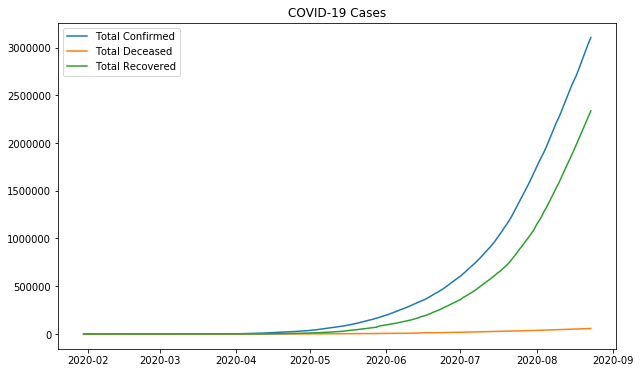

In [17]:
[b,c,d] = plt.plot(df[['Total Confirmed','Total Deceased','Total Recovered']])
plt.legend([b,c,d], ["Total Confirmed","Total Deceased","Total Recovered"], loc='upper left')
plt.title('COVID-19 Cases')
plt.show()

Text(0.5, 1.0, 'Confirmed Cases (Daily)')

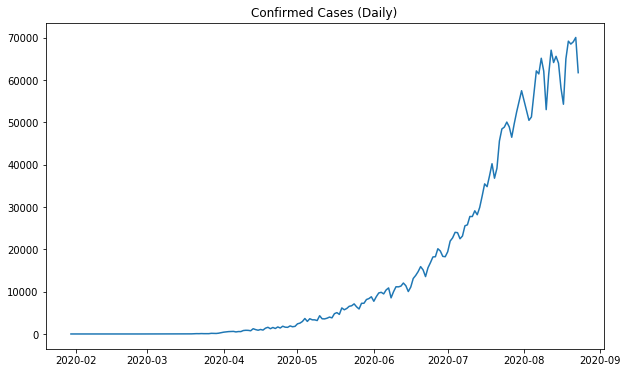

In [18]:
plt.plot(df_1['Daily Confirmed'])
plt.title('Confirmed Cases (Daily)')

Text(0.5, 1.0, 'Recovered Cases (Daily)')

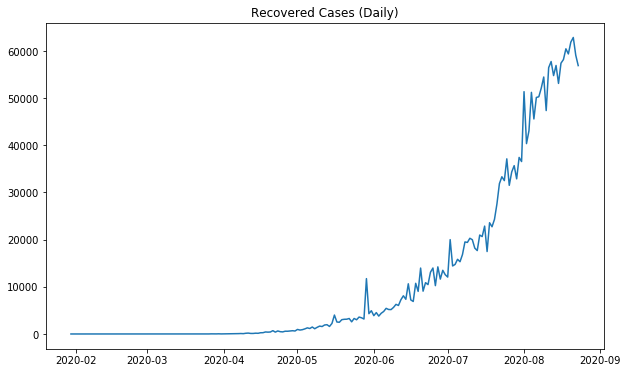

In [19]:
plt.plot(df_1['Daily Recovered'])
plt.title('Recovered Cases (Daily)')

Text(0.5, 1.0, 'Deceased Cases (Daily)')

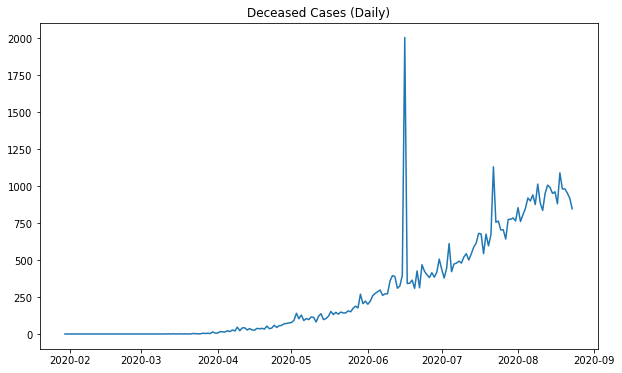

In [20]:
plt.plot(df_1['Daily Deceased'])
plt.title('Deceased Cases (Daily)')

### Daily Confirmed cases prediction

In [21]:
df_1.shape

(207, 3)

In [40]:
x = df_1['Daily Confirmed']
train = x[0:int(207*0.88)]
test = x[int(207*0.88):]

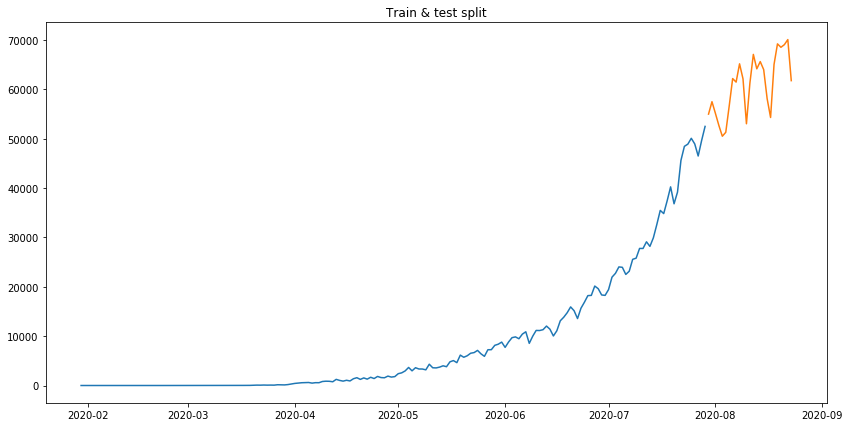

In [41]:
rcParams['figure.figsize'] = 14,7 
plt.plot(train)
plt.plot(test)
plt.title('Train & test split')
plt.show()

In [24]:
import itertools
p = d = q = range(0, 3)

pdq = list(itertools.product(p, d, q))

seasonal_pdq = [(x[0], x[1], x[2], 7) for x in list(itertools.product(p, d, q))]

In [25]:
best_aic = np.inf
best_pdq = None
best_seasonal_pdq = None
temp_model = None

In [26]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        
        try:
            temp_model = sm.tsa.statespace.SARIMAX(train,
                                             order = param,
                                             seasonal_order = param_seasonal)
            results = temp_model.fit()

            print(f'SARIMAX{param}x{param_seasonal} - AIC:{results.aic}')
            if results.aic < best_aic:
                best_aic = results.aic
                best_pdq = param
                best_seasonal_pdq = param_seasonal
        except:
            print("Unexpected error:", sys.exc_info()[0])
            continue
print(f'Best SARIMAX{best_pdq}x{best_seasonal_pdq} model - AIC:{best_aic}')

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 0, 0)x(0, 0, 0, 7) - AIC:3798.176849390506


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 0, 0)x(0, 0, 1, 7) - AIC:3626.6278505198215


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 0, 0)x(0, 0, 2, 7) - AIC:3525.6233410743985
SARIMAX(0, 0, 0)x(0, 1, 0, 7) - AIC:3152.6004660123535


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 0, 0)x(0, 1, 1, 7) - AIC:3067.480671739175


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 0, 0)x(0, 1, 2, 7) - AIC:3008.1847914563323
SARIMAX(0, 0, 0)x(0, 2, 0, 7) - AIC:2789.405774054797


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 0, 0)x(0, 2, 1, 7) - AIC:2788.0748443966368


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 0, 0)x(0, 2, 2, 7) - AIC:2756.1793747104302


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 0, 0)x(1, 0, 0, 7) - AIC:3316.5450827910263


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 0, 0)x(1, 0, 1, 7) - AIC:3244.1526504469566


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 0, 0)x(1, 0, 2, 7) - AIC:3180.1029096593466
SARIMAX(0, 0, 0)x(1, 1, 0, 7) - AIC:2908.496826411517


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 0, 0)x(1, 1, 1, 7) - AIC:2907.1823374722894


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 0, 0)x(1, 1, 2, 7) - AIC:2879.1583815700005
SARIMAX(0, 0, 0)x(1, 2, 0, 7) - AIC:2786.214663044185

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 0, 0)x(1, 2, 1, 7) - AIC:2786.463045270962


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 0, 0)x(1, 2, 2, 7) - AIC:2731.3806339805114


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



Unexpected error: <class 'numpy.linalg.LinAlgError'>


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 0, 0)x(2, 0, 1, 7) - AIC:3109.1636507916414


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



Unexpected error: <class 'numpy.linalg.LinAlgError'>


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 0, 0)x(2, 1, 0, 7) - AIC:2905.2595609511754


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 0, 0)x(2, 1, 1, 7) - AIC:2905.655849994666


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 0, 0)x(2, 1, 2, 7) - AIC:2859.5201596105526
SARIMAX(0, 0, 0)x(2, 2, 0, 7) - AIC:2784.487426359776


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 0, 0)x(2, 2, 1, 7) - AIC:2764.234672114511


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 0, 0)x(2, 2, 2, 7) - AIC:2731.036339308431
SARIMAX(0, 0, 1)x(0, 0, 0, 7) - AIC:3574.5545085363456


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 0, 1)x(0, 0, 1, 7) - AIC:3416.7536496742773


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 0, 1)x(0, 0, 2, 7) - AIC:3350.9976748095587


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 0, 1)x(0, 1, 0, 7) - AIC:3008.466211895047


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 0, 1)x(0, 1, 1, 7) - AIC:2955.733204408666


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 0, 1)x(0, 1, 2, 7) - AIC:2943.374322156561


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 0, 1)x(0, 2, 0, 7) - AIC:2748.7311493614443


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 0, 1)x(0, 2, 1, 7) - AIC:2737.716335876753


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 0, 1)x(0, 2, 2, 7) - AIC:2701.80118640564


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 0, 1)x(1, 0, 0, 7) - AIC:3196.5691522649854


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 0, 1)x(1, 0, 1, 7) - AIC:3185.8712449246104


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 0, 1)x(1, 0, 2, 7) - AIC:3148.2351858140455
SARIMAX(0, 0, 1)x(1, 1, 0, 7) - AIC:2867.0095986142974


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 0, 1)x(1, 1, 1, 7) - AIC:2856.685398630557


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 0, 1)x(1, 1, 2, 7) - AIC:2825.5196734586943


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 0, 1)x(1, 2, 0, 7) - AIC:2734.9734638354585


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 0, 1)x(1, 2, 1, 7) - AIC:2736.2722251529112


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 0, 1)x(1, 2, 2, 7) - AIC:2694.715423177627


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 0, 1)x(2, 0, 0, 7) - AIC:3053.457487186014
SARIMAX(0, 0, 1)x(2, 0, 1, 7) - AIC:3200.5561163795724


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



Unexpected error: <class 'numpy.linalg.LinAlgError'>


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 0, 1)x(2, 1, 0, 7) - AIC:2853.7525645805595


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 0, 1)x(2, 1, 1, 7) - AIC:2870.1630988364973


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 0, 1)x(2, 1, 2, 7) - AIC:3018.823404425094
SARIMAX(0, 0, 1)x(2, 2, 0, 7) - AIC:2733.693596608014


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 0, 1)x(2, 2, 1, 7) - AIC:2728.462343118751


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 0, 1)x(2, 2, 2, 7) - AIC:2708.7641812937313
SARIMAX(0, 0, 2)x(0, 0, 0, 7) - AIC:3439.167158919672


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 0, 2)x(0, 0, 1, 7) - AIC:3334.9511029432965


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 0, 2)x(0, 0, 2, 7) - AIC:3313.9326316587976


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 0, 2)x(0, 1, 0, 7) - AIC:2944.261552944924


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 0, 2)x(0, 1, 1, 7) - AIC:2907.040403073186


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 0, 2)x(0, 1, 2, 7) - AIC:2896.637450528224


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 0, 2)x(0, 2, 0, 7) - AIC:2730.248385113723


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 0, 2)x(0, 2, 1, 7) - AIC:2714.448118641025


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 0, 2)x(0, 2, 2, 7) - AIC:2680.600149208478


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 0, 2)x(1, 0, 0, 7) - AIC:3086.761035889458


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 0, 2)x(1, 0, 1, 7) - AIC:3134.066996516116


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 0, 2)x(1, 0, 2, 7) - AIC:3349.333152701482
SARIMAX(0, 0, 2)x(1, 1, 0, 7) - AIC:2853.2744940064676


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 0, 2)x(1, 1, 1, 7) - AIC:2838.0244665668306


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 0, 2)x(1, 1, 2, 7) - AIC:2814.264666491622
SARIMAX(0, 0, 2)x(1, 2, 0, 7) - AIC:2708.4728431626195


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 0, 2)x(1, 2, 1, 7) - AIC:2710.2877525505082


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 0, 2)x(1, 2, 2, 7) - AIC:2678.7581089261535


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 0, 2)x(2, 0, 0, 7) - AIC:3110.6022590114244


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 0, 2)x(2, 0, 1, 7) - AIC:3211.0428444750632


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 0, 2)x(2, 0, 2, 7) - AIC:3502.279678898546
SARIMAX(0, 0, 2)x(2, 1, 0, 7) - AIC:2836.5952067637827


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 0, 2)x(2, 1, 1, 7) - AIC:4416.231750470457


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 0, 2)x(2, 1, 2, 7) - AIC:3016.1080069199816
SARIMAX(0, 0, 2)x(2, 2, 0, 7) - AIC:2705.331935069139


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 0, 2)x(2, 2, 1, 7) - AIC:2708.1606052631596


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 0, 2)x(2, 2, 2, 7) - AIC:2697.033626226328
SARIMAX(0, 1, 0)x(0, 0, 0, 7) - AIC:2896.631173583165


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 1, 0)x(0, 0, 1, 7) - AIC:2855.212637498438


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 1, 0)x(0, 0, 2, 7) - AIC:2845.899714940366
SARIMAX(0, 1, 0)x(0, 1, 0, 7) - AIC:2703.271188677586


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 1, 0)x(0, 1, 1, 7) - AIC:2678.6241867454332


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 1, 0)x(0, 1, 2, 7) - AIC:2678.652739633959
SARIMAX(0, 1, 0)x(0, 2, 0, 7) - AIC:2718.7914196689844


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 1, 0)x(0, 2, 1, 7) - AIC:2611.771108071321


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 1, 0)x(0, 2, 2, 7) - AIC:2588.1416436782665
SARIMAX(0, 1, 0)x(1, 0, 0, 7) - AIC:2816.712183782882


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 1, 0)x(1, 0, 1, 7) - AIC:2799.453842425759


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 1, 0)x(1, 0, 2, 7) - AIC:2800.0009467003647


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 1, 0)x(1, 1, 0, 7) - AIC:2682.0812581021696


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 1, 0)x(1, 1, 1, 7) - AIC:2679.423416790116


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 1, 0)x(1, 1, 2, 7) - AIC:2677.7759440639807


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 1, 0)x(1, 2, 0, 7) - AIC:2658.6147021285933


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 1, 0)x(1, 2, 1, 7) - AIC:2590.7594162698088


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 1, 0)x(1, 2, 2, 7) - AIC:2588.837340145131


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 1, 0)x(2, 0, 0, 7) - AIC:2802.364796618549


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 1, 0)x(2, 0, 1, 7) - AIC:2800.559119161728


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 1, 0)x(2, 0, 2, 7) - AIC:2800.331708249014
SARIMAX(0, 1, 0)x(2, 1, 0, 7) - AIC:2676.2513003799277


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 1, 0)x(2, 1, 1, 7) - AIC:2677.2700488741557


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 1, 0)x(2, 1, 2, 7) - AIC:2676.6276780515705


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 1, 0)x(2, 2, 0, 7) - AIC:2597.343242904879


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 1, 0)x(2, 2, 1, 7) - AIC:2580.3063133139553


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 1, 0)x(2, 2, 2, 7) - AIC:2581.901235008258
SARIMAX(0, 1, 1)x(0, 0, 0, 7) - AIC:2895.3272631046457


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 1, 1)x(0, 0, 1, 7) - AIC:2856.6838813577906


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 1, 1)x(0, 0, 2, 7) - AIC:2842.4534828171145
SARIMAX(0, 1, 1)x(0, 1, 0, 7) - AIC:2675.668876216684


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 1, 1)x(0, 1, 1, 7) - AIC:2664.9791114727477


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 1, 1)x(0, 1, 2, 7) - AIC:2664.60838245391
SARIMAX(0, 1, 1)x(0, 2, 0, 7) - AIC:2678.7448779212928


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 1, 1)x(0, 2, 1, 7) - AIC:2582.7488992088083


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 1, 1)x(0, 2, 2, 7) - AIC:2563.7392582110247


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 1, 1)x(1, 0, 0, 7) - AIC:2797.9294391939716


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 1, 1)x(1, 0, 1, 7) - AIC:2788.4283147325923


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 1, 1)x(1, 0, 2, 7) - AIC:2788.62194528605


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 1, 1)x(1, 1, 0, 7) - AIC:2664.121691270473


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 1, 1)x(1, 1, 1, 7) - AIC:2665.7173151353295


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 1, 1)x(1, 1, 2, 7) - AIC:2664.126743644236


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 1, 1)x(1, 2, 0, 7) - AIC:2611.9668908431986


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 1, 1)x(1, 2, 1, 7) - AIC:2567.0498002438817


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 1, 1)x(1, 2, 2, 7) - AIC:2565.7535829832145
SARIMAX(0, 1, 1)x(2, 0, 0, 7) - AIC:2787.8877123613347


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 1, 1)x(2, 0, 1, 7) - AIC:2789.415945340329


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 1, 1)x(2, 0, 2, 7) - AIC:2792.4175304413848


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 1, 1)x(2, 1, 0, 7) - AIC:2665.3265975673426


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 1, 1)x(2, 1, 1, 7) - AIC:2666.691963932107


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 1, 1)x(2, 1, 2, 7) - AIC:2666.46018952885


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 1, 1)x(2, 2, 0, 7) - AIC:2576.8721876573395


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 1, 1)x(2, 2, 1, 7) - AIC:2565.2282190490178


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 1, 1)x(2, 2, 2, 7) - AIC:2567.1609610540845
SARIMAX(0, 1, 2)x(0, 0, 0, 7) - AIC:2893.8900428007073


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 1, 2)x(0, 0, 1, 7) - AIC:2856.7999198793877


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 1, 2)x(0, 0, 2, 7) - AIC:2842.327218526989
SARIMAX(0, 1, 2)x(0, 1, 0, 7) - AIC:2672.621709020026


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 1, 2)x(0, 1, 1, 7) - AIC:2661.893321472737


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 1, 2)x(0, 1, 2, 7) - AIC:2661.391419665143


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 1, 2)x(0, 2, 0, 7) - AIC:2679.4434397001787


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 1, 2)x(0, 2, 1, 7) - AIC:2579.6785476877512


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 1, 2)x(0, 2, 2, 7) - AIC:2562.1826412941364


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 1, 2)x(1, 0, 0, 7) - AIC:2793.9595925301683


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 1, 2)x(1, 0, 1, 7) - AIC:2785.490479820119


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 1, 2)x(1, 0, 2, 7) - AIC:2785.201788635056


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 1, 2)x(1, 1, 0, 7) - AIC:2660.257064323998


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 1, 2)x(1, 1, 1, 7) - AIC:2662.2010907567374


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 1, 2)x(1, 1, 2, 7) - AIC:2661.5549807424595


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 1, 2)x(1, 2, 0, 7) - AIC:2607.9073973342674


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 1, 2)x(1, 2, 1, 7) - AIC:2567.8077512755144


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 1, 2)x(1, 2, 2, 7) - AIC:2564.8826351501675
SARIMAX(0, 1, 2)x(2, 0, 0, 7) - AIC:2783.9584922815675


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 1, 2)x(2, 0, 1, 7) - AIC:2785.9223732974006


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 1, 2)x(2, 0, 2, 7) - AIC:2789.48030245677


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 1, 2)x(2, 1, 0, 7) - AIC:2662.160464175822


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 1, 2)x(2, 1, 1, 7) - AIC:2663.4938517984974


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 1, 2)x(2, 1, 2, 7) - AIC:2664.5613482204453


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 1, 2)x(2, 2, 0, 7) - AIC:2576.2223765033405


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 1, 2)x(2, 2, 1, 7) - AIC:2564.155373422552


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 1, 2)x(2, 2, 2, 7) - AIC:2566.9900020613827
SARIMAX(0, 2, 0)x(0, 0, 0, 7) - AIC:2958.6551115481607
SARIMAX(0, 2, 0)x(0, 0, 1, 7) - AIC:2942.7277076754963


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 2, 0)x(0, 0, 2, 7) - AIC:2941.5795559067465
SARIMAX(0, 2, 0)x(0, 1, 0, 7) - AIC:2845.2671623459887


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 2, 0)x(0, 1, 1, 7) - AIC:2792.1183898334584


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 2, 0)x(0, 1, 2, 7) - AIC:2791.010023113601
SARIMAX(0, 2, 0)x(0, 2, 0, 7) - AIC:2867.1899023337837


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 2, 0)x(0, 2, 1, 7) - AIC:2747.772914414883


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 2, 0)x(0, 2, 2, 7) - AIC:2698.927412308143
SARIMAX(0, 2, 0)x(1, 0, 0, 7) - AIC:2934.822849218464


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 2, 0)x(1, 0, 1, 7) - AIC:2911.8256828151157


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 2, 0)x(1, 0, 2, 7) - AIC:2911.450808553177


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 2, 0)x(1, 1, 0, 7) - AIC:2812.7615123922333


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 2, 0)x(1, 1, 1, 7) - AIC:2792.0624995740177


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 2, 0)x(1, 1, 2, 7) - AIC:2796.1190434173404


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 2, 0)x(1, 2, 0, 7) - AIC:2812.5704405503243


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 2, 0)x(1, 2, 1, 7) - AIC:2717.8595273278497


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 2, 0)x(1, 2, 2, 7) - AIC:2694.1280829611906


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 2, 0)x(2, 0, 0, 7) - AIC:2924.600526958554


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 2, 0)x(2, 0, 1, 7) - AIC:2912.3146089008133


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 2, 0)x(2, 0, 2, 7) - AIC:2911.287422801464


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 2, 0)x(2, 1, 0, 7) - AIC:2781.9083711982043


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 2, 0)x(2, 1, 1, 7) - AIC:2783.7235348181684


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 2, 0)x(2, 1, 2, 7) - AIC:2785.5812396361025


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 2, 0)x(2, 2, 0, 7) - AIC:2720.1495335508325


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 2, 0)x(2, 2, 1, 7) - AIC:2686.9169945441095


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 2, 0)x(2, 2, 2, 7) - AIC:2688.5200691811287
SARIMAX(0, 2, 1)x(0, 0, 0, 7) - AIC:2856.9320328058875


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 2, 1)x(0, 0, 1, 7) - AIC:2825.6144879474446


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 2, 1)x(0, 0, 2, 7) - AIC:2817.6616740658087
SARIMAX(0, 2, 1)x(0, 1, 0, 7) - AIC:2692.569893022014


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 2, 1)x(0, 1, 1, 7) - AIC:2662.925650736015


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 2, 1)x(0, 1, 2, 7) - AIC:2663.129768699316
SARIMAX(0, 2, 1)x(0, 2, 0, 7) - AIC:2708.6347075371814

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 2, 1)x(0, 2, 1, 7) - AIC:2603.492636131521


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 2, 1)x(0, 2, 2, 7) - AIC:2571.3998318722106


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 2, 1)x(1, 0, 0, 7) - AIC:2801.6691170401455


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 2, 1)x(1, 0, 1, 7) - AIC:2784.382257836774


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 2, 1)x(1, 0, 2, 7) - AIC:2784.734617555494


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 2, 1)x(1, 1, 0, 7) - AIC:2669.133312075302
SARIMAX(0, 2, 1)x(1, 1, 1, 7) - AIC:2663.677787708397


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 2, 1)x(1, 1, 2, 7) - AIC:2664.2003141724326
SARIMAX(0, 2, 1)x(1, 2, 0, 7) - AIC:2649.7336818506365


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 2, 1)x(1, 2, 1, 7) - AIC:2581.527439167452


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 2, 1)x(1, 2, 2, 7) - AIC:2573.392757484825


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 2, 1)x(2, 0, 0, 7) - AIC:2787.162268556339


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 2, 1)x(2, 0, 1, 7) - AIC:2779.346560211333


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



Unexpected error: <class 'numpy.linalg.LinAlgError'>


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 2, 1)x(2, 1, 0, 7) - AIC:2659.898389695838


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 2, 1)x(2, 1, 1, 7) - AIC:2661.314995807873


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 2, 1)x(2, 1, 2, 7) - AIC:2662.2479824018915


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 2, 1)x(2, 2, 0, 7) - AIC:2588.828491302397


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 2, 1)x(2, 2, 1, 7) - AIC:2570.8336742531756


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 2, 1)x(2, 2, 2, 7) - AIC:2585.19982565918
SARIMAX(0, 2, 2)x(0, 0, 0, 7) - AIC:2845.148634796784


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 2, 2)x(0, 0, 1, 7) - AIC:2807.1221224769624


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 2, 2)x(0, 0, 2, 7) - AIC:2786.887755900264


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 2, 2)x(0, 1, 0, 7) - AIC:2655.527785188891


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 2, 2)x(0, 1, 1, 7) - AIC:2631.384656882287


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 2, 2)x(0, 1, 2, 7) - AIC:2632.3761020695247


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 2, 2)x(0, 2, 0, 7) - AIC:2669.5391070735623


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 2, 2)x(0, 2, 1, 7) - AIC:2569.9372529058337


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 2, 2)x(0, 2, 2, 7) - AIC:2538.7407138229783


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 2, 2)x(1, 0, 0, 7) - AIC:2764.2113948683073


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 2, 2)x(1, 0, 1, 7) - AIC:2748.0886931802747


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 2, 2)x(1, 0, 2, 7) - AIC:2749.1208138086126
SARIMAX(0, 2, 2)x(1, 1, 0, 7) - AIC:2633.9663036757956


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 2, 2)x(1, 1, 1, 7) - AIC:2632.456856071346


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 2, 2)x(1, 1, 2, 7) - AIC:2634.2612411432665


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 2, 2)x(1, 2, 0, 7) - AIC:2603.5195766986226


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 2, 2)x(1, 2, 1, 7) - AIC:2545.763931052671


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 2, 2)x(1, 2, 2, 7) - AIC:2540.455954697927


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 2, 2)x(2, 0, 0, 7) - AIC:2749.313111988522


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 2, 2)x(2, 0, 1, 7) - AIC:2749.21346194098


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 2, 2)x(2, 0, 2, 7) - AIC:2753.2966856480334
SARIMAX(0, 2, 2)x(2, 1, 0, 7) - AIC:2632.457733571393


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 2, 2)x(2, 1, 1, 7) - AIC:2634.3554487225892


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 2, 2)x(2, 1, 2, 7) - AIC:2636.417853969366


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 2, 2)x(2, 2, 0, 7) - AIC:2568.052026837061


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 2, 2)x(2, 2, 1, 7) - AIC:2543.0619373645204


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 2, 2)x(2, 2, 2, 7) - AIC:2549.199335794332
SARIMAX(1, 0, 0)x(0, 0, 0, 7) - AIC:2922.15132639079


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 0, 0)x(0, 0, 1, 7) - AIC:2881.055666671311


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 0, 0)x(0, 0, 2, 7) - AIC:2871.8335250727378
SARIMAX(1, 0, 0)x(0, 1, 0, 7) - AIC:2721.1132732985343


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 0, 0)x(0, 1, 1, 7) - AIC:2696.498204257792


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 0, 0)x(0, 1, 2, 7) - AIC:2696.5657113330903
SARIMAX(1, 0, 0)x(0, 2, 0, 7) - AIC:2712.2877111345247


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 0, 0)x(0, 2, 1, 7) - AIC:2629.540035576737


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 0, 0)x(0, 2, 2, 7) - AIC:2599.5524887169763


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 0, 0)x(1, 0, 0, 7) - AIC:2843.8185101888835


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 0, 0)x(1, 0, 1, 7) - AIC:2828.2813524915564


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 0, 0)x(1, 0, 2, 7) - AIC:2829.2252811114613
SARIMAX(1, 0, 0)x(1, 1, 0, 7) - AIC:2699.9526746355336


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 0, 0)x(1, 1, 1, 7) - AIC:2697.324596673424


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 0, 0)x(1, 1, 2, 7) - AIC:2695.714419234622


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 0, 0)x(1, 2, 0, 7) - AIC:2665.7290620608987


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 0, 0)x(1, 2, 1, 7) - AIC:2609.6883699694563


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 0, 0)x(1, 2, 2, 7) - AIC:2601.3591401553604


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 0, 0)x(2, 0, 0, 7) - AIC:2830.642803993425


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 0, 0)x(2, 0, 1, 7) - AIC:2830.9252640092554
SARIMAX(1, 0, 0)x(2, 0, 2, 7) - AIC:2835.9163968234307


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 0, 0)x(2, 1, 0, 7) - AIC:2694.177820029209


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 0, 0)x(2, 1, 1, 7) - AIC:2704.7483114408715


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 0, 0)x(2, 1, 2, 7) - AIC:2697.901363834711
SARIMAX(1, 0, 0)x(2, 2, 0, 7) - AIC:2622.096965717338


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 0, 0)x(2, 2, 1, 7) - AIC:2599.439208980376


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 0, 0)x(2, 2, 2, 7) - AIC:2601.039305643605


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 0, 1)x(0, 0, 0, 7) - AIC:2920.8719406241667


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 0, 1)x(0, 0, 1, 7) - AIC:2882.532476447997


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 0, 1)x(0, 0, 2, 7) - AIC:2868.462739402644


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 0, 1)x(0, 1, 0, 7) - AIC:2692.9753189054277


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 0, 1)x(0, 1, 1, 7) - AIC:2682.4575505978


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 0, 1)x(0, 1, 2, 7) - AIC:2682.096978387806


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 0, 1)x(0, 2, 0, 7) - AIC:2694.0516241544083


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 0, 1)x(0, 2, 1, 7) - AIC:2600.1021235468834


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 0, 1)x(0, 2, 2, 7) - AIC:2582.0452364310977


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 0, 1)x(1, 0, 0, 7) - AIC:2826.44145334134


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 0, 1)x(1, 0, 1, 7) - AIC:2822.1959757263658


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 0, 1)x(1, 0, 2, 7) - AIC:2822.6775292632883
SARIMAX(1, 0, 1)x(1, 1, 0, 7) - AIC:2681.583760603966


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 0, 1)x(1, 1, 1, 7) - AIC:2683.199966420817


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 0, 1)x(1, 1, 2, 7) - AIC:2681.646209174715
SARIMAX(1, 0, 1)x(1, 2, 0, 7) - AIC:2629.579165910719


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 0, 1)x(1, 2, 1, 7) - AIC:2585.1887973079447


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 0, 1)x(1, 2, 2, 7) - AIC:2584.03068760007


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



Unexpected error: <class 'numpy.linalg.LinAlgError'>


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 0, 1)x(2, 0, 1, 7) - AIC:2820.8683218724627


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 0, 1)x(2, 0, 2, 7) - AIC:2822.120947671079
SARIMAX(1, 0, 1)x(2, 1, 0, 7) - AIC:2682.8304475066307


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 0, 1)x(2, 1, 1, 7) - AIC:2685.4209860671945


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 0, 1)x(2, 1, 2, 7) - AIC:2683.6112121868655
SARIMAX(1, 0, 1)x(2, 2, 0, 7) - AIC:2594.909794684131


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 0, 1)x(2, 2, 1, 7) - AIC:2583.5170502525943


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX(1, 0, 1)x(2, 2, 2, 7) - AIC:2592.1576156812534


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 0, 2)x(0, 0, 0, 7) - AIC:2919.179143489997
SARIMAX(1, 0, 2)x(0, 0, 1, 7) - AIC:2882.6302398697035


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 0, 2)x(0, 0, 2, 7) - AIC:2868.4683470229693
SARIMAX(1, 0, 2)x(0, 1, 0, 7) - AIC:2689.322343888426


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 0, 2)x(0, 1, 1, 7) - AIC:2679.374109846659
SARIMAX(1, 0, 2)x(0, 1, 2, 7) - AIC:2678.889627040724


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 0, 2)x(0, 2, 0, 7) - AIC:2692.9115350014285


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 0, 2)x(0, 2, 1, 7) - AIC:2597.393079102395


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 0, 2)x(0, 2, 2, 7) - AIC:2580.573729139697


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 0, 2)x(1, 0, 0, 7) - AIC:2822.7434457323716


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 0, 2)x(1, 0, 1, 7) - AIC:2815.531316197277


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 0, 2)x(1, 0, 2, 7) - AIC:2815.9877152597082
SARIMAX(1, 0, 2)x(1, 1, 0, 7) - AIC:2677.746733977559


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 0, 2)x(1, 1, 1, 7) - AIC:2679.6962451629106


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 0, 2)x(1, 1, 2, 7) - AIC:2679.2447649895366
SARIMAX(1, 0, 2)x(1, 2, 0, 7) - AIC:2625.6639155328558


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 0, 2)x(1, 2, 1, 7) - AIC:2582.4988302983593


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 0, 2)x(1, 2, 2, 7) - AIC:2582.5493123636757


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 0, 2)x(2, 0, 0, 7) - AIC:2813.9997468785714


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 0, 2)x(2, 0, 1, 7) - AIC:2816.0258366928538


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 0, 2)x(2, 0, 2, 7) - AIC:2819.866154628356


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 0, 2)x(2, 1, 0, 7) - AIC:2679.841871835638
SARIMAX(1, 0, 2)x(2, 1, 1, 7) - AIC:2681.80816884071


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 0, 2)x(2, 1, 2, 7) - AIC:2681.446561191159
SARIMAX(1, 0, 2)x(2, 2, 0, 7) - AIC:2594.322458998638


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 0, 2)x(2, 2, 1, 7) - AIC:2582.5040609216358


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 0, 2)x(2, 2, 2, 7) - AIC:2616.2898389194734
SARIMAX(1, 1, 0)x(0, 0, 0, 7) - AIC:2896.520900720673


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 1, 0)x(0, 0, 1, 7) - AIC:2856.837831407361


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 1, 0)x(0, 0, 2, 7) - AIC:2842.942748209855
SARIMAX(1, 1, 0)x(0, 1, 0, 7) - AIC:2678.845647262642


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 1, 0)x(0, 1, 1, 7) - AIC:2666.45344404582


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 1, 0)x(0, 1, 2, 7) - AIC:2665.9764831320394
SARIMAX(1, 1, 0)x(0, 2, 0, 7) - AIC:2685.4918214068884


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 1, 0)x(0, 2, 1, 7) - AIC:2586.133891059587


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 1, 0)x(0, 2, 2, 7) - AIC:2566.271231128563


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 1, 0)x(1, 0, 0, 7) - AIC:2800.1322434466265


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 1, 0)x(1, 0, 1, 7) - AIC:2789.616046914216


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 1, 0)x(1, 0, 2, 7) - AIC:2789.6667896371155


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 1, 0)x(1, 1, 0, 7) - AIC:2665.3131358441615


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 1, 0)x(1, 1, 1, 7) - AIC:2666.9305854620734


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 1, 0)x(1, 1, 2, 7) - AIC:2665.7971293277733


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 1, 0)x(1, 2, 0, 7) - AIC:2614.6578828554575


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 1, 0)x(1, 2, 1, 7) - AIC:2569.3738163914563


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 1, 0)x(1, 2, 2, 7) - AIC:2568.2712150113393
SARIMAX(1, 1, 0)x(2, 0, 0, 7) - AIC:2788.8047425545205


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 1, 0)x(2, 0, 1, 7) - AIC:2804.0880630292922


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 1, 0)x(2, 0, 2, 7) - AIC:2793.594032134489


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 1, 0)x(2, 1, 0, 7) - AIC:2666.609205519695


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 1, 0)x(2, 1, 1, 7) - AIC:2667.997373737882


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 1, 0)x(2, 1, 2, 7) - AIC:2667.9688596073693


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 1, 0)x(2, 2, 0, 7) - AIC:2580.247431874635


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 1, 0)x(2, 2, 1, 7) - AIC:2567.990076692848


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 1, 0)x(2, 2, 2, 7) - AIC:2569.824874824385


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 1, 1)x(0, 0, 0, 7) - AIC:2893.8151535684465


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 1, 1)x(0, 0, 1, 7) - AIC:2858.550566015425


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 1, 1)x(0, 0, 2, 7) - AIC:2844.2552054322637


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 1, 1)x(0, 1, 0, 7) - AIC:2675.7319721443046


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 1, 1)x(0, 1, 1, 7) - AIC:2665.882388019413


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 1, 1)x(0, 1, 2, 7) - AIC:2665.3883130809168
SARIMAX(1, 1, 1)x(0, 2, 0, 7) - AIC:2679.8243681520785


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 1, 1)x(0, 2, 1, 7) - AIC:2582.8509950790085


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 1, 1)x(0, 2, 2, 7) - AIC:2564.685204800813


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 1, 1)x(1, 0, 0, 7) - AIC:2798.3825588674054


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 1, 1)x(1, 0, 1, 7) - AIC:2798.117982840271
SARIMAX(1, 1, 1)x(1, 0, 2, 7) - AIC:2789.605309036725


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 1, 1)x(1, 1, 0, 7) - AIC:2664.643073937052


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 1, 1)x(1, 1, 1, 7) - AIC:2666.4673761779636


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 1, 1)x(1, 1, 2, 7) - AIC:2665.080873507254


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 1, 1)x(1, 2, 0, 7) - AIC:2609.685373268366


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 1, 1)x(1, 2, 1, 7) - AIC:2567.230685322732


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 1, 1)x(1, 2, 2, 7) - AIC:2569.6176611227916


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 1, 1)x(2, 0, 0, 7) - AIC:2788.6434245161254


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 1, 1)x(2, 0, 1, 7) - AIC:2790.408015130056


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 1, 1)x(2, 0, 2, 7) - AIC:2796.5084291391595
SARIMAX(1, 1, 1)x(2, 1, 0, 7) - AIC:2666.300018797161


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 1, 1)x(2, 1, 1, 7) - AIC:2667.7888710220122


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 1, 1)x(2, 1, 2, 7) - AIC:2667.87001865998


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 1, 1)x(2, 2, 0, 7) - AIC:2577.943565332919


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 1, 1)x(2, 2, 1, 7) - AIC:2566.416770216295


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 1, 1)x(2, 2, 2, 7) - AIC:2568.3548282946995


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 1, 2)x(0, 0, 0, 7) - AIC:2894.816943047743


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 1, 2)x(0, 0, 1, 7) - AIC:2856.6690708111537


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 1, 2)x(0, 0, 2, 7) - AIC:2806.292300827219


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 1, 2)x(0, 1, 0, 7) - AIC:2669.8711331157074


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 1, 2)x(0, 1, 1, 7) - AIC:2648.081723771117


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 1, 2)x(0, 1, 2, 7) - AIC:2649.0976969639983


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 1, 2)x(0, 2, 0, 7) - AIC:2681.568289815634


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 1, 2)x(0, 2, 1, 7) - AIC:2586.7473494403393


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 1, 2)x(0, 2, 2, 7) - AIC:2566.703775581578


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 1, 2)x(1, 0, 0, 7) - AIC:2784.270512231438


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 1, 2)x(1, 0, 1, 7) - AIC:2768.429023056004


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 1, 2)x(1, 0, 2, 7) - AIC:2769.4578492554747
SARIMAX(1, 1, 2)x(1, 1, 0, 7) - AIC:2650.6290161330544


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 1, 2)x(1, 1, 1, 7) - AIC:2649.174850319979


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX(1, 1, 2)x(1, 1, 2, 7) - AIC:2649.4572789899257


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 1, 2)x(1, 2, 0, 7) - AIC:2615.9663813878874
SARIMAX(1, 1, 2)x(1, 2, 1, 7) - AIC:2571.048665712755


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 1, 2)x(1, 2, 2, 7) - AIC:2569.7319308685737


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 1, 2)x(2, 0, 0, 7) - AIC:2769.5819902930007


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 1, 2)x(2, 0, 1, 7) - AIC:2779.5376904054274


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 1, 2)x(2, 0, 2, 7) - AIC:2794.035107010693
SARIMAX(1, 1, 2)x(2, 1, 0, 7) - AIC:2649.1694885854095


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 1, 2)x(2, 1, 1, 7) - AIC:2651.168280274551


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 1, 2)x(2, 1, 2, 7) - AIC:2670.2878995302594
SARIMAX(1, 1, 2)x(2, 2, 0, 7) - AIC:2577.50314993561


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 1, 2)x(2, 2, 1, 7) - AIC:2557.5715758850974


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX(1, 1, 2)x(2, 2, 2, 7) - AIC:2574.5960737076634
SARIMAX(1, 2, 0)x(0, 0, 0, 7) - AIC:2936.393673138898


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 2, 0)x(0, 0, 1, 7) - AIC:2908.4885124169386


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 2, 0)x(0, 0, 2, 7) - AIC:2896.3258785003472
SARIMAX(1, 2, 0)x(0, 1, 0, 7) - AIC:2766.7384119329736


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 2, 0)x(0, 1, 1, 7) - AIC:2734.8104926654337


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 2, 0)x(0, 1, 2, 7) - AIC:2732.8430260605974
SARIMAX(1, 2, 0)x(0, 2, 0, 7) - AIC:2779.657652921108


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 2, 0)x(0, 2, 1, 7) - AIC:2671.4307999271414


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 2, 0)x(0, 2, 2, 7) - AIC:2634.8207347311154


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 2, 0)x(1, 0, 0, 7) - AIC:2878.921452131404


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 2, 0)x(1, 0, 1, 7) - AIC:2856.268425567712


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 2, 0)x(1, 0, 2, 7) - AIC:2854.708451825567


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 2, 0)x(1, 1, 0, 7) - AIC:2738.1783610398265


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 2, 0)x(1, 1, 1, 7) - AIC:2733.758310246489


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 2, 0)x(1, 1, 2, 7) - AIC:2733.963418001455


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 2, 0)x(1, 2, 0, 7) - AIC:2710.9312461026666


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 2, 0)x(1, 2, 1, 7) - AIC:2644.5413263567652


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 2, 0)x(1, 2, 2, 7) - AIC:2640.344638368636


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 2, 0)x(2, 0, 0, 7) - AIC:2858.961822768162


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 2, 0)x(2, 0, 1, 7) - AIC:2855.6486533687394


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 2, 0)x(2, 0, 2, 7) - AIC:2856.9503172674695
SARIMAX(1, 2, 0)x(2, 1, 0, 7) - AIC:2729.95630091408


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 2, 0)x(2, 1, 1, 7) - AIC:2731.0757070701857


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 2, 0)x(2, 1, 2, 7) - AIC:2731.239361078051


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 2, 0)x(2, 2, 0, 7) - AIC:2655.846498961805


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 2, 0)x(2, 2, 1, 7) - AIC:2633.548936656385


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX(1, 2, 0)x(2, 2, 2, 7) - AIC:2637.711436681555


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 2, 1)x(0, 0, 0, 7) - AIC:2857.5075174168605


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 2, 1)x(0, 0, 1, 7) - AIC:2821.3832824525352


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 2, 1)x(0, 0, 2, 7) - AIC:2806.178381910475


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 2, 1)x(0, 1, 0, 7) - AIC:2664.970709767706


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 2, 1)x(0, 1, 1, 7) - AIC:2644.9207494421953


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 2, 1)x(0, 1, 2, 7) - AIC:2645.3750801387987


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 2, 1)x(0, 2, 0, 7) - AIC:2675.9124779843783
SARIMAX(1, 2, 1)x(0, 2, 1, 7) - AIC:2575.7877157705575


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 2, 1)x(0, 2, 2, 7) - AIC:2550.8552730646797


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 2, 1)x(1, 0, 0, 7) - AIC:2777.09435055586


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 2, 1)x(1, 0, 1, 7) - AIC:2773.638089908434


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 2, 1)x(1, 0, 2, 7) - AIC:2762.4959369359913


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 2, 1)x(1, 1, 0, 7) - AIC:2645.7081789625217


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 2, 1)x(1, 1, 1, 7) - AIC:2645.6080117373394


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 2, 1)x(1, 1, 2, 7) - AIC:2647.3697768076026
SARIMAX(1, 2, 1)x(1, 2, 0, 7) - AIC:2606.2067510322977


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 2, 1)x(1, 2, 1, 7) - AIC:2556.317467682629


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 2, 1)x(1, 2, 2, 7) - AIC:2552.6522568281543


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 2, 1)x(2, 0, 0, 7) - AIC:2762.2866632769337


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 2, 1)x(2, 0, 1, 7) - AIC:2762.7282616065822


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 2, 1)x(2, 0, 2, 7) - AIC:2798.8624977102913


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 2, 1)x(2, 1, 0, 7) - AIC:2644.8894746537267


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 2, 1)x(2, 1, 1, 7) - AIC:2646.5404048327537


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 2, 1)x(2, 1, 2, 7) - AIC:2648.3846203067706


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 2, 1)x(2, 2, 0, 7) - AIC:2570.966920656878


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX(1, 2, 1)x(2, 2, 1, 7) - AIC:2553.7019565926266


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 2, 1)x(2, 2, 2, 7) - AIC:2562.633168786786


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 2, 2)x(0, 0, 0, 7) - AIC:2855.7664742804345


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 2, 2)x(0, 0, 1, 7) - AIC:2807.087009541103
SARIMAX(1, 2, 2)x(0, 0, 2, 7) - AIC:2821.6320107709116


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 2, 2)x(0, 1, 0, 7) - AIC:2656.5675383547295


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 2, 2)x(0, 1, 1, 7) - AIC:2633.291255976415


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 2, 2)x(0, 1, 2, 7) - AIC:2634.2057925913286


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 2, 2)x(0, 2, 0, 7) - AIC:2670.534009016653


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX(1, 2, 2)x(0, 2, 1, 7) - AIC:2567.613030409134


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 2, 2)x(0, 2, 2, 7) - AIC:2540.4911428041764


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 2, 2)x(1, 0, 0, 7) - AIC:2766.381043537158


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 2, 2)x(1, 0, 1, 7) - AIC:2773.065136759871


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 2, 2)x(1, 0, 2, 7) - AIC:2752.1489264104075
SARIMAX(1, 2, 2)x(1, 1, 0, 7) - AIC:2635.861850974163


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 2, 2)x(1, 1, 1, 7) - AIC:2634.3030573745573


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 2, 2)x(1, 1, 2, 7) - AIC:2644.086178050855
SARIMAX(1, 2, 2)x(1, 2, 0, 7) - AIC:2601.260474912327


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 2, 2)x(1, 2, 1, 7) - AIC:2555.1366672260638


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX(1, 2, 2)x(1, 2, 2, 7) - AIC:2543.9482770578134


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 2, 2)x(2, 0, 0, 7) - AIC:2751.8695734697176


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 2, 2)x(2, 0, 1, 7) - AIC:2772.5247854333466
SARIMAX(1, 2, 2)x(2, 0, 2, 7) - AIC:2787.3202872011752


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 2, 2)x(2, 1, 0, 7) - AIC:2634.337037558117


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 2, 2)x(2, 1, 1, 7) - AIC:2636.823251044482


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 2, 2)x(2, 1, 2, 7) - AIC:2638.3073634279885
SARIMAX(1, 2, 2)x(2, 2, 0, 7) - AIC:2569.168492268429


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 2, 2)x(2, 2, 1, 7) - AIC:2554.7257551020125


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX(1, 2, 2)x(2, 2, 2, 7) - AIC:2549.5231770830505


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 0, 0)x(0, 0, 0, 7) - AIC:2922.066844776051


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 0, 0)x(0, 0, 1, 7) - AIC:2882.7001684092643


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 0, 0)x(0, 0, 2, 7) - AIC:2868.9587948060025


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 0, 0)x(0, 1, 0, 7) - AIC:2696.338337569418


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 0, 0)x(0, 1, 1, 7) - AIC:2684.0094962089843


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 0, 0)x(0, 1, 2, 7) - AIC:2683.5519833214066


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 0, 0)x(0, 2, 0, 7) - AIC:2695.334599532505


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 0, 0)x(0, 2, 1, 7) - AIC:2604.3830516125595


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 0, 0)x(0, 2, 2, 7) - AIC:2584.8043789491035


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 0, 0)x(1, 0, 0, 7) - AIC:2828.4656978105204


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 0, 0)x(1, 0, 1, 7) - AIC:2819.1311841544293


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 0, 0)x(1, 0, 2, 7) - AIC:2819.003978688729
SARIMAX(2, 0, 0)x(1, 1, 0, 7) - AIC:2682.87023843216


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 0, 0)x(1, 1, 1, 7) - AIC:2684.5012989004445


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 0, 0)x(1, 1, 2, 7) - AIC:2683.481140909509


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 0, 0)x(1, 2, 0, 7) - AIC:2632.546224414434


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 0, 0)x(1, 2, 1, 7) - AIC:2587.7334902252414


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 0, 0)x(1, 2, 2, 7) - AIC:2586.7998539801065


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 0, 0)x(2, 0, 0, 7) - AIC:2818.200196847716


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 0, 0)x(2, 0, 1, 7) - AIC:2823.6564889840174


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 0, 0)x(2, 0, 2, 7) - AIC:2821.7874244875306
SARIMAX(2, 0, 0)x(2, 1, 0, 7) - AIC:2684.194357533122


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 0, 0)x(2, 1, 1, 7) - AIC:2686.61767077443


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 0, 0)x(2, 1, 2, 7) - AIC:2685.4162971749874


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 0, 0)x(2, 2, 0, 7) - AIC:2598.4969529139553


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 0, 0)x(2, 2, 1, 7) - AIC:2586.4862342452516


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 0, 0)x(2, 2, 2, 7) - AIC:2619.349667833882


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 0, 1)x(0, 0, 0, 7) - AIC:2919.3811331601974


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 0, 1)x(0, 0, 1, 7) - AIC:2882.9009286388346


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 0, 1)x(0, 0, 2, 7) - AIC:2874.303125278585


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 0, 1)x(0, 1, 0, 7) - AIC:2693.0879410915923


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 0, 1)x(0, 1, 1, 7) - AIC:2683.3455095211793


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 0, 1)x(0, 1, 2, 7) - AIC:2682.8688140572144


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 0, 1)x(0, 2, 0, 7) - AIC:2694.199045712908


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 0, 1)x(0, 2, 1, 7) - AIC:2600.2036642095863


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 0, 1)x(0, 2, 2, 7) - AIC:2582.990277795154


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 0, 1)x(1, 0, 0, 7) - AIC:2827.050538838026


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 0, 1)x(1, 0, 1, 7) - AIC:2824.2338766322655


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 0, 1)x(1, 0, 2, 7) - AIC:2824.8217926180046
SARIMAX(2, 0, 1)x(1, 1, 0, 7) - AIC:2682.1073221539737


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 0, 1)x(1, 1, 1, 7) - AIC:2683.942288948506


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 0, 1)x(1, 1, 2, 7) - AIC:2682.7303604980702
SARIMAX(2, 0, 1)x(1, 2, 0, 7) - AIC:2627.3672093117175


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 0, 1)x(1, 2, 1, 7) - AIC:2585.38186280993


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 0, 1)x(1, 2, 2, 7) - AIC:2584.957636089355


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 0, 1)x(2, 0, 0, 7) - AIC:2820.5445699879847


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 0, 1)x(2, 0, 1, 7) - AIC:2825.210718215135


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 0, 1)x(2, 0, 2, 7) - AIC:2826.966316547867
SARIMAX(2, 0, 1)x(2, 1, 0, 7) - AIC:2683.780221329662


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 0, 1)x(2, 1, 1, 7) - AIC:2685.8104034435087


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX(2, 0, 1)x(2, 1, 2, 7) - AIC:2686.702952908963


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 0, 1)x(2, 2, 0, 7) - AIC:2595.9736800383525


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 0, 1)x(2, 2, 1, 7) - AIC:2584.6935761731247


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 0, 1)x(2, 2, 2, 7) - AIC:2608.5969487713683


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 0, 2)x(0, 0, 0, 7) - AIC:2927.472664473117


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 0, 2)x(0, 0, 1, 7) - AIC:2883.7334682054634


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 0, 2)x(0, 0, 2, 7) - AIC:2871.7852093127567
SARIMAX(2, 0, 2)x(0, 1, 0, 7) - AIC:2695.9819914880572


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 0, 2)x(0, 1, 1, 7) - AIC:2685.782354991642


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 0, 2)x(0, 1, 2, 7) - AIC:2685.499133808652


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 0, 2)x(0, 2, 0, 7) - AIC:2665.794581849445


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 0, 2)x(0, 2, 1, 7) - AIC:2597.685593438752


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX(2, 0, 2)x(0, 2, 2, 7) - AIC:2572.621997751666


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 0, 2)x(1, 0, 0, 7) - AIC:2829.6881317064626


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 0, 2)x(1, 0, 1, 7) - AIC:2824.5037700060375


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 0, 2)x(1, 0, 2, 7) - AIC:2823.931575345615
SARIMAX(2, 0, 2)x(1, 1, 0, 7) - AIC:2685.059709561935


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 0, 2)x(1, 1, 1, 7) - AIC:2686.687113984829


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 0, 2)x(1, 1, 2, 7) - AIC:2684.723061166531


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 0, 2)x(1, 2, 0, 7) - AIC:2629.5842741937568


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 0, 2)x(1, 2, 1, 7) - AIC:2578.4127420748855


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX(2, 0, 2)x(1, 2, 2, 7) - AIC:2585.834854755455


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 0, 2)x(2, 0, 0, 7) - AIC:2818.795526275394


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 0, 2)x(2, 0, 1, 7) - AIC:2826.364806506385


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 0, 2)x(2, 0, 2, 7) - AIC:2826.921498247907


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 0, 2)x(2, 1, 0, 7) - AIC:2686.0200851160207


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 0, 2)x(2, 1, 1, 7) - AIC:2687.24951482819


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 0, 2)x(2, 1, 2, 7) - AIC:2687.15794545358


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX(2, 0, 2)x(2, 2, 0, 7) - AIC:2598.0781224044235


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX(2, 0, 2)x(2, 2, 1, 7) - AIC:2576.309533184193


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX(2, 0, 2)x(2, 2, 2, 7) - AIC:2594.781924956904
SARIMAX(2, 1, 0)x(0, 0, 0, 7) - AIC:2895.7609758736808


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 1, 0)x(0, 0, 1, 7) - AIC:2854.8789886673126


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 1, 0)x(0, 0, 2, 7) - AIC:2842.3037277385592
SARIMAX(2, 1, 0)x(0, 1, 0, 7) - AIC:2670.879214459574


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 1, 0)x(0, 1, 1, 7) - AIC:2661.4831698924354


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 1, 0)x(0, 1, 2, 7) - AIC:2661.331725640921
SARIMAX(2, 1, 0)x(0, 2, 0, 7) - AIC:2679.0318651192647


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 1, 0)x(0, 2, 1, 7) - AIC:2578.276837173644


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 1, 0)x(0, 2, 2, 7) - AIC:2560.033210687342


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 1, 0)x(1, 0, 0, 7) - AIC:2793.468006927049


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 1, 0)x(1, 0, 1, 7) - AIC:2785.3965860286553


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 1, 0)x(1, 0, 2, 7) - AIC:2785.707969135764


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 1, 0)x(1, 1, 0, 7) - AIC:2660.6358536731705


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 1, 0)x(1, 1, 1, 7) - AIC:2662.4130611627147


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 1, 0)x(1, 1, 2, 7) - AIC:2660.504832635264


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 1, 0)x(1, 2, 0, 7) - AIC:2608.525239754719


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 1, 0)x(1, 2, 1, 7) - AIC:2567.513475364989


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 1, 0)x(1, 2, 2, 7) - AIC:2564.650883992308
SARIMAX(2, 1, 0)x(2, 0, 0, 7) - AIC:2784.7986785618587


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 1, 0)x(2, 0, 1, 7) - AIC:2786.535687267597


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 1, 0)x(2, 0, 2, 7) - AIC:2789.3519705619156
SARIMAX(2, 1, 0)x(2, 1, 0, 7) - AIC:2662.1567063629473


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 1, 0)x(2, 1, 1, 7) - AIC:2663.4504937758147


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 1, 0)x(2, 1, 2, 7) - AIC:2663.5776225101163


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 1, 0)x(2, 2, 0, 7) - AIC:2573.529210278577


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 1, 0)x(2, 2, 1, 7) - AIC:2561.5090390331316


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 1, 0)x(2, 2, 2, 7) - AIC:2563.426123259903
SARIMAX(2, 1, 1)x(0, 0, 0, 7) - AIC:2893.6748514273313


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 1, 1)x(0, 0, 1, 7) - AIC:2852.3632382253872


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 1, 1)x(0, 0, 2, 7) - AIC:2842.8360969546293


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 1, 1)x(0, 1, 0, 7) - AIC:2672.3262044065837


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 1, 1)x(0, 1, 1, 7) - AIC:2661.96126851197


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 1, 1)x(0, 1, 2, 7) - AIC:2661.9857445891344


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 1, 1)x(0, 2, 0, 7) - AIC:2680.905602200154


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX(2, 1, 1)x(0, 2, 1, 7) - AIC:2588.362237531999


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 1, 1)x(0, 2, 2, 7) - AIC:2567.92535579087


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 1, 1)x(1, 0, 0, 7) - AIC:2794.3996789055727


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 1, 1)x(1, 0, 1, 7) - AIC:2785.524855159335


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 1, 1)x(1, 0, 2, 7) - AIC:2792.206746896378
SARIMAX(2, 1, 1)x(1, 1, 0, 7) - AIC:2661.4238466249276


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 1, 1)x(1, 1, 1, 7) - AIC:2663.0027600662997


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 1, 1)x(1, 1, 2, 7) - AIC:2660.9749111669976
SARIMAX(2, 1, 1)x(1, 2, 0, 7) - AIC:2610.4247786331907


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 1, 1)x(1, 2, 1, 7) - AIC:2564.813424892949


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX(2, 1, 1)x(1, 2, 2, 7) - AIC:2566.3570910797653


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 1, 1)x(2, 0, 0, 7) - AIC:2785.2600727042427


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 1, 1)x(2, 0, 1, 7) - AIC:2793.014927110647
SARIMAX(2, 1, 1)x(2, 0, 2, 7) - AIC:2803.719925089428


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 1, 1)x(2, 1, 0, 7) - AIC:2662.4416122293255


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 1, 1)x(2, 1, 1, 7) - AIC:2663.2214434251646


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 1, 1)x(2, 1, 2, 7) - AIC:2663.0235921973704


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 1, 1)x(2, 2, 0, 7) - AIC:2584.126102301401


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 1, 1)x(2, 2, 1, 7) - AIC:2569.446626844102


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX(2, 1, 1)x(2, 2, 2, 7) - AIC:2567.080526748357


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 1, 2)x(0, 0, 0, 7) - AIC:2874.588868147336


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 1, 2)x(0, 0, 1, 7) - AIC:2840.957154862789


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 1, 2)x(0, 0, 2, 7) - AIC:2841.4141329774984
SARIMAX(2, 1, 2)x(0, 1, 0, 7) - AIC:2670.412100652883


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 1, 2)x(0, 1, 1, 7) - AIC:2649.913220474389


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 1, 2)x(0, 1, 2, 7) - AIC:2648.291721616318


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 1, 2)x(0, 2, 0, 7) - AIC:2652.039609188102


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 1, 2)x(0, 2, 1, 7) - AIC:2609.04449017318


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX(2, 1, 2)x(0, 2, 2, 7) - AIC:2556.2552422490885


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 1, 2)x(1, 0, 0, 7) - AIC:2787.0586512459436


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 1, 2)x(1, 0, 1, 7) - AIC:2786.6329443900713


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 1, 2)x(1, 0, 2, 7) - AIC:2821.2089466453717
SARIMAX(2, 1, 2)x(1, 1, 0, 7) - AIC:2651.214340174743


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 1, 2)x(1, 1, 1, 7) - AIC:2650.168722113751


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 1, 2)x(1, 1, 2, 7) - AIC:2651.458372574735


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 1, 2)x(1, 2, 0, 7) - AIC:2608.2087171904022


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 1, 2)x(1, 2, 1, 7) - AIC:2561.9549931654965


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX(2, 1, 2)x(1, 2, 2, 7) - AIC:2562.7838268902515


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 1, 2)x(2, 0, 0, 7) - AIC:2796.634486511167


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 1, 2)x(2, 0, 1, 7) - AIC:2807.299421595094


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 1, 2)x(2, 0, 2, 7) - AIC:2821.7418865134623
SARIMAX(2, 1, 2)x(2, 1, 0, 7) - AIC:2646.8041049968597


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 1, 2)x(2, 1, 1, 7) - AIC:2646.019885850105


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX(2, 1, 2)x(2, 1, 2, 7) - AIC:2646.991545469212


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX(2, 1, 2)x(2, 2, 0, 7) - AIC:2572.3013571981473


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX(2, 1, 2)x(2, 2, 1, 7) - AIC:2571.0521840678157


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX(2, 1, 2)x(2, 2, 2, 7) - AIC:2576.0383075767263
SARIMAX(2, 2, 0)x(0, 0, 0, 7) - AIC:2880.3933623448575


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 2, 0)x(0, 0, 1, 7) - AIC:2846.410715990627


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 2, 0)x(0, 0, 2, 7) - AIC:2841.347844229178
SARIMAX(2, 2, 0)x(0, 1, 0, 7) - AIC:2709.5102151083483


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 2, 0)x(0, 1, 1, 7) - AIC:2674.562785231392


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 2, 0)x(0, 1, 2, 7) - AIC:2673.294215425979


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 2, 0)x(0, 2, 0, 7) - AIC:2734.418102861614


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 2, 0)x(0, 2, 1, 7) - AIC:2617.8109787937883


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 2, 0)x(0, 2, 2, 7) - AIC:2577.532500345882


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 2, 0)x(1, 0, 0, 7) - AIC:2818.0863718515534


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 2, 0)x(1, 0, 1, 7) - AIC:2793.9485543195483


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 2, 0)x(1, 0, 2, 7) - AIC:2792.903412020275


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 2, 0)x(1, 1, 0, 7) - AIC:2681.9720704569127


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 2, 0)x(1, 1, 1, 7) - AIC:2674.73922162481


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 2, 0)x(1, 1, 2, 7) - AIC:2675.7725988614707


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 2, 0)x(1, 2, 0, 7) - AIC:2664.93802301284


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 2, 0)x(1, 2, 1, 7) - AIC:2592.0698240080415


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 2, 0)x(1, 2, 2, 7) - AIC:2579.5072301770097


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 2, 0)x(2, 0, 0, 7) - AIC:2799.7549199370765


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 2, 0)x(2, 0, 1, 7) - AIC:2794.3661333999235


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 2, 0)x(2, 0, 2, 7) - AIC:2792.280924450146
SARIMAX(2, 2, 0)x(2, 1, 0, 7) - AIC:2663.720146827637


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 2, 0)x(2, 1, 1, 7) - AIC:2658.6173578742428


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 2, 0)x(2, 1, 2, 7) - AIC:2660.3545788465904


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 2, 0)x(2, 2, 0, 7) - AIC:2592.1734413477734


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 2, 0)x(2, 2, 1, 7) - AIC:2570.9484966703117


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX(2, 2, 0)x(2, 2, 2, 7) - AIC:2581.757357497526


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 2, 1)x(0, 0, 0, 7) - AIC:2828.587261833568


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 2, 1)x(0, 0, 1, 7) - AIC:2795.0460128085533


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 2, 1)x(0, 0, 2, 7) - AIC:2785.308894433826


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 2, 1)x(0, 1, 0, 7) - AIC:2651.19821531722


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 2, 1)x(0, 1, 1, 7) - AIC:2626.663040906972


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 2, 1)x(0, 1, 2, 7) - AIC:2627.914213124066


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 2, 1)x(0, 2, 0, 7) - AIC:2669.697862861636


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 2, 1)x(0, 2, 1, 7) - AIC:2563.328802298767
SARIMAX(2, 2, 1)x(0, 2, 2, 7) - AIC:2547.5643933284578


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 2, 1)x(1, 0, 0, 7) - AIC:2758.5458412133894


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 2, 1)x(1, 0, 1, 7) - AIC:2742.328743728374


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 2, 1)x(1, 0, 2, 7) - AIC:2743.52703521664


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 2, 1)x(1, 1, 0, 7) - AIC:2630.46963371334


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 2, 1)x(1, 1, 1, 7) - AIC:2628.10775395702


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 2, 1)x(1, 1, 2, 7) - AIC:2628.4021770447275
SARIMAX(2, 2, 1)x(1, 2, 0, 7) - AIC:2600.1242213010405


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 2, 1)x(1, 2, 1, 7) - AIC:2543.3447099007344


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 2, 1)x(1, 2, 2, 7) - AIC:2537.4425519386223


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 2, 1)x(2, 0, 0, 7) - AIC:2744.6339543404724


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 2, 1)x(2, 0, 1, 7) - AIC:2743.7717973651133


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 2, 1)x(2, 0, 2, 7) - AIC:2744.0704420094653


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 2, 1)x(2, 1, 0, 7) - AIC:2626.7007036574196


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 2, 1)x(2, 1, 1, 7) - AIC:2628.505230272624


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 2, 1)x(2, 1, 2, 7) - AIC:2632.0554743578055


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 2, 1)x(2, 2, 0, 7) - AIC:2562.515768592508


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX(2, 2, 1)x(2, 2, 1, 7) - AIC:2539.22379131496


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 2, 1)x(2, 2, 2, 7) - AIC:4024.2849045841003


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 2, 2)x(0, 0, 0, 7) - AIC:2830.5766695522566


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 2, 2)x(0, 0, 1, 7) - AIC:2797.815606386632


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 2, 2)x(0, 0, 2, 7) - AIC:2788.7814827370103
SARIMAX(2, 2, 2)x(0, 1, 0, 7) - AIC:2653.19781036548


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 2, 2)x(0, 1, 1, 7) - AIC:2628.6434794485676


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 2, 2)x(0, 1, 2, 7) - AIC:2629.8811670636624


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 2, 2)x(0, 2, 0, 7) - AIC:2671.564505878512


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 2, 2)x(0, 2, 1, 7) - AIC:2567.328293435852


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX(2, 2, 2)x(0, 2, 2, 7) - AIC:2537.7161458675178


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 2, 2)x(1, 0, 0, 7) - AIC:2760.5399730969284


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 2, 2)x(1, 0, 1, 7) - AIC:2744.3054073869453


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 2, 2)x(1, 0, 2, 7) - AIC:2745.511883879438
SARIMAX(2, 2, 2)x(1, 1, 0, 7) - AIC:2632.4687081165002


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 2, 2)x(1, 1, 1, 7) - AIC:2630.0840655270495


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 2, 2)x(1, 1, 2, 7) - AIC:2632.641190160705


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 2, 2)x(1, 2, 0, 7) - AIC:2610.117474114818


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX(2, 2, 2)x(1, 2, 1, 7) - AIC:2545.4897059795167


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 2, 2)x(1, 2, 2, 7) - AIC:2554.907050723017


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 2, 2)x(2, 0, 0, 7) - AIC:2746.631949843576


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 2, 2)x(2, 0, 1, 7) - AIC:2745.7492420407616
SARIMAX(2, 2, 2)x(2, 0, 2, 7) - AIC:2765.784130144967


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 2, 2)x(2, 1, 0, 7) - AIC:2628.4325577021987


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 2, 2)x(2, 1, 1, 7) - AIC:2630.036271214819


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX(2, 2, 2)x(2, 1, 2, 7) - AIC:2633.1853639430606


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 2, 2)x(2, 2, 0, 7) - AIC:2563.5549669439606


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 2, 2)x(2, 2, 1, 7) - AIC:2541.4647994811603


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX(2, 2, 2)x(2, 2, 2, 7) - AIC:2562.4420865490565
Best SARIMAX(2, 2, 1)x(1, 2, 2, 7) model - AIC:2537.4425519386223


In [43]:
bestmodel = sm.tsa.statespace.SARIMAX(train,order=(2, 2, 1),seasonal_order=(1, 2, 2, 7))
results = bestmodel.fit()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



In [44]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                
=========================================================================================
Dep. Variable:                   Daily Confirmed   No. Observations:                  182
Model:             SARIMAX(2, 2, 1)x(1, 2, 2, 7)   Log Likelihood               -1342.100
Date:                           Mon, 24 Aug 2020   AIC                           2698.201
Time:                                   17:25:16   BIC                           2719.985
Sample:                               01-30-2020   HQIC                          2707.043
                                    - 07-29-2020                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1759      0.055     -3.190      0.001      -0.284      -0.068
ar.L2         -0.1505      0.067     -2.250      0.024      -0.282      -0.019
ma.L1         -0.9929      0.072    -13.747      0.000      -1.135      -0.851
ar.S.L7       -0.0575      0.148     -0.388      0.698      -0.348       0.233
ma.S.L7       -1.5700      0.146    -10.762      0.000      -1.856      -1.284
ma.S.L14       0.6056      0.155      3.919      0.000       0.303       0.908
sigma2      5.375e+05   4.34e+04     12.379      0.000    4.52e+05    6.23e+05
===================================================================================
Ljung-Box (Q):                       54.54   Jarque-Bera (JB):               200.16
Prob(Q):                              0.06   Prob(JB):                         0.00
Heteroskedasticity (H):             612.40   Skew:                             0.43
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.31
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [45]:
predict= results.get_forecast(steps=32, alpha=0.1)

In [46]:
test = pd.DataFrame(test)
test.head()

Daily Confirmed
Date                       
2020-07-30            54968
2020-07-31            57486
2020-08-01            55117
2020-08-02            52672
2020-08-03            50488

In [47]:
test['forecast'] = predict.predicted_mean
test.head()

Daily Confirmed      forecast
Date                                     
2020-07-30            54968  55189.210491
2020-07-31            57486  56095.443708
2020-08-01            55117  57859.009221
2020-08-02            52672  58643.857547
2020-08-03            50488  56327.458152

In [48]:
test.tail()

Daily Confirmed      forecast
Date                                     
2020-08-19            69196  87867.684830
2020-08-20            68507  91356.156683
2020-08-21            69039  92499.985898
2020-08-22            70068  94809.329751
2020-08-23            61749  95882.169741

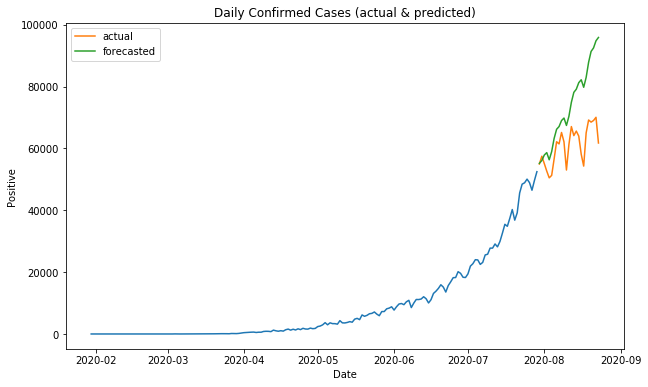

In [49]:
rcParams['figure.figsize'] = 10, 6
plt.plot(train)
plt.plot(test['Daily Confirmed'],label ='actual')
plt.plot(test['forecast'],label ='forecasted')
plt.title('Daily Confirmed Cases (actual & predicted)')
plt.xlabel('Date')
plt.ylabel('Positive')
plt.legend(loc='best')
plt.show()

In [50]:
residuals = test['Daily Confirmed'] - test['forecast']

In [51]:
from sklearn.metrics import mean_squared_error
from math import sqrt
sqrt(mean_squared_error(test['Daily Confirmed'],test['forecast']))

15601.972966387038

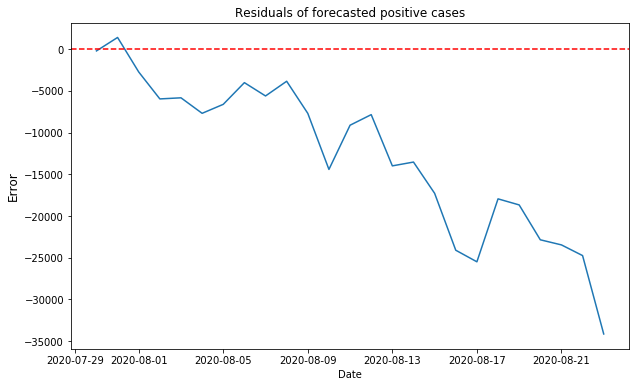

In [52]:
plt.plot(residuals)
plt.title('Residuals of forecasted positive cases')
plt.ylabel('Error', fontsize=12)
plt.xlabel('Date')
plt.axhline(0, color='r', linestyle='--')

train - 30 jan to 24 jun, test - 25 jun to 21 jul

model is reliably predicted from 25 jun to 12 jul after that the forecasted values have an increasing error as it proceeds
reason would the sudden change in magnitude of the incoming cases from 13 jul

data from 30 jan to 21 jul to predict 22 jul to 8 Aug


In [53]:
model1 = sm.tsa.statespace.SARIMAX(df_1['Daily Confirmed'],order=(2, 2, 1),seasonal_order=(1, 2, 2, 7))
results = model1.fit()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



In [54]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                
=========================================================================================
Dep. Variable:                   Daily Confirmed   No. Observations:                  207
Model:             SARIMAX(2, 2, 1)x(1, 2, 2, 7)   Log Likelihood               -1644.716
Date:                           Mon, 24 Aug 2020   AIC                           3303.431
Time:                                   17:27:46   BIC                           3326.197
Sample:                               01-30-2020   HQIC                          3312.653
                                    - 08-23-2020                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3095      0.054     -5.689      0.000      -0.416      -0.203
ar.L2         -0.3773      0.038     -9.825      0.000      -0.453      -0.302
ma.L1         -0.9162      0.022    -42.610      0.000      -0.958      -0.874
ar.S.L7       -0.2728      0.140     -1.947      0.051      -0.547       0.002
ma.S.L7       -1.2514      0.157     -7.947      0.000      -1.560      -0.943
ma.S.L14       0.4334      0.186      2.334      0.020       0.069       0.797
sigma2      1.706e+06    9.8e+04     17.416      0.000    1.51e+06     1.9e+06
===================================================================================
Ljung-Box (Q):                       59.31   Jarque-Bera (JB):               393.77
Prob(Q):                              0.03   Prob(JB):                         0.00
Heteroskedasticity (H):             382.05   Skew:                            -0.01
Prob(H) (two-sided):                  0.00   Kurtosis:                        10.03
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [55]:
predict= results.get_prediction(start=int((df_1.shape[0]) * 0.7), end=int((df_1.shape[0]) * 1.1), alpha=0.1)

In [56]:
forecasted_results = predict.conf_int(alpha=0.05)
forecasted_results['mean'] = predict.predicted_mean
forecasted_results

lower Daily Confirmed  upper Daily Confirmed          mean
2020-06-22           10565.398600           15685.702770  13125.550685
2020-06-23           12768.967912           17889.271873  15329.119892
2020-06-24           14760.600710           19880.904516  17320.752613
2020-06-25           14789.835809           19910.139468  17349.987638
2020-06-26           16278.636837           21398.940443  18838.788640
2020-06-27           16731.542432           21851.845931  19291.694182
2020-06-28           17016.861669           22137.165078  19577.013373
2020-06-29           14860.027394           19980.330692  17420.179043
2020-06-30           17719.611705           22839.914914  20279.763309
2020-07-01           18184.460701           23304.763829  20744.612265
2020-07-02           18949.313960           24069.617021  21509.465491
2020-07-03           19816.653370           24936.956396  22376.804883
2020-07-04           21309.308071           26429.611050  23869.459561
2020-07-05           20632.776499           25753.079440  23192.927970
2020-07-06           19615.689510           24735.992414  22175.840962
2020-07-07           21093.354668           26213.657540  23653.506104
2020-07-08           22521.181220           27641.484054  25081.332637
2020-07-09           25362.170859           30482.473667  27922.322263
2020-07-10           24101.588715           29221.891505  26661.740110
2020-07-11           27482.608305           32602.911077  30042.759691
2020-07-12           24467.310576           29587.613334  27027.461955
2020-07-13           25128.127787           30248.430535  27688.279161
2020-07-14           25422.511285           30542.814026  27982.662655
2020-07-15           29091.802269           34212.104993  31651.953631
2020-07-16           31693.291002           36813.593718  34253.442360
2020-07-17           34211.666623           39331.969330  36771.817976
2020-07-18           33935.015818           39055.318520  36495.167169
2020-07-19           35873.562640           40993.865338  38433.713989
2020-07-20           35610.356526           40730.659222  38170.507874
2020-07-21           35444.803972           40565.106667  38004.955319
...                           ...                    ...           ...
2020-08-15           65235.826274           70356.128947  67795.977610
2020-08-16           57687.954792           62808.257465  60248.106129
2020-08-17           49942.887997           55063.190670  52503.039334
2020-08-18           55830.378365           60950.681038  58390.529702
2020-08-19           65423.470559           70543.773232  67983.621895
2020-08-20           66567.288635           71687.591307  69127.439971
2020-08-21           67615.752121           72736.054794  70175.903457
2020-08-22           67257.311004           72377.613677  69817.462341
2020-08-23           61316.928714           66437.231387  63877.080050
2020-08-24           51819.229488           56939.532161  54379.380825
2020-08-25           61186.098655           67661.899687  64423.999171
2020-08-26           65877.440366           72940.431870  69408.936118
2020-08-27           63480.132225           71616.631216  67548.381721
2020-08-28           63407.150211           72716.400293  68061.775252
2020-08-29           62261.830530           72534.078125  67397.954328
2020-08-30           52742.287961           64015.997217  58379.142589
2020-08-31           43735.371538           57267.690741  50501.531139
2020-09-01           54737.969979           70031.585961  62384.777970
2020-09-02           58836.147765           75572.821624  67204.484695
2020-09-03           55060.136559           73470.226032  64265.181295
2020-09-04           54264.787329           74400.830163  64332.808746
2020-09-05           52647.832463           74431.512519  63539.672491
2020-09-06           40551.116333           64012.552135  52281.834234
2020-09-07           29608.668041           56559.889383  43084.278712
2020-09-08           41451.056942   

In [76]:
fr =forecasted_results.iloc[50:,:]

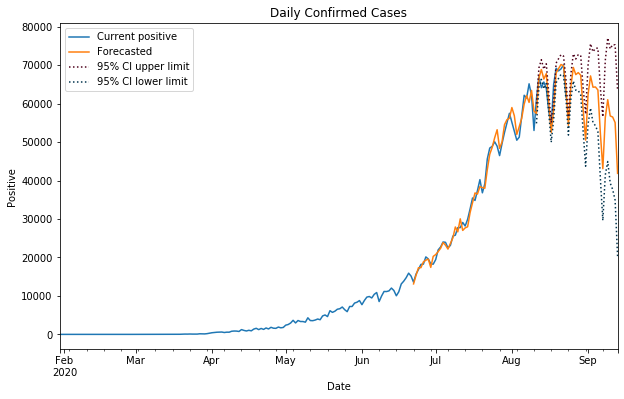

In [58]:
axis = df_1['Daily Confirmed'].plot(label='Current positive', figsize=(10, 6))
forecasted_results['mean'].plot(ax=axis, label='Forecasted')
fr['upper Daily Confirmed'].plot(ax=axis, label='95% CI upper limit',color=(0.3,0,0.1),linestyle='dotted')
fr['lower Daily Confirmed'].plot(ax=axis, label='95% CI lower limit',color=(0.0,0.2,0.3),linestyle='dotted')
axis.set_xlabel('Date')
axis.set_ylabel('Positive')
plt.title('Daily Confirmed Cases')
plt.legend(loc='best')
plt.show()

### Cumulative confirmed cases

In [77]:
fr['cm'] = fr['mean']+2267167

for i in range(1,fr.shape[0]):
    fr.iloc[i,3] = fr.iloc[i-1,3] + fr.iloc[i,2]

In [78]:
fr['up_cm'] = fr['upper Daily Confirmed']+2267167

for i in range(1,fr.shape[0]):
    fr.iloc[i,4] = fr.iloc[i-1,4] + fr.iloc[i,1]

In [79]:
fr['lw_cm'] = fr['lower Daily Confirmed']+2267176

for i in range(1,fr.shape[0]):
    fr.iloc[i,5] = fr.iloc[i-1,5] + fr.iloc[i,0]

In [80]:
fr.tail()

lower Daily Confirmed  upper Daily Confirmed          mean  \
2020-09-09           44939.894227           77097.209253  61018.551740   
2020-09-10           39360.187401           74233.115567  56796.651484   
2020-09-11           37676.995336           75351.326850  56514.161093   
2020-09-12           34889.587805           75250.640803  55070.114304   
2020-09-13           20314.986702           63407.974927  41861.480815   

                      cm         up_cm         lw_cm  
2020-09-09  4.141040e+06  4.312271e+06  3.969818e+06  
2020-09-10  4.197837e+06  4.386504e+06  4.009178e+06  
2020-09-11  4.254351e+06  4.461856e+06  4.046855e+06  
2020-09-12  4.309421e+06  4.537106e+06  4.081744e+06  
2020-09-13  4.351282e+06  4.600514e+06  4.102059e+06

In [70]:
df.tail(20)

Daily Confirmed  Total Confirmed  Daily Recovered  \
Date                                                            
2020-08-04            51282          1906627            51220   
2020-08-05            56626          1963253            45583   
2020-08-06            62170          2025423            50141   
2020-08-07            61455          2086878            50285   
2020-08-08            65156          2152034            52135   
2020-08-09            62117          2214151            54474   
2020-08-10            53016          2267167            47362   
2020-08-11            61252          2328419            56461   
2020-08-12            67066          2395485            57759   
2020-08-13            64142          2459627            54776   
2020-08-14            65609          2525236            56920   
2020-08-15            63986          2589222            53116   
2020-08-16            58108          2647330            57404   
2020-08-17            54288          2701618            58172   
2020-08-18            65022          2766640            60455   
2020-08-19            69196          2835836            59365   
2020-08-20            68507          2904343            61873   
2020-08-21            69039          2973382            62858   
2020-08-22            70068          3043450            59101   
2020-08-23            61749          3105199            56896   

            Total Recovered  Daily Deceased  Total Deceased  
Date                                                         
2020-08-04          1281551             849           39835  
2020-08-05          1327134             919           40754  
2020-08-06          1377275             899           41653  
2020-08-07          1427560             940           42593  
2020-08-08          1479695             875           43468  
2020-08-09          1534169            1013           44481  
2020-08-10          1581531             887           45368  
2020-08-11          1637992             835           46203  
2020-08-12          1695751             950           47153  
2020-08-13          1750527            1006           48159  
2020-08-14          1807447             990           49149  
2020-08-15          1860563             950           50099  
2020-08-16          1917967             961           51060  
2020-08-17          1976139             880           51940  
2020-08-18          2036594            1089           53029  
2020-08-19          2095959             980           54009  
2020-08-20          2157832             981           54990  
2020-08-21          2220690             953           55943  
2020-08-22          2279791             918           56861  
2020-08-23          2336687             846           57707

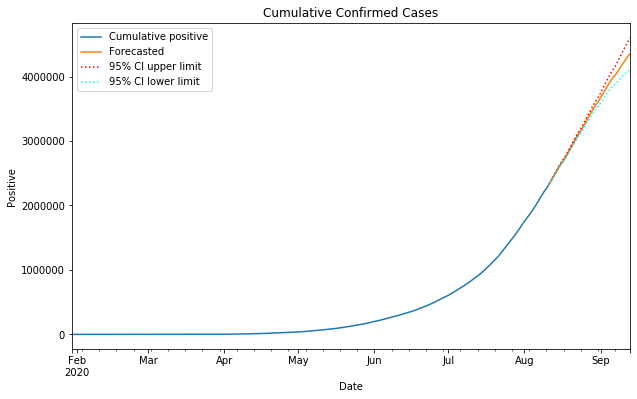

In [81]:
axis = df['Total Confirmed'].plot(label='Cumulative positive', figsize=(10, 6))
fr['cm'].plot(ax=axis, label='Forecasted')
fr['up_cm'].plot(ax=axis, label='95% CI upper limit',color='red',linestyle='dotted')
fr['lw_cm'].plot(ax=axis, label='95% CI lower limit',color='cyan',linestyle='dotted')
axis.set_xlabel('Date')
axis.set_ylabel('Positive')
plt.title('Cumulative Confirmed Cases')
plt.legend(loc='best')
plt.show()

there are high fluctuations in graphs of recoviries daily and deaths daily, by which we can tell that 
they are not reported as accurately as confirmed cases

so we would use ma for last 3 days for modelling their trend

### Daily Recovered prediction 

In [82]:
def Moving_avg(x):
    for i in range(2,174):
        sum = x.iloc[i-1,0] + x.iloc[i-2,0] + x.iloc[i,0]
        x.iloc[i,0] = sum/3

In [83]:
df_rec = pd.DataFrame()
df_rec['Daily Recovered'] =df_1['Daily Recovered']

In [84]:
df_rec.shape

(207, 1)

In [85]:
Moving_avg(df_rec)

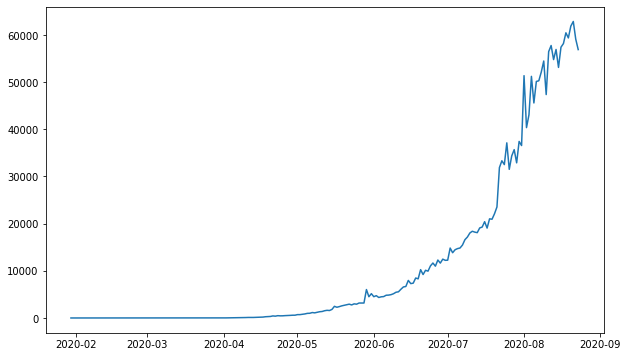

In [86]:
plt.plot(df_rec)

In [89]:
train_2 = df_rec[0:int(len(df_rec)*0.90)]
test_2 = df_rec[int(len(df_rec)*0.90):]

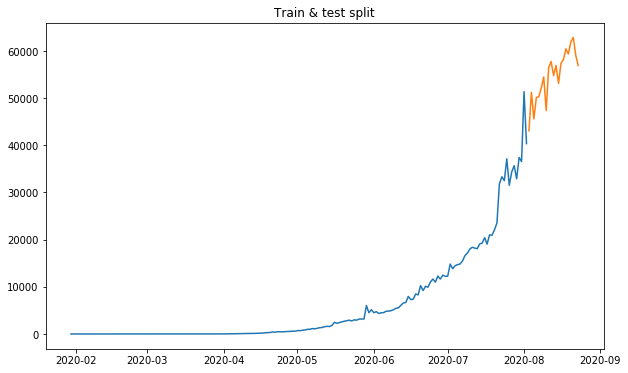

In [90]:
rcParams['figure.figsize'] = 10,6 
plt.plot(train_2)
plt.plot(test_2['Daily Recovered'])
plt.title('Train & test split')
plt.show()

In [91]:
best_aic = np.inf
best_pdq = None
best_seasonal_pdq = None
temp_model = None

In [92]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        
        try:
            temp_model = sm.tsa.statespace.SARIMAX(train_2,
                                             order = param,
                                             seasonal_order = param_seasonal)
            results = temp_model.fit()

            print(f'SARIMAX{param}x{param_seasonal} - AIC:{results.aic}')
            if results.aic < best_aic:
                best_aic = results.aic
                best_pdq = param
                best_seasonal_pdq = param_seasonal
        except:
            print("Unexpected error:", sys.exc_info()[0])
            continue
print(f'Best SARIMAX{best_pdq}x{best_seasonal_pdq} model - AIC:{best_aic}')

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 0, 0)x(0, 0, 0, 7) - AIC:4012.099352632034
SARIMAX(0, 0, 0)x(0, 0, 1, 7) - AIC:3825.782806459021


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 0, 0)x(0, 0, 2, 7) - AIC:3681.3846309611927
SARIMAX(0, 0, 0)x(0, 1, 0, 7) - AIC:3403.0947478626204
SARIMAX(0, 0, 0)x(0, 1, 1, 7) - AIC:3350.853460194633


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 0, 0)x(0, 1, 2, 7) - AIC:3305.223746194134
SARIMAX(0, 0, 0)x(0, 2, 0, 7) - AIC:3194.0639569609166


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 0, 0)x(0, 2, 1, 7) - AIC:3153.916659436653


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 0, 0)x(0, 2, 2, 7) - AIC:3143.3731004868114


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 0, 0)x(1, 0, 0, 7) - AIC:3566.7351935120187


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



Unexpected error: <class 'numpy.linalg.LinAlgError'>


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 0, 0)x(1, 0, 2, 7) - AIC:3475.8561315694933


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 0, 0)x(1, 1, 0, 7) - AIC:3310.1589876862117


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 0, 0)x(1, 1, 1, 7) - AIC:3279.930113333766


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 0, 0)x(1, 1, 2, 7) - AIC:3270.2099140050614
SARIMAX(0, 0, 0)x(1, 2, 0, 7) - AIC:3140.450149800474


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 0, 0)x(1, 2, 1, 7) - AIC:3140.4529575021297


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 0, 0)x(1, 2, 2, 7) - AIC:3135.8929709588538


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 0, 0)x(2, 0, 0, 7) - AIC:3481.0233844535055


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 0, 0)x(2, 0, 1, 7) - AIC:3466.4142297062435


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 0, 0)x(2, 0, 2, 7) - AIC:3510.0412489400974
SARIMAX(0, 0, 0)x(2, 1, 0, 7) - AIC:3267.378852215831


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 0, 0)x(2, 1, 1, 7) - AIC:3268.5638595518476


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 0, 0)x(2, 1, 2, 7) - AIC:3268.2700865056577


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 0, 0)x(2, 2, 0, 7) - AIC:3138.4423379560003


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 0, 0)x(2, 2, 1, 7) - AIC:3132.9722483881005


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 0, 0)x(2, 2, 2, 7) - AIC:3133.944163372341
SARIMAX(0, 0, 1)x(0, 0, 0, 7) - AIC:3811.4267562472082


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 0, 1)x(0, 0, 1, 7) - AIC:3672.720084396671


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 0, 1)x(0, 0, 2, 7) - AIC:3543.1959924186567
SARIMAX(0, 0, 1)x(0, 1, 0, 7) - AIC:3278.0287495934945


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 0, 1)x(0, 1, 1, 7) - AIC:3259.8543857457234


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 0, 1)x(0, 1, 2, 7) - AIC:3214.0575508601073
SARIMAX(0, 0, 1)x(0, 2, 0, 7) - AIC:3131.0803926759722


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 0, 1)x(0, 2, 1, 7) - AIC:3083.2156034687896


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 0, 1)x(0, 2, 2, 7) - AIC:3073.9123027430223


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 0, 1)x(1, 0, 0, 7) - AIC:3434.854686291723


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 0, 1)x(1, 0, 1, 7) - AIC:3417.914784520666


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 0, 1)x(1, 0, 2, 7) - AIC:3533.6949202487795
SARIMAX(0, 0, 1)x(1, 1, 0, 7) - AIC:3235.8446842941075


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 0, 1)x(1, 1, 1, 7) - AIC:3207.774268246246


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 0, 1)x(1, 1, 2, 7) - AIC:3198.8709465522825
SARIMAX(0, 0, 1)x(1, 2, 0, 7) - AIC:3061.232515245914


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 0, 1)x(1, 2, 1, 7) - AIC:3064.6196257802267


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 0, 1)x(1, 2, 2, 7) - AIC:3059.328300987152


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 0, 1)x(2, 0, 0, 7) - AIC:3397.3903091251627


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 0, 1)x(2, 0, 1, 7) - AIC:3725.73932211356
Unexpected error: <class 'numpy.linalg.LinAlgError'>


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 0, 1)x(2, 1, 0, 7) - AIC:3187.855153972035


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 0, 1)x(2, 1, 1, 7) - AIC:3187.3213217928937


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 0, 1)x(2, 1, 2, 7) - AIC:3189.022447691377


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 0, 1)x(2, 2, 0, 7) - AIC:3075.7342191544158


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 0, 1)x(2, 2, 1, 7) - AIC:3058.803899879099
SARIMAX(0, 0, 1)x(2, 2, 2, 7) - AIC:3083.775886147838


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 0, 2)x(0, 0, 0, 7) - AIC:3648.092046331103


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 0, 2)x(0, 0, 1, 7) - AIC:3546.1754485892698
SARIMAX(0, 0, 2)x(0, 0, 2, 7) - AIC:3506.0060756404564


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 0, 2)x(0, 1, 0, 7) - AIC:3210.3993947708777


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 0, 2)x(0, 1, 1, 7) - AIC:3202.506828076078


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 0, 2)x(0, 1, 2, 7) - AIC:3170.176782720487


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 0, 2)x(0, 2, 0, 7) - AIC:3098.942732913655


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 0, 2)x(0, 2, 1, 7) - AIC:3045.3989394666537


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 0, 2)x(0, 2, 2, 7) - AIC:3032.0588363328675


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 0, 2)x(1, 0, 0, 7) - AIC:3398.935579916933


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 0, 2)x(1, 0, 1, 7) - AIC:3376.300938593201


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 0, 2)x(1, 0, 2, 7) - AIC:3555.080105781733
SARIMAX(0, 0, 2)x(1, 1, 0, 7) - AIC:3183.510756256656


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 0, 2)x(1, 1, 1, 7) - AIC:3168.286683081774


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 0, 2)x(1, 1, 2, 7) - AIC:3157.6080169884963


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 0, 2)x(1, 2, 0, 7) - AIC:3020.128699824596


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 0, 2)x(1, 2, 1, 7) - AIC:3022.257513832305


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 0, 2)x(1, 2, 2, 7) - AIC:4112.313653014435


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 0, 2)x(2, 0, 0, 7) - AIC:3455.949081373342


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 0, 2)x(2, 0, 1, 7) - AIC:3850.7702453085913


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 0, 2)x(2, 0, 2, 7) - AIC:3691.780911479933
SARIMAX(0, 0, 2)x(2, 1, 0, 7) - AIC:3147.3111503970413


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 0, 2)x(2, 1, 1, 7) - AIC:3193.572373225


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 0, 2)x(2, 1, 2, 7) - AIC:3150.974180931623
SARIMAX(0, 0, 2)x(2, 2, 0, 7) - AIC:3051.369860661054


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 0, 2)x(2, 2, 1, 7) - AIC:3022.731495693106
SARIMAX(0, 0, 2)x(2, 2, 2, 7) - AIC:7451.331750430994
SARIMAX(0, 1, 0)x(0, 0, 0, 7) - AIC:3285.9949903924285
SARIMAX(0, 1, 0)x(0, 0, 1, 7) - AIC:3263.756582941113


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 1, 0)x(0, 0, 2, 7) - AIC:3244.8030020567257
SARIMAX(0, 1, 0)x(0, 1, 0, 7) - AIC:3125.6549453470225


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 1, 0)x(0, 1, 1, 7) - AIC:3120.2692341212132


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 1, 0)x(0, 1, 2, 7) - AIC:3115.8753033785506
SARIMAX(0, 1, 0)x(0, 2, 0, 7) - AIC:3097.5911746853626


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 1, 0)x(0, 2, 1, 7) - AIC:3021.2168021122593


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 1, 0)x(0, 2, 2, 7) - AIC:3010.1232619439866
SARIMAX(0, 1, 0)x(1, 0, 0, 7) - AIC:3247.076345937786


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 1, 0)x(1, 0, 1, 7) - AIC:3247.264174566176


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 1, 0)x(1, 0, 2, 7) - AIC:3240.9583454866824
SARIMAX(0, 1, 0)x(1, 1, 0, 7) - AIC:3117.905523907357


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 1, 0)x(1, 1, 1, 7) - AIC:3111.329064100748


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 1, 0)x(1, 1, 2, 7) - AIC:3112.413062146856


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 1, 0)x(1, 2, 0, 7) - AIC:3000.046396148544


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 1, 0)x(1, 2, 1, 7) - AIC:3001.717772042902


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 1, 0)x(1, 2, 2, 7) - AIC:2998.178073691946
SARIMAX(0, 1, 0)x(2, 0, 0, 7) - AIC:3246.13575392885


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 1, 0)x(2, 0, 1, 7) - AIC:3241.215996408552


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 1, 0)x(2, 0, 2, 7) - AIC:3242.6722075589482


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 1, 0)x(2, 1, 0, 7) - AIC:3112.8931270056714


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 1, 0)x(2, 1, 1, 7) - AIC:3112.3710549011166


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 1, 0)x(2, 1, 2, 7) - AIC:3115.0676378341923


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 1, 0)x(2, 2, 0, 7) - AIC:3001.7818424183424


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 1, 0)x(2, 2, 1, 7) - AIC:3000.5612020912176


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 1, 0)x(2, 2, 2, 7) - AIC:3003.615962397236
SARIMAX(0, 1, 1)x(0, 0, 0, 7) - AIC:3259.0484848930437


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 1, 1)x(0, 0, 1, 7) - AIC:3236.3924186577306


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 1, 1)x(0, 0, 2, 7) - AIC:3222.778623369066
SARIMAX(0, 1, 1)x(0, 1, 0, 7) - AIC:3109.71499700936


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 1, 1)x(0, 1, 1, 7) - AIC:3093.2175258759057


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 1, 1)x(0, 1, 2, 7) - AIC:3093.6076202589793
SARIMAX(0, 1, 1)x(0, 2, 0, 7) - AIC:3094.0351122883367


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 1, 1)x(0, 2, 1, 7) - AIC:3008.3909017893593


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 1, 1)x(0, 2, 2, 7) - AIC:2983.1631876816973


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 1, 1)x(1, 0, 0, 7) - AIC:3222.6709876573477


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 1, 1)x(1, 0, 1, 7) - AIC:3219.061836018585


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 1, 1)x(1, 0, 2, 7) - AIC:3217.726350183096


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 1, 1)x(1, 1, 0, 7) - AIC:3088.9464098965723


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 1, 1)x(1, 1, 1, 7) - AIC:3088.462679426835


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 1, 1)x(1, 1, 2, 7) - AIC:3090.549855974682


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 1, 1)x(1, 2, 0, 7) - AIC:2991.012027293373


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 1, 1)x(1, 2, 1, 7) - AIC:2980.2754692658186


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 1, 1)x(1, 2, 2, 7) - AIC:2979.0010010691244


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 1, 1)x(2, 0, 0, 7) - AIC:3216.98647425497


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 1, 1)x(2, 0, 1, 7) - AIC:3216.7584918851608


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 1, 1)x(2, 0, 2, 7) - AIC:3218.63362259892
SARIMAX(0, 1, 1)x(2, 1, 0, 7) - AIC:3088.849973336015


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 1, 1)x(2, 1, 1, 7) - AIC:3090.352060552562
SARIMAX(0, 1, 1)x(2, 1, 2, 7) - AIC:3092.425158429128


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 1, 1)x(2, 2, 0, 7) - AIC:2997.607500951054


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 1, 1)x(2, 2, 1, 7) - AIC:3012.7054515615046
SARIMAX(0, 1, 1)x(2, 2, 2, 7) - AIC:3009.9284494046815
SARIMAX(0, 1, 2)x(0, 0, 0, 7) - AIC:3230.993097880185


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 1, 2)x(0, 0, 1, 7) - AIC:3224.4865560179796


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 1, 2)x(0, 0, 2, 7) - AIC:3219.8380867400597
SARIMAX(0, 1, 2)x(0, 1, 0, 7) - AIC:3111.3682087126945


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 1, 2)x(0, 1, 1, 7) - AIC:3092.997934074785


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 1, 2)x(0, 1, 2, 7) - AIC:3093.414569750733
SARIMAX(0, 1, 2)x(0, 2, 0, 7) - AIC:3094.420621753518


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 1, 2)x(0, 2, 1, 7) - AIC:3010.054386216543


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 1, 2)x(0, 2, 2, 7) - AIC:2984.9526719820333


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 1, 2)x(1, 0, 0, 7) - AIC:3219.611421113015


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 1, 2)x(1, 0, 1, 7) - AIC:3216.194813942102


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 1, 2)x(1, 0, 2, 7) - AIC:3217.7372735970025


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 1, 2)x(1, 1, 0, 7) - AIC:3089.0156354063747


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 1, 2)x(1, 1, 1, 7) - AIC:3090.07922293235


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 1, 2)x(1, 1, 2, 7) - AIC:3091.8436780086404


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 1, 2)x(1, 2, 0, 7) - AIC:2989.5323983695616


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 1, 2)x(1, 2, 1, 7) - AIC:2980.2491808684176


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 1, 2)x(1, 2, 2, 7) - AIC:3006.8825880940913


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 1, 2)x(2, 0, 0, 7) - AIC:3214.821874152599


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 1, 2)x(2, 0, 1, 7) - AIC:3216.6369832719183


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 1, 2)x(2, 0, 2, 7) - AIC:3218.358341334811
SARIMAX(0, 1, 2)x(2, 1, 0, 7) - AIC:3090.291877527551


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 1, 2)x(2, 1, 1, 7) - AIC:3092.7601367897732


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 1, 2)x(2, 1, 2, 7) - AIC:3094.2637474986177
SARIMAX(0, 1, 2)x(2, 2, 0, 7) - AIC:3008.2704900724448


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 1, 2)x(2, 2, 1, 7) - AIC:3015.7961412459613


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 1, 2)x(2, 2, 2, 7) - AIC:3052.8940998533826
SARIMAX(0, 2, 0)x(0, 0, 0, 7) - AIC:3446.0269484871724
SARIMAX(0, 2, 0)x(0, 0, 1, 7) - AIC:3431.860281727479


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 2, 0)x(0, 0, 2, 7) - AIC:3394.765957492758
SARIMAX(0, 2, 0)x(0, 1, 0, 7) - AIC:3275.366017392221


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 2, 0)x(0, 1, 1, 7) - AIC:3273.3462970000883


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 2, 0)x(0, 1, 2, 7) - AIC:3262.033685188165
SARIMAX(0, 2, 0)x(0, 2, 0, 7) - AIC:3228.177481849115


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 2, 0)x(0, 2, 1, 7) - AIC:3161.4505353661475


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 2, 0)x(0, 2, 2, 7) - AIC:3154.7430774005534
SARIMAX(0, 2, 0)x(1, 0, 0, 7) - AIC:3406.5545813649037


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 2, 0)x(1, 0, 1, 7) - AIC:3407.084730933924


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 2, 0)x(1, 0, 2, 7) - AIC:3394.341892165812
SARIMAX(0, 2, 0)x(1, 1, 0, 7) - AIC:3271.159771543673


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 2, 0)x(1, 1, 1, 7) - AIC:3257.7389992720846


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 2, 0)x(1, 1, 2, 7) - AIC:3252.7800899391004


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 2, 0)x(1, 2, 0, 7) - AIC:3133.6261211882043


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 2, 0)x(1, 2, 1, 7) - AIC:3133.05677682206


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 2, 0)x(1, 2, 2, 7) - AIC:3132.953117500324
SARIMAX(0, 2, 0)x(2, 0, 0, 7) - AIC:3405.8856005128882

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 2, 0)x(2, 0, 1, 7) - AIC:3395.712737603574


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 2, 0)x(2, 0, 2, 7) - AIC:3391.524851799581


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 2, 0)x(2, 1, 0, 7) - AIC:3259.1892258113626


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 2, 0)x(2, 1, 1, 7) - AIC:3253.682845778025


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 2, 0)x(2, 1, 2, 7) - AIC:3253.818533067657


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 2, 0)x(2, 2, 0, 7) - AIC:3133.552971566212


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 2, 0)x(2, 2, 1, 7) - AIC:3137.017877665939


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 2, 0)x(2, 2, 2, 7) - AIC:3139.3286075191218
SARIMAX(0, 2, 1)x(0, 0, 0, 7) - AIC:3272.6568250454197


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 2, 1)x(0, 0, 1, 7) - AIC:3250.8740137016775


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 2, 1)x(0, 0, 2, 7) - AIC:3231.5354686863952
SARIMAX(0, 2, 1)x(0, 1, 0, 7) - AIC:3115.0502721117346


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 2, 1)x(0, 1, 1, 7) - AIC:3110.160360253571


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 2, 1)x(0, 1, 2, 7) - AIC:3104.3902175917992
SARIMAX(0, 2, 1)x(0, 2, 0, 7) - AIC:3086.12792477732

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 2, 1)x(0, 2, 1, 7) - AIC:3013.8742862995196


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 2, 1)x(0, 2, 2, 7) - AIC:3002.607973065121


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 2, 1)x(1, 0, 0, 7) - AIC:3233.1994105626195


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 2, 1)x(1, 0, 1, 7) - AIC:3232.617567980794


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 2, 1)x(1, 0, 2, 7) - AIC:3226.5444897040097


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 2, 1)x(1, 1, 0, 7) - AIC:3107.609173687585


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 2, 1)x(1, 1, 1, 7) - AIC:3100.9397118995666


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 2, 1)x(1, 1, 2, 7) - AIC:3103.58113184264


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 2, 1)x(1, 2, 0, 7) - AIC:2991.3342704360084


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 2, 1)x(1, 2, 1, 7) - AIC:2993.143542836786


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 2, 1)x(1, 2, 2, 7) - AIC:2991.9733829435195


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 2, 1)x(2, 0, 0, 7) - AIC:3231.1849352872773


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 2, 1)x(2, 0, 1, 7) - AIC:3234.7975116635894


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 2, 1)x(2, 0, 2, 7) - AIC:3228.0115610913726
SARIMAX(0, 2, 1)x(2, 1, 0, 7) - AIC:3101.798983898009


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 2, 1)x(2, 1, 1, 7) - AIC:3101.663056016797
SARIMAX(0, 2, 1)x(2, 1, 2, 7) - AIC:3111.6284091356074


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 2, 1)x(2, 2, 0, 7) - AIC:3020.036398857783


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 2, 1)x(2, 2, 1, 7) - AIC:3024.4340485769735
SARIMAX(0, 2, 1)x(2, 2, 2, 7) - AIC:3019.1889598735806


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 2, 2)x(0, 0, 0, 7) - AIC:3213.352983624497


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 2, 2)x(0, 0, 1, 7) - AIC:3208.8161604189


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 2, 2)x(0, 0, 2, 7) - AIC:3199.2360231629946


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 2, 2)x(0, 1, 0, 7) - AIC:3099.257512162085


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 2, 2)x(0, 1, 1, 7) - AIC:3082.4604256774974


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 2, 2)x(0, 1, 2, 7) - AIC:3081.423707471242


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 2, 2)x(0, 2, 0, 7) - AIC:3082.754219994549


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 2, 2)x(0, 2, 1, 7) - AIC:3001.2752835518245


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 2, 2)x(0, 2, 2, 7) - AIC:2975.6940914016277


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 2, 2)x(1, 0, 0, 7) - AIC:3204.3184959136324


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 2, 2)x(1, 0, 1, 7) - AIC:3200.6715844993078


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 2, 2)x(1, 0, 2, 7) - AIC:3211.718552435059
SARIMAX(0, 2, 2)x(1, 1, 0, 7) - AIC:3076.002985116542


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 2, 2)x(1, 1, 1, 7) - AIC:3076.67418705974
SARIMAX(0, 2, 2)x(1, 1, 2, 7) - AIC:3078.488127166087


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 2, 2)x(1, 2, 0, 7) - AIC:2980.9699249685427


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 2, 2)x(1, 2, 1, 7) - AIC:2972.9071150956347


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX(0, 2, 2)x(1, 2, 2, 7) - AIC:2972.417919848466


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 2, 2)x(2, 0, 0, 7) - AIC:3201.5554009747225


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 2, 2)x(2, 0, 1, 7) - AIC:3199.2799661709387


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 2, 2)x(2, 0, 2, 7) - AIC:3212.594126909278
SARIMAX(0, 2, 2)x(2, 1, 0, 7) - AIC:3076.8768663397213


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 2, 2)x(2, 1, 1, 7) - AIC:3078.414779642057
SARIMAX(0, 2, 2)x(2, 1, 2, 7) - AIC:3092.614233296582


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 2, 2)x(2, 2, 0, 7) - AIC:2975.6695401532916


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 2, 2)x(2, 2, 1, 7) - AIC:2985.7240980884944


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 2, 2)x(2, 2, 2, 7) - AIC:2978.212184229682
SARIMAX(1, 0, 0)x(0, 0, 0, 7) - AIC:3310.9877918942816


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 0, 0)x(0, 0, 1, 7) - AIC:3288.6743432398557


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 0, 0)x(0, 0, 2, 7) - AIC:3269.8134020657144
SARIMAX(1, 0, 0)x(0, 1, 0, 7) - AIC:3136.955789157525


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 0, 0)x(0, 1, 1, 7) - AIC:3135.659153126278


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 0, 0)x(0, 1, 2, 7) - AIC:3126.3398330568507
SARIMAX(1, 0, 0)x(0, 2, 0, 7) - AIC:3087.4613732870384


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 0, 0)x(0, 2, 1, 7) - AIC:3024.755798948261


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 0, 0)x(0, 2, 2, 7) - AIC:3016.9803094734084


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 0, 0)x(1, 0, 0, 7) - AIC:3270.802668587744


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 0, 0)x(1, 0, 1, 7) - AIC:3270.8300258076742


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 0, 0)x(1, 0, 2, 7) - AIC:3264.683600861066
SARIMAX(1, 0, 0)x(1, 1, 0, 7) - AIC:3133.76562479107


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 0, 0)x(1, 1, 1, 7) - AIC:3140.6127725272386


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 0, 0)x(1, 1, 2, 7) - AIC:3137.314109186612


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 0, 0)x(1, 2, 0, 7) - AIC:3002.934107557531


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 0, 0)x(1, 2, 1, 7) - AIC:3008.59282767134


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 0, 0)x(1, 2, 2, 7) - AIC:3012.0710177345027
SARIMAX(1, 0, 0)x(2, 0, 0, 7) - AIC:3269.7696528119413


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 0, 0)x(2, 0, 1, 7) - AIC:3264.616782145031


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 0, 0)x(2, 0, 2, 7) - AIC:3266.891579452018
SARIMAX(1, 0, 0)x(2, 1, 0, 7) - AIC:3125.0986974386624


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 0, 0)x(2, 1, 1, 7) - AIC:3126.115988697269


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 0, 0)x(2, 1, 2, 7) - AIC:3127.8828485768786


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 0, 0)x(2, 2, 0, 7) - AIC:3016.9728440562258


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 0, 0)x(2, 2, 1, 7) - AIC:3020.0559193280187


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 0, 0)x(2, 2, 2, 7) - AIC:3019.3059941491756


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 0, 1)x(0, 0, 0, 7) - AIC:3284.2974002706164


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 0, 1)x(0, 0, 1, 7) - AIC:3261.965954436887


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 0, 1)x(0, 0, 2, 7) - AIC:3248.840449280039
SARIMAX(1, 0, 1)x(0, 1, 0, 7) - AIC:3126.827889989535


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 0, 1)x(0, 1, 1, 7) - AIC:3111.9408729740085


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 0, 1)x(0, 1, 2, 7) - AIC:3112.317888772347
SARIMAX(1, 0, 1)x(0, 2, 0, 7) - AIC:3089.336517605967


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 0, 1)x(0, 2, 1, 7) - AIC:3021.706822477596


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 0, 1)x(0, 2, 2, 7) - AIC:3003.050060084184


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 0, 1)x(1, 0, 0, 7) - AIC:3248.8333522160583


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 0, 1)x(1, 0, 1, 7) - AIC:3246.449604917164


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 0, 1)x(1, 0, 2, 7) - AIC:3244.6123791073987
SARIMAX(1, 0, 1)x(1, 1, 0, 7) - AIC:3107.7504911557035


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 0, 1)x(1, 1, 1, 7) - AIC:3107.5963630387787


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 0, 1)x(1, 1, 2, 7) - AIC:3114.112965320205


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 0, 1)x(1, 2, 0, 7) - AIC:3001.0405247750723


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 0, 1)x(1, 2, 1, 7) - AIC:2997.869549563765


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 0, 1)x(1, 2, 2, 7) - AIC:3003.5993790513767


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 0, 1)x(2, 0, 0, 7) - AIC:3244.6320581301497


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 0, 1)x(2, 0, 1, 7) - AIC:3244.008191256584


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 0, 1)x(2, 0, 2, 7) - AIC:3246.4005608462617
SARIMAX(1, 0, 1)x(2, 1, 0, 7) - AIC:3107.9117529842747


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 0, 1)x(2, 1, 1, 7) - AIC:3109.4380479895017


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 0, 1)x(2, 1, 2, 7) - AIC:3113.3351571261437


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 0, 1)x(2, 2, 0, 7) - AIC:3020.274612667081


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



Unexpected error: <class 'numpy.linalg.LinAlgError'>


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 0, 1)x(2, 2, 2, 7) - AIC:3011.776948385986


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 0, 2)x(0, 0, 0, 7) - AIC:3255.5402005077776


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 0, 2)x(0, 0, 1, 7) - AIC:3250.3129133134307


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 0, 2)x(0, 0, 2, 7) - AIC:3246.4170169563768


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 0, 2)x(0, 1, 0, 7) - AIC:3127.7480941658505


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 0, 2)x(0, 1, 1, 7) - AIC:3111.8607086727725


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 0, 2)x(0, 1, 2, 7) - AIC:3112.2939872326224


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 0, 2)x(0, 2, 0, 7) - AIC:3083.342617940035


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 0, 2)x(0, 2, 1, 7) - AIC:3021.462650889891


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 0, 2)x(0, 2, 2, 7) - AIC:3004.9259709227654


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 0, 2)x(1, 0, 0, 7) - AIC:3245.809920247824


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 0, 2)x(1, 0, 1, 7) - AIC:3243.312589290587
SARIMAX(1, 0, 2)x(1, 0, 2, 7) - AIC:3244.4439926515315


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 0, 2)x(1, 1, 0, 7) - AIC:3107.980923226626


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 0, 2)x(1, 1, 1, 7) - AIC:3109.2019485576247
SARIMAX(1, 0, 2)x(1, 1, 2, 7) - AIC:3114.558586937035


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 0, 2)x(1, 2, 0, 7) - AIC:3020.3073519374384


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 0, 2)x(1, 2, 1, 7) - AIC:2999.759883018194


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 0, 2)x(1, 2, 2, 7) - AIC:3007.934862617318


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 0, 2)x(2, 0, 0, 7) - AIC:3242.016149061117
SARIMAX(1, 0, 2)x(2, 0, 1, 7) - AIC:3244.5475064707834


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 0, 2)x(2, 0, 2, 7) - AIC:3246.2602791900554
SARIMAX(1, 0, 2)x(2, 1, 0, 7) - AIC:3109.3588694137698


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 0, 2)x(2, 1, 1, 7) - AIC:3111.7682404489487


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 0, 2)x(2, 1, 2, 7) - AIC:3115.639877789773


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 0, 2)x(2, 2, 0, 7) - AIC:3004.514791466011
Unexpected error: <class 'numpy.linalg.LinAlgError'>


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 0, 2)x(2, 2, 2, 7) - AIC:3788.2299159182794
SARIMAX(1, 1, 0)x(0, 0, 0, 7) - AIC:3241.7207484568426


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 1, 0)x(0, 0, 1, 7) - AIC:3225.1269618788374


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 1, 0)x(0, 0, 2, 7) - AIC:3216.1503999839324
SARIMAX(1, 1, 0)x(0, 1, 0, 7) - AIC:3107.994212620951


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 1, 0)x(0, 1, 1, 7) - AIC:3088.1466169930727


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 1, 0)x(0, 1, 2, 7) - AIC:3088.2335621025395
SARIMAX(1, 1, 0)x(0, 2, 0, 7) - AIC:3093.172566390026


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 1, 0)x(0, 2, 1, 7) - AIC:3007.0408778721885


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 1, 0)x(0, 2, 2, 7) - AIC:2981.195169528418


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 1, 0)x(1, 0, 0, 7) - AIC:3216.2172268136474


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 1, 0)x(1, 0, 1, 7) - AIC:3211.9511970224257


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 1, 0)x(1, 0, 2, 7) - AIC:3211.9300767984273


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 1, 0)x(1, 1, 0, 7) - AIC:3083.8836645364067


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 1, 0)x(1, 1, 1, 7) - AIC:3085.583968463951


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 1, 0)x(1, 1, 2, 7) - AIC:3087.448176480981


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 1, 0)x(1, 2, 0, 7) - AIC:2993.933420191289
SARIMAX(1, 1, 0)x(1, 2, 1, 7) - AIC:2978.360541899985


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 1, 0)x(1, 2, 2, 7) - AIC:2978.836986834126


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 1, 0)x(2, 0, 0, 7) - AIC:3210.122582791723


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 1, 0)x(2, 0, 1, 7) - AIC:3211.8842172797663


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 1, 0)x(2, 0, 2, 7) - AIC:3213.5035665655014


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 1, 0)x(2, 1, 0, 7) - AIC:3085.592302458322


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 1, 0)x(2, 1, 1, 7) - AIC:3087.23625497808


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 1, 0)x(2, 1, 2, 7) - AIC:3089.5627854168038
SARIMAX(1, 1, 0)x(2, 2, 0, 7) - AIC:2983.3351057069194


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 1, 0)x(2, 2, 1, 7) - AIC:3196.981943492359


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 1, 0)x(2, 2, 2, 7) - AIC:2991.2698863053893
SARIMAX(1, 1, 1)x(0, 0, 0, 7) - AIC:3237.2146174797163


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 1, 1)x(0, 0, 1, 7) - AIC:3224.5773914532656


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 1, 1)x(0, 0, 2, 7) - AIC:3214.926995909171
SARIMAX(1, 1, 1)x(0, 1, 0, 7) - AIC:3109.4761318391033


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 1, 1)x(0, 1, 1, 7) - AIC:3089.196541724965


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 1, 1)x(0, 1, 2, 7) - AIC:3089.501964425527


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 1, 1)x(0, 2, 0, 7) - AIC:3094.6748361172295


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 1, 1)x(0, 2, 1, 7) - AIC:3004.1569520730454


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 1, 1)x(0, 2, 2, 7) - AIC:2983.0954709595335


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 1, 1)x(1, 0, 0, 7) - AIC:3215.7744635498093


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 1, 1)x(1, 0, 1, 7) - AIC:3212.233841029889


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 1, 1)x(1, 0, 2, 7) - AIC:3211.477246903074


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 1, 1)x(1, 1, 0, 7) - AIC:3085.1863333936926


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 1, 1)x(1, 1, 1, 7) - AIC:3086.9959338674335


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 1, 1)x(1, 1, 2, 7) - AIC:3088.9208690831515


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 1, 1)x(1, 2, 0, 7) - AIC:3005.1215287088908
SARIMAX(1, 1, 1)x(1, 2, 1, 7) - AIC:2980.313545098269


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 1, 1)x(1, 2, 2, 7) - AIC:2980.9764535117774
SARIMAX(1, 1, 1)x(2, 0, 0, 7) - AIC:3210.5966135716417


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 1, 1)x(2, 0, 1, 7) - AIC:3212.3994516490147


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 1, 1)x(2, 0, 2, 7) - AIC:3214.369297337138
SARIMAX(1, 1, 1)x(2, 1, 0, 7) - AIC:3086.998991170554


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 1, 1)x(2, 1, 1, 7) - AIC:3088.716757824922


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 1, 1)x(2, 1, 2, 7) - AIC:3091.011713727874


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 1, 1)x(2, 2, 0, 7) - AIC:2982.4723343378573
SARIMAX(1, 1, 1)x(2, 2, 1, 7) - AIC:3007.5360736201383


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 1, 1)x(2, 2, 2, 7) - AIC:2986.5248973740563
SARIMAX(1, 1, 2)x(0, 0, 0, 7) - AIC:3230.105000665853


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 1, 2)x(0, 0, 1, 7) - AIC:3222.414657169575


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 1, 2)x(0, 0, 2, 7) - AIC:3215.277952270467
SARIMAX(1, 1, 2)x(0, 1, 0, 7) - AIC:3111.532732412636

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.




SARIMAX(1, 1, 2)x(0, 1, 1, 7) - AIC:3091.1853316717143


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 1, 2)x(0, 1, 2, 7) - AIC:3091.476123929665


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 1, 2)x(0, 2, 0, 7) - AIC:3076.5347455830215


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 1, 2)x(0, 2, 1, 7) - AIC:3002.2871965838976


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 1, 2)x(0, 2, 2, 7) - AIC:2987.1563329762525


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 1, 2)x(1, 0, 0, 7) - AIC:3217.1269574557045


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 1, 2)x(1, 0, 1, 7) - AIC:3213.878203039174


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 1, 2)x(1, 0, 2, 7) - AIC:3212.888304981985


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 1, 2)x(1, 1, 0, 7) - AIC:3087.184903897917


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 1, 2)x(1, 1, 1, 7) - AIC:3088.9809499908934


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 1, 2)x(1, 1, 2, 7) - AIC:3090.887253626812
SARIMAX(1, 1, 2)x(1, 2, 0, 7) - AIC:3013.461506706496


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 1, 2)x(1, 2, 1, 7) - AIC:2982.3331561257883
SARIMAX(1, 1, 2)x(1, 2, 2, 7) - AIC:3016.493191320832


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 1, 2)x(2, 0, 0, 7) - AIC:3212.304830537081


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 1, 2)x(2, 0, 1, 7) - AIC:3214.2029502442547


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 1, 2)x(2, 0, 2, 7) - AIC:3217.368697844353
SARIMAX(1, 1, 2)x(2, 1, 0, 7) - AIC:3088.9870811262685


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 1, 2)x(2, 1, 1, 7) - AIC:3091.4425591101085


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 1, 2)x(2, 1, 2, 7) - AIC:3095.809348895517
SARIMAX(1, 1, 2)x(2, 2, 0, 7) - AIC:3014.3010793406966


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



Unexpected error: <class 'numpy.linalg.LinAlgError'>


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



Unexpected error: <class 'numpy.linalg.LinAlgError'>
SARIMAX(1, 2, 0)x(0, 0, 0, 7) - AIC:3264.410211724502


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 2, 0)x(0, 0, 1, 7) - AIC:3262.9259919056767


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 2, 0)x(0, 0, 2, 7) - AIC:3259.8898605760123
SARIMAX(1, 2, 0)x(0, 1, 0, 7) - AIC:3169.4450647689578


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 2, 0)x(0, 1, 1, 7) - AIC:3146.602758377614


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 2, 0)x(0, 1, 2, 7) - AIC:3148.448169738122
SARIMAX(1, 2, 0)x(0, 2, 0, 7) - AIC:3143.624903862057


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 2, 0)x(0, 2, 1, 7) - AIC:3065.1585972211524


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 2, 0)x(0, 2, 2, 7) - AIC:3044.1787898591547


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 2, 0)x(1, 0, 0, 7) - AIC:3262.2827287738387


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 2, 0)x(1, 0, 1, 7) - AIC:3263.697291522157


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 2, 0)x(1, 0, 2, 7) - AIC:3262.500432953232


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 2, 0)x(1, 1, 0, 7) - AIC:3146.3449901517924


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 2, 0)x(1, 1, 1, 7) - AIC:3148.1662590303467


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 2, 0)x(1, 1, 2, 7) - AIC:3149.218225216391


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 2, 0)x(1, 2, 0, 7) - AIC:3057.07085545631


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 2, 0)x(1, 2, 1, 7) - AIC:3043.667460427082


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 2, 0)x(1, 2, 2, 7) - AIC:3043.057232134741


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 2, 0)x(2, 0, 0, 7) - AIC:3262.9962856548377


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 2, 0)x(2, 0, 1, 7) - AIC:3264.734547118703


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 2, 0)x(2, 0, 2, 7) - AIC:3262.0243543165234


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 2, 0)x(2, 1, 0, 7) - AIC:3148.169539081434


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 2, 0)x(2, 1, 1, 7) - AIC:3148.7595887370944


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 2, 0)x(2, 1, 2, 7) - AIC:3150.6873905573816
SARIMAX(1, 2, 0)x(2, 2, 0, 7) - AIC:3052.472170580848


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 2, 0)x(2, 2, 1, 7) - AIC:3045.1846797285184


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 2, 0)x(2, 2, 2, 7) - AIC:3053.884589659874


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 2, 1)x(0, 0, 0, 7) - AIC:3195.63345091056


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 2, 1)x(0, 0, 1, 7) - AIC:3195.53541383499


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 2, 1)x(0, 0, 2, 7) - AIC:3190.2872556679163


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 2, 1)x(0, 1, 0, 7) - AIC:3097.512616416476


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 2, 1)x(0, 1, 1, 7) - AIC:3077.216935312563


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 2, 1)x(0, 1, 2, 7) - AIC:3077.2419291938922


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 2, 1)x(0, 2, 0, 7) - AIC:3081.928676327838


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 2, 1)x(0, 2, 1, 7) - AIC:2999.915895781047


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 2, 1)x(0, 2, 2, 7) - AIC:2973.7997779217894


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 2, 1)x(1, 0, 0, 7) - AIC:3194.4470168768808


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 2, 1)x(1, 0, 1, 7) - AIC:3192.1955072071723


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 2, 1)x(1, 0, 2, 7) - AIC:3191.5055468474993


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 2, 1)x(1, 1, 0, 7) - AIC:3072.8645606598157


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 2, 1)x(1, 1, 1, 7) - AIC:3073.147603712784


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 2, 1)x(1, 1, 2, 7) - AIC:3075.7887720496665
SARIMAX(1, 2, 1)x(1, 2, 0, 7) - AIC:2987.2758933175232


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 2, 1)x(1, 2, 1, 7) - AIC:2968.7477640851257


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 2, 1)x(1, 2, 2, 7) - AIC:2975.9388040153376
SARIMAX(1, 2, 1)x(2, 0, 0, 7) - AIC:3190.4988652274033


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 2, 1)x(2, 0, 1, 7) - AIC:3192.498813269576


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 2, 1)x(2, 0, 2, 7) - AIC:3194.2830295108342
SARIMAX(1, 2, 1)x(2, 1, 0, 7) - AIC:3074.67294268964


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 2, 1)x(2, 1, 1, 7) - AIC:3082.108594007009


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 2, 1)x(2, 1, 2, 7) - AIC:3086.8215304611194


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 2, 1)x(2, 2, 0, 7) - AIC:2975.803598269243


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 2, 1)x(2, 2, 1, 7) - AIC:2993.4128836228438


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 2, 1)x(2, 2, 2, 7) - AIC:3025.0024852184274


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 2, 2)x(0, 0, 0, 7) - AIC:3196.5655468678633


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 2, 2)x(0, 0, 1, 7) - AIC:3196.181459199329


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 2, 2)x(0, 0, 2, 7) - AIC:3191.138168457376
SARIMAX(1, 2, 2)x(0, 1, 0, 7) - AIC:3096.0401198462187


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 2, 2)x(0, 1, 1, 7) - AIC:3076.9993871054594


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 2, 2)x(0, 1, 2, 7) - AIC:3077.137963909657


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 2, 2)x(0, 2, 0, 7) - AIC:3072.2511107913


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 2, 2)x(0, 2, 1, 7) - AIC:3002.116211099917
SARIMAX(1, 2, 2)x(0, 2, 2, 7) - AIC:2985.6030813645757


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 2, 2)x(1, 0, 0, 7) - AIC:3195.038174967991


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 2, 2)x(1, 0, 1, 7) - AIC:3193.2896346910575


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 2, 2)x(1, 0, 2, 7) - AIC:3192.1731747483846
SARIMAX(1, 2, 2)x(1, 1, 0, 7) - AIC:3072.881414615388


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 2, 2)x(1, 1, 1, 7) - AIC:3077.6812994483607


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 2, 2)x(1, 1, 2, 7) - AIC:3078.1357506968106


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 2, 2)x(1, 2, 0, 7) - AIC:3006.3207760307428
SARIMAX(1, 2, 2)x(1, 2, 1, 7) - AIC:2995.9146512725515


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 2, 2)x(1, 2, 2, 7) - AIC:2990.4006800717007


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 2, 2)x(2, 0, 0, 7) - AIC:3191.743376348698


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 2, 2)x(2, 0, 1, 7) - AIC:3193.8429912117954


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 2, 2)x(2, 0, 2, 7) - AIC:3194.010693614766


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 2, 2)x(2, 1, 0, 7) - AIC:3074.880202375511


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX(1, 2, 2)x(2, 1, 1, 7) - AIC:3088.2526383867607


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX(1, 2, 2)x(2, 1, 2, 7) - AIC:3088.457186835155


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 2, 2)x(2, 2, 0, 7) - AIC:3164.317063449725


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 2, 2)x(2, 2, 1, 7) - AIC:2979.172814285862


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 2, 2)x(2, 2, 2, 7) - AIC:2980.447209188512
SARIMAX(2, 0, 0)x(0, 0, 0, 7) - AIC:3267.4044920182296


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 0, 0)x(0, 0, 1, 7) - AIC:3250.8866193088743
SARIMAX(2, 0, 0)x(0, 0, 2, 7) - AIC:3242.8574108388634
SARIMAX(2, 0, 0)x(0, 1, 0, 7) - AIC:3124.8775100544544


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 0, 0)x(0, 1, 1, 7) - AIC:3106.98723121733


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 0, 0)x(0, 1, 2, 7) - AIC:3107.0978003950067
SARIMAX(2, 0, 0)x(0, 2, 0, 7) - AIC:3089.186557178722


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 0, 0)x(0, 2, 1, 7) - AIC:3020.3159508819263


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 0, 0)x(0, 2, 2, 7) - AIC:3001.2763304895016


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 0, 0)x(1, 0, 0, 7) - AIC:3242.3568205589163


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 0, 0)x(1, 0, 1, 7) - AIC:3239.35586505052


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 0, 0)x(1, 0, 2, 7) - AIC:3238.7539002738768


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 0, 0)x(1, 1, 0, 7) - AIC:3102.8587062050674


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 0, 0)x(1, 1, 1, 7) - AIC:3104.6339570868518


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 0, 0)x(1, 1, 2, 7) - AIC:3109.5543944741016


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 0, 0)x(1, 2, 0, 7) - AIC:3000.7995948950957


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 0, 0)x(1, 2, 1, 7) - AIC:2998.07579494124


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 0, 0)x(1, 2, 2, 7) - AIC:2997.9901595543042


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 0, 0)x(2, 0, 0, 7) - AIC:3237.6638895195497


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 0, 0)x(2, 0, 1, 7) - AIC:3239.22753293832


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 0, 0)x(2, 0, 2, 7) - AIC:3240.6409519640547


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 0, 0)x(2, 1, 0, 7) - AIC:3104.638788492337


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 0, 0)x(2, 1, 1, 7) - AIC:3107.417487293298
SARIMAX(2, 0, 0)x(2, 1, 2, 7) - AIC:3110.465962776727


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 0, 0)x(2, 2, 0, 7) - AIC:3002.809023677824


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 0, 0)x(2, 2, 1, 7) - AIC:2998.9220635261563


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 0, 0)x(2, 2, 2, 7) - AIC:3888.380966121985


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 0, 1)x(0, 0, 0, 7) - AIC:3262.9609180045945


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 0, 1)x(0, 0, 1, 7) - AIC:3250.3523964073747
SARIMAX(2, 0, 1)x(0, 0, 2, 7) - AIC:3241.2723835452
SARIMAX(2, 0, 1)x(0, 1, 0, 7) - AIC:3125.9510120173354


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 0, 1)x(0, 1, 1, 7) - AIC:3108.103734337094


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 0, 1)x(0, 1, 2, 7) - AIC:3108.4222475571923


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 0, 1)x(0, 2, 0, 7) - AIC:3077.876241922386


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 0, 1)x(0, 2, 1, 7) - AIC:3017.0630401019253
SARIMAX(2, 0, 1)x(0, 2, 2, 7) - AIC:3003.209245697305


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 0, 1)x(1, 0, 0, 7) - AIC:3241.8669323799722


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 0, 1)x(1, 0, 1, 7) - AIC:3239.6599556389447


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 0, 1)x(1, 0, 2, 7) - AIC:3238.2022160960523


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 0, 1)x(1, 1, 0, 7) - AIC:3104.215778357682


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 0, 1)x(1, 1, 1, 7) - AIC:3106.0756339192876


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 0, 1)x(1, 1, 2, 7) - AIC:3108.071665180468
Unexpected error: <class 'numpy.linalg.LinAlgError'>


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 0, 1)x(1, 2, 1, 7) - AIC:2997.876340203091


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 0, 1)x(1, 2, 2, 7) - AIC:2999.9939825340425
SARIMAX(2, 0, 1)x(2, 0, 0, 7) - AIC:3238.019846272701


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 0, 1)x(2, 0, 1, 7) - AIC:3239.6402379802716


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 0, 1)x(2, 0, 2, 7) - AIC:3240.2020682255334


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 0, 1)x(2, 1, 0, 7) - AIC:3106.077310843488


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 0, 1)x(2, 1, 1, 7) - AIC:3108.37446246241


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 0, 1)x(2, 1, 2, 7) - AIC:3110.8582144759057


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 0, 1)x(2, 2, 0, 7) - AIC:3001.884229664762
SARIMAX(2, 0, 1)x(2, 2, 1, 7) - AIC:3005.60596295854


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 0, 1)x(2, 2, 2, 7) - AIC:3020.5789410323


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 0, 2)x(0, 0, 0, 7) - AIC:3255.7832523065917
SARIMAX(2, 0, 2)x(0, 0, 1, 7) - AIC:3249.0634444085144


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 0, 2)x(0, 0, 2, 7) - AIC:3241.7931135732124


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 0, 2)x(0, 1, 0, 7) - AIC:3128.092342847107


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 0, 2)x(0, 1, 1, 7) - AIC:3110.0980886591033


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 0, 2)x(0, 1, 2, 7) - AIC:3110.4067414978654


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 0, 2)x(0, 2, 0, 7) - AIC:3031.760807933057


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 0, 2)x(0, 2, 1, 7) - AIC:3009.316616203848


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 0, 2)x(0, 2, 2, 7) - AIC:3003.1003149035414


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 0, 2)x(1, 0, 0, 7) - AIC:3243.187954424195
SARIMAX(2, 0, 2)x(1, 0, 1, 7) - AIC:3241.0844856687872


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 0, 2)x(1, 0, 2, 7) - AIC:3239.661653977967


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 0, 2)x(1, 1, 0, 7) - AIC:3106.2158384123386


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 0, 2)x(1, 1, 1, 7) - AIC:3112.2987728235485


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX(2, 0, 2)x(1, 1, 2, 7) - AIC:3110.124289333761


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 0, 2)x(1, 2, 0, 7) - AIC:2999.9775715523056


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 0, 2)x(1, 2, 1, 7) - AIC:3008.6172884485895


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 0, 2)x(1, 2, 2, 7) - AIC:3020.7758746582685
SARIMAX(2, 0, 2)x(2, 0, 0, 7) - AIC:3239.554145091608


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 0, 2)x(2, 0, 1, 7) - AIC:3241.3381222946


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 0, 2)x(2, 0, 2, 7) - AIC:3241.633446346181


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 0, 2)x(2, 1, 0, 7) - AIC:3108.060579306345


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 0, 2)x(2, 1, 1, 7) - AIC:3110.31319380212
SARIMAX(2, 0, 2)x(2, 1, 2, 7) - AIC:3114.83971320395


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 0, 2)x(2, 2, 0, 7) - AIC:3001.42364353614


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 0, 2)x(2, 2, 1, 7) - AIC:3019.4561511806514


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX(2, 0, 2)x(2, 2, 2, 7) - AIC:3021.1743555806215
SARIMAX(2, 1, 0)x(0, 0, 0, 7) - AIC:3229.4953985055768


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 1, 0)x(0, 0, 1, 7) - AIC:3220.89146946544


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 1, 0)x(0, 0, 2, 7) - AIC:3215.945977161452
SARIMAX(2, 1, 0)x(0, 1, 0, 7) - AIC:3109.6425990776543


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 1, 0)x(0, 1, 1, 7) - AIC:3089.285116705822


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 1, 0)x(0, 1, 2, 7) - AIC:3089.537049744221
SARIMAX(2, 1, 0)x(0, 2, 0, 7) - AIC:3094.4694094774277


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 1, 0)x(0, 2, 1, 7) - AIC:3008.7448099273633


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 1, 0)x(0, 2, 2, 7) - AIC:2983.132445078363


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 1, 0)x(1, 0, 0, 7) - AIC:3215.371208370084


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 1, 0)x(1, 0, 1, 7) - AIC:3212.046011027583


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 1, 0)x(1, 0, 2, 7) - AIC:3211.3103124976105


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 1, 0)x(1, 1, 0, 7) - AIC:3085.269272607952


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 1, 0)x(1, 1, 1, 7) - AIC:3087.117415354641


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 1, 0)x(1, 1, 2, 7) - AIC:3089.02064879091


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 1, 0)x(1, 2, 0, 7) - AIC:3004.5807059001186
SARIMAX(2, 1, 0)x(1, 2, 1, 7) - AIC:2980.3301473950914


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 1, 0)x(1, 2, 2, 7) - AIC:2981.296751216807
SARIMAX(2, 1, 0)x(2, 0, 0, 7) - AIC:3210.476426030168


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 1, 0)x(2, 0, 1, 7) - AIC:3212.3668132384773


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 1, 0)x(2, 0, 2, 7) - AIC:3213.3048858057073
SARIMAX(2, 1, 0)x(2, 1, 0, 7) - AIC:3087.1176766690196


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 1, 0)x(2, 1, 1, 7) - AIC:3089.0586698622847


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 1, 0)x(2, 1, 2, 7) - AIC:3091.2197170910677
SARIMAX(2, 1, 0)x(2, 2, 0, 7) - AIC:2985.334287413479


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 1, 0)x(2, 2, 1, 7) - AIC:3230.2761686592685


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 1, 0)x(2, 2, 2, 7) - AIC:2991.362872235863


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 1, 1)x(0, 0, 0, 7) - AIC:3215.009339740334


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 1, 1)x(0, 0, 1, 7) - AIC:3214.683324465788


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 1, 1)x(0, 0, 2, 7) - AIC:3210.0136124221285
SARIMAX(2, 1, 1)x(0, 1, 0, 7) - AIC:3111.417607535354


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 1, 1)x(0, 1, 1, 7) - AIC:3091.192000746867


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 1, 1)x(0, 1, 2, 7) - AIC:3091.493100800888


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 1, 1)x(0, 2, 0, 7) - AIC:3096.5043121709687


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 1, 1)x(0, 2, 1, 7) - AIC:3004.9610332548423


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 1, 1)x(0, 2, 2, 7) - AIC:2985.2102195756943
SARIMAX(2, 1, 1)x(1, 0, 0, 7) - AIC:3218.019332072432


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 1, 1)x(1, 0, 1, 7) - AIC:3211.9594815754863


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 1, 1)x(1, 0, 2, 7) - AIC:3211.328345231309
SARIMAX(2, 1, 1)x(1, 1, 0, 7) - AIC:3087.1858624888528


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 1, 1)x(1, 1, 1, 7) - AIC:3088.9916767193945


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 1, 1)x(1, 1, 2, 7) - AIC:3090.91386290808
Unexpected error: <class 'numpy.linalg.LinAlgError'>


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 1, 1)x(1, 2, 1, 7) - AIC:2986.4935150223127
Unexpected error: <class 'numpy.linalg.LinAlgError'>


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 1, 1)x(2, 0, 0, 7) - AIC:3210.3983744757343


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 1, 1)x(2, 0, 1, 7) - AIC:3212.4989979420134


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 1, 1)x(2, 0, 2, 7) - AIC:3214.522439421027
SARIMAX(2, 1, 1)x(2, 1, 0, 7) - AIC:3088.99554084564


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 1, 1)x(2, 1, 1, 7) - AIC:3093.1168241288497


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 1, 1)x(2, 1, 2, 7) - AIC:3094.944848541369
SARIMAX(2, 1, 1)x(2, 2, 0, 7) - AIC:2987.2910073899366


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 1, 1)x(2, 2, 1, 7) - AIC:2985.7838117418696


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 1, 1)x(2, 2, 2, 7) - AIC:3002.126499105495
SARIMAX(2, 1, 2)x(0, 0, 0, 7) - AIC:3228.1259754365756


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 1, 2)x(0, 0, 1, 7) - AIC:3224.8115601334944


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 1, 2)x(0, 0, 2, 7) - AIC:3203.0974931053006
SARIMAX(2, 1, 2)x(0, 1, 0, 7) - AIC:3100.4911000099023


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 1, 2)x(0, 1, 1, 7) - AIC:3091.656514811363


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 1, 2)x(0, 1, 2, 7) - AIC:3091.96040806568


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 1, 2)x(0, 2, 0, 7) - AIC:3073.8698006327213


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 1, 2)x(0, 2, 1, 7) - AIC:3012.8660643877956


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 1, 2)x(0, 2, 2, 7) - AIC:2987.103525898777


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 1, 2)x(1, 0, 0, 7) - AIC:3214.895255715017


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 1, 2)x(1, 0, 1, 7) - AIC:3212.9256221842497


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 1, 2)x(1, 0, 2, 7) - AIC:3213.211097106988
SARIMAX(2, 1, 2)x(1, 1, 0, 7) - AIC:3087.88031020068


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 1, 2)x(1, 1, 1, 7) - AIC:3088.727464682468


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 1, 2)x(1, 1, 2, 7) - AIC:3089.9563243884895
SARIMAX(2, 1, 2)x(1, 2, 0, 7) - AIC:4646.235881335823


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 1, 2)x(1, 2, 1, 7) - AIC:2985.752246381083


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 1, 2)x(1, 2, 2, 7) - AIC:3007.796035354552
SARIMAX(2, 1, 2)x(2, 0, 0, 7) - AIC:3214.4217972678853


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 1, 2)x(2, 0, 1, 7) - AIC:3209.0588582688633


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 1, 2)x(2, 0, 2, 7) - AIC:3219.661306604173
SARIMAX(2, 1, 2)x(2, 1, 0, 7) - AIC:3088.820365376947


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 1, 2)x(2, 1, 1, 7) - AIC:3092.6908255713693


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 1, 2)x(2, 1, 2, 7) - AIC:3093.394168887002


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 1, 2)x(2, 2, 0, 7) - AIC:2986.5646378215756
SARIMAX(2, 1, 2)x(2, 2, 1, 7) - AIC:3012.2561796148


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX(2, 1, 2)x(2, 2, 2, 7) - AIC:3008.4742234161204
SARIMAX(2, 2, 0)x(0, 0, 0, 7) - AIC:3228.8611358020707
SARIMAX(2, 2, 0)x(0, 0, 1, 7) - AIC:3230.8272213097653

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.




SARIMAX(2, 2, 0)x(0, 0, 2, 7) - AIC:3228.2071489876034
SARIMAX(2, 2, 0)x(0, 1, 0, 7) - AIC:3150.9680736282535


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 2, 0)x(0, 1, 1, 7) - AIC:3119.8363397512326


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 2, 0)x(0, 1, 2, 7) - AIC:3118.680290848897
SARIMAX(2, 2, 0)x(0, 2, 0, 7) - AIC:3123.87976277268


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 2, 0)x(0, 2, 1, 7) - AIC:3047.739262104035


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 2, 0)x(0, 2, 2, 7) - AIC:3021.2898163975287


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 2, 0)x(1, 0, 0, 7) - AIC:3230.8183204181023


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 2, 0)x(1, 0, 1, 7) - AIC:3232.5319199969567


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 2, 0)x(1, 0, 2, 7) - AIC:3230.1618517300603


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 2, 0)x(1, 1, 0, 7) - AIC:3119.0578498560876


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 2, 0)x(1, 1, 1, 7) - AIC:3116.290576532077


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 2, 0)x(1, 1, 2, 7) - AIC:3117.904460249738


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 2, 0)x(1, 2, 0, 7) - AIC:3052.235052117654


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 2, 0)x(1, 2, 1, 7) - AIC:3018.117861622525


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 2, 0)x(1, 2, 2, 7) - AIC:3015.1650281808065


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 2, 0)x(2, 0, 0, 7) - AIC:3230.6449497362


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 2, 0)x(2, 0, 1, 7) - AIC:3232.2535901678893


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 2, 0)x(2, 0, 2, 7) - AIC:3231.5635306212926


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 2, 0)x(2, 1, 0, 7) - AIC:3115.2092185079064


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 2, 0)x(2, 1, 1, 7) - AIC:3117.2092145634138


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 2, 0)x(2, 1, 2, 7) - AIC:3118.0453284609493


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 2, 0)x(2, 2, 0, 7) - AIC:3027.311052458662


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 2, 0)x(2, 2, 1, 7) - AIC:3012.9564196931397


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 2, 0)x(2, 2, 2, 7) - AIC:3014.9555066299845


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 2, 1)x(0, 0, 0, 7) - AIC:3196.294262227214


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 2, 1)x(0, 0, 1, 7) - AIC:3195.9831171238093


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 2, 1)x(0, 0, 2, 7) - AIC:3190.897618446924


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 2, 1)x(0, 1, 0, 7) - AIC:3099.109019016168


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 2, 1)x(0, 1, 1, 7) - AIC:3078.4769210280247


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 2, 1)x(0, 1, 2, 7) - AIC:3077.171168901885


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 2, 1)x(0, 2, 0, 7) - AIC:3083.1341175681155


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 2, 1)x(0, 2, 1, 7) - AIC:3001.901499000065


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 2, 1)x(0, 2, 2, 7) - AIC:2975.750688049835


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 2, 1)x(1, 0, 0, 7) - AIC:3194.9259116291087


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 2, 1)x(1, 0, 1, 7) - AIC:3193.2759238561293


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 2, 1)x(1, 0, 2, 7) - AIC:3192.1141501924985
SARIMAX(2, 2, 1)x(1, 1, 0, 7) - AIC:3074.3584249725445


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 2, 1)x(1, 1, 1, 7) - AIC:3074.9327256180545


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 2, 1)x(1, 1, 2, 7) - AIC:3080.083140357265
Unexpected error: <class 'numpy.linalg.LinAlgError'>


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 2, 1)x(1, 2, 1, 7) - AIC:2971.4965411240396


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 2, 1)x(1, 2, 2, 7) - AIC:2972.593418893567
SARIMAX(2, 2, 1)x(2, 0, 0, 7) - AIC:3191.7507049982114


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 2, 1)x(2, 0, 1, 7) - AIC:3194.5690470608465


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 2, 1)x(2, 0, 2, 7) - AIC:3194.0193448845075


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 2, 1)x(2, 1, 0, 7) - AIC:3075.331429518311


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 2, 1)x(2, 1, 1, 7) - AIC:3085.66668345884
SARIMAX(2, 2, 1)x(2, 1, 2, 7) - AIC:3092.03689846493


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 2, 1)x(2, 2, 0, 7) - AIC:2976.3884603748756


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 2, 1)x(2, 2, 1, 7) - AIC:4441.346160171617


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX(2, 2, 1)x(2, 2, 2, 7) - AIC:3022.03165468458


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 2, 2)x(0, 0, 0, 7) - AIC:3198.5150003535273


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 2, 2)x(0, 0, 1, 7) - AIC:3198.1407158831553


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 2, 2)x(0, 0, 2, 7) - AIC:3192.9589417049597


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 2, 2)x(0, 1, 0, 7) - AIC:3096.3314687450156


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 2, 2)x(0, 1, 1, 7) - AIC:3071.9776680518275


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 2, 2)x(0, 1, 2, 7) - AIC:3076.290664380993
SARIMAX(2, 2, 2)x(0, 2, 0, 7) - AIC:3073.8423378400694


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 2, 2)x(0, 2, 1, 7) - AIC:3002.4368705892994
SARIMAX(2, 2, 2)x(0, 2, 2, 7) - AIC:2977.804238641254


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 2, 2)x(1, 0, 0, 7) - AIC:3203.0305379298616


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 2, 2)x(1, 0, 1, 7) - AIC:3195.262250316189


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 2, 2)x(1, 0, 2, 7) - AIC:3194.16753585559


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 2, 2)x(1, 1, 0, 7) - AIC:3081.7925915850146


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 2, 2)x(1, 1, 1, 7) - AIC:3075.8793143209095


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 2, 2)x(1, 1, 2, 7) - AIC:3080.5830388182712
SARIMAX(2, 2, 2)x(1, 2, 0, 7) - AIC:3030.6604529903248


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 2, 2)x(1, 2, 1, 7) - AIC:2997.6171035220223


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 2, 2)x(1, 2, 2, 7) - AIC:3013.211670222176
SARIMAX(2, 2, 2)x(2, 0, 0, 7) - AIC:3193.729552969176


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 2, 2)x(2, 0, 1, 7) - AIC:3194.959874271275


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 2, 2)x(2, 0, 2, 7) - AIC:3196.04997292429


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 2, 2)x(2, 1, 0, 7) - AIC:3078.1963436488277
SARIMAX(2, 2, 2)x(2, 1, 1, 7) - AIC:3091.8214152458104


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 2, 2)x(2, 1, 2, 7) - AIC:3080.89387817863
Unexpected error: <class 'numpy.linalg.LinAlgError'>


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



Unexpected error: <class 'numpy.linalg.LinAlgError'>


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 2, 2)x(2, 2, 2, 7) - AIC:3030.9431372668805
Best SARIMAX(1, 2, 1)x(1, 2, 1, 7) model - AIC:2968.7477640851257


In [93]:
bestmodel_2 = sm.tsa.statespace.SARIMAX(train_2,order=(1, 2, 1),seasonal_order=(1, 2, 1, 7))
results_2 = bestmodel_2.fit()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



In [94]:
results_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                
=========================================================================================
Dep. Variable:                   Daily Recovered   No. Observations:                  186
Model:             SARIMAX(1, 2, 1)x(1, 2, 1, 7)   Log Likelihood               -1479.374
Date:                           Mon, 24 Aug 2020   AIC                           2968.748
Time:                                   18:16:06   BIC                           2984.427
Sample:                               01-30-2020   HQIC                          2975.110
                                    - 08-02-2020                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5067      0.077     -6.560      0.000      -0.658      -0.355
ma.L1         -0.9696      0.040    -24.225      0.000      -1.048      -0.891
ar.S.L7       -0.8220      0.106     -7.775      0.000      -1.029      -0.615
ma.S.L7       -0.7646      0.119     -6.429      0.000      -0.998      -0.531
sigma2      1.989e+06   6.41e+04     31.041      0.000    1.86e+06    2.11e+06
===================================================================================
Ljung-Box (Q):                       50.72   Jarque-Bera (JB):              7218.44
Prob(Q):                              0.12   Prob(JB):                         0.00
Heteroskedasticity (H):          220274.37   Skew:                             3.21
Prob(H) (two-sided):                  0.00   Kurtosis:                        34.27
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [95]:
predict_2= results_2.get_forecast(steps=27, alpha=0.1)

In [96]:
test_2 = pd.DataFrame(test_2)
test_2.head()

Daily Recovered
Date                       
2020-08-03          43070.0
2020-08-04          51220.0
2020-08-05          45583.0
2020-08-06          50141.0
2020-08-07          50285.0

In [97]:
test_2['forecast'] = predict_2.predicted_mean
test_2.head()

Daily Recovered      forecast
Date                                     
2020-08-03          43070.0  47376.331991
2020-08-04          51220.0  47212.785233
2020-08-05          45583.0  55389.942840
2020-08-06          50141.0  58038.347850
2020-08-07          50285.0  57590.867096

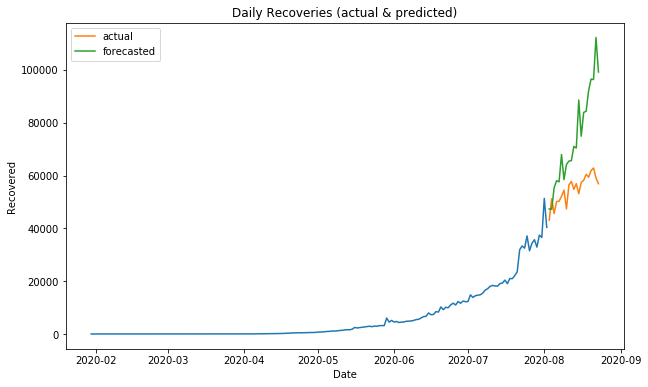

In [98]:
rcParams['figure.figsize'] = 10, 6
plt.plot(train_2)
plt.plot(test_2['Daily Recovered'],label ='actual')
plt.plot(test_2['forecast'],label ='forecasted')
plt.title('Daily Recoveries (actual & predicted)')
plt.xlabel('Date')
plt.ylabel('Recovered')
plt.legend(loc='best')
plt.show()

In [99]:
residuals_2 = test_2['Daily Recovered'] - test_2['forecast']

In [100]:
sqrt(mean_squared_error(test_2['Daily Recovered'],test_2['forecast']))

24091.736783977838

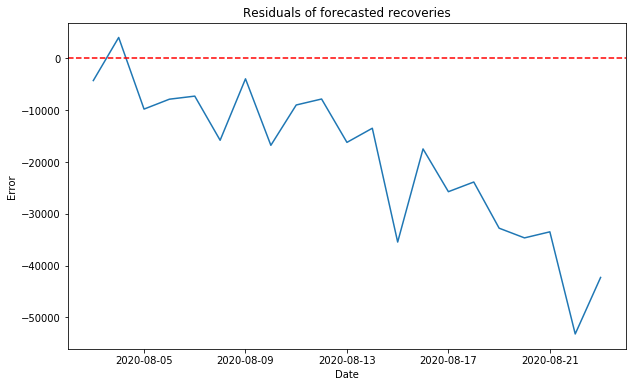

In [101]:
plt.plot(residuals_2)
plt.title('Residuals of forecasted recoveries')
plt.ylabel('Error')
plt.xlabel('Date')
plt.axhline(0, color='r', linestyle='--')

In [148]:
bestmodel_3 = sm.tsa.statespace.SARIMAX(df_rec,order=(1, 2, 1),seasonal_order=(1, 2, 1, 7))
results_3 = bestmodel_3.fit()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



In [149]:
results_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                
=========================================================================================
Dep. Variable:                   Daily Recovered   No. Observations:                  207
Model:             SARIMAX(1, 2, 1)x(1, 2, 1, 7)   Log Likelihood               -1750.296
Date:                           Mon, 24 Aug 2020   AIC                           3510.591
Time:                                   18:43:24   BIC                           3526.853
Sample:                               01-30-2020   HQIC                          3517.178
                                    - 08-23-2020                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5076      0.039    -13.127      0.000      -0.583      -0.432
ma.L1         -0.9996      1.306     -0.765      0.444      -3.560       1.561
ar.S.L7       -0.3088      0.027    -11.301      0.000      -0.362      -0.255
ma.S.L7       -0.9987      1.296     -0.771      0.441      -3.538       1.541
sigma2      4.652e+06    1.1e-07   4.24e+13      0.000    4.65e+06    4.65e+06
===================================================================================
Ljung-Box (Q):                      158.57   Jarque-Bera (JB):               785.56
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):          201767.57   Skew:                             0.12
Prob(H) (two-sided):                  0.00   Kurtosis:                        12.93
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 7.01e+29. Standard errors may be unstable.
"""

In [150]:
predict_3= results_3.get_prediction(start=int((df_rec.shape[0]) * 0.7), end=int((df_rec.shape[0]) * 1.1), alpha=0.1)

In [151]:
forecasted_results_3 = predict_3.conf_int(alpha=0.05)
forecasted_results_3['mean'] = predict_3.predicted_mean
forecasted_results_3.head()

lower Daily Recovered  upper Daily Recovered          mean
2020-06-22            6471.869276           15224.610105  10848.239690
2020-06-23            5409.527622           14159.944553   9784.736087
2020-06-24            5669.767361           14415.769461  10042.768411
2020-06-25            7122.882577           15868.027152  11495.454865
2020-06-26            7542.518502           16285.064239  11913.791371

In [152]:
fr_3 =forecasted_results_3.iloc[50:,:]

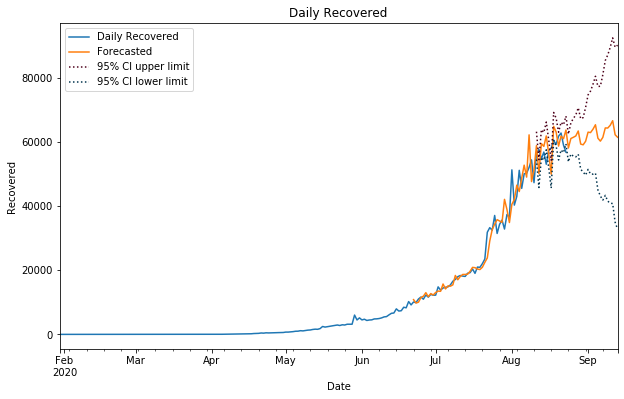

In [153]:
axis = df_rec.plot(label='Current Recovered', figsize=(10, 6))
forecasted_results_3['mean'].plot(ax=axis, label='Forecasted')
fr_3['upper Daily Recovered'].plot(ax=axis, label='95% CI upper limit',color=(0.3,0,0.1),linestyle='dotted')
fr_3['lower Daily Recovered'].plot(ax=axis, label='95% CI lower limit',color=(0.0,0.2,0.3),linestyle='dotted')
axis.set_xlabel('Date')
axis.set_ylabel('Recovered')
plt.title('Daily Recovered')
plt.legend(loc='best')
plt.show()

### Cumulative recoveries

In [109]:
df.tail(10)

Daily Confirmed  Total Confirmed  Daily Recovered  \
Date                                                            
2020-08-14            65609          2525236            56920   
2020-08-15            63986          2589222            53116   
2020-08-16            58108          2647330            57404   
2020-08-17            54288          2701618            58172   
2020-08-18            65022          2766640            60455   
2020-08-19            69196          2835836            59365   
2020-08-20            68507          2904343            61873   
2020-08-21            69039          2973382            62858   
2020-08-22            70068          3043450            59101   
2020-08-23            61749          3105199            56896   

            Total Recovered  Daily Deceased  Total Deceased  
Date                                                         
2020-08-14          1807447             990           49149  
2020-08-15          1860563             950           50099  
2020-08-16          1917967             961           51060  
2020-08-17          1976139             880           51940  
2020-08-18          2036594            1089           53029  
2020-08-19          2095959             980           54009  
2020-08-20          2157832             981           54990  
2020-08-21          2220690             953           55943  
2020-08-22          2279791             918           56861  
2020-08-23          2336687             846           57707

In [108]:
fr_3.head()

lower Daily Recovered  upper Daily Recovered          mean
2020-08-11           50583.315939           58054.037870  54318.676905
2020-08-12           49849.766686           57315.511518  53582.639102
2020-08-13           56506.433174           63971.502191  60238.967682
2020-08-14           54191.802767           61654.054251  57922.928509
2020-08-15           56490.234518           63951.124705  60220.679611

In [154]:
fr_3['cr'] = fr_3['mean']+1581531

for i in range(1,fr_3.shape[0]):
    fr_3.iloc[i,3] = fr_3.iloc[i-1,3] + fr_3.iloc[i,2]

In [155]:
fr_3['up_cr'] = fr_3['upper Daily Recovered']+1581531

for i in range(1,fr_3.shape[0]):
    fr_3.iloc[i,4] = fr_3.iloc[i-1,4] + fr_3.iloc[i,1]

In [156]:
fr_3['lw_cr'] = fr_3['lower Daily Recovered']+1581531

for i in range(1,fr_3.shape[0]):
    fr_3.iloc[i,5] = fr_3.iloc[i-1,5] + fr_3.iloc[i,0]

In [157]:
fr_3.tail()

lower Daily Recovered  upper Daily Recovered          mean  \
2020-09-09           41606.814106           87235.815653  64421.314879   
2020-09-10           40947.377076           89593.165487  65270.271282   
2020-09-11           40854.074300           92573.138341  66713.606321   
2020-09-12           35021.929098           89634.549498  62328.239298   
2020-09-13           32810.208123           90276.985243  61543.596683   

                      cr         up_cr         lw_cr  
2020-09-09  3.403651e+06  3.666291e+06  3.141012e+06  
2020-09-10  3.468922e+06  3.755884e+06  3.181960e+06  
2020-09-11  3.535635e+06  3.848457e+06  3.222814e+06  
2020-09-12  3.597963e+06  3.938091e+06  3.257836e+06  
2020-09-13  3.659507e+06  4.028368e+06  3.290646e+06

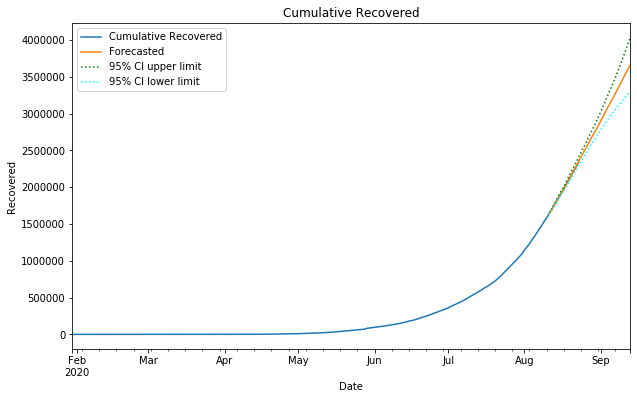

In [158]:
axis = df['Total Recovered'].plot(label='Cumulative Recovered', figsize=(10, 6))
fr_3['cr'].plot(ax=axis, label='Forecasted')
fr_3['up_cr'].plot(ax=axis, label='95% CI upper limit',color='green',linestyle='dotted')
fr_3['lw_cr'].plot(ax=axis, label='95% CI lower limit',color='cyan',linestyle='dotted')
axis.set_xlabel('Date')
axis.set_ylabel('Recovered')
plt.title('Cumulative Recovered')
plt.legend(loc='best')
plt.show()

### Daily Deceased

In [120]:
df_dec = pd.DataFrame()
df_dec['Daily Deceased'] =df_1['Daily Deceased']

In [121]:
df_dec.shape

(207, 1)

In [122]:
def Moving_avg_1(x):
    for i in range(6,174):
        sum = x.iloc[i-1,0] + x.iloc[i-2,0] + x.iloc[i,0] + x.iloc[i-3,0] + x.iloc[i-4,0] + x.iloc[i-5,0] + x.iloc[i-6,0]
        x.iloc[i,0] = sum/3

In [123]:
Moving_avg(df_dec)

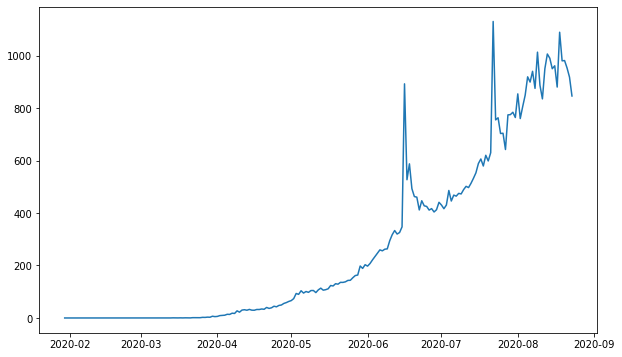

In [124]:
plt.plot(df_dec)

In [125]:
int(len(df_dec)*0.79)

163

In [349]:
df_dec.iloc[139,:]

Daily Deceased    503.544581
Name: 2020-06-16 00:00:00, dtype: float64

In [126]:
train_4 = df_dec[0:int(len(df_dec)*0.79)]
test_4 = df_dec[int(len(df_dec)*0.79):]

In [127]:
test_4.shape

(44, 1)

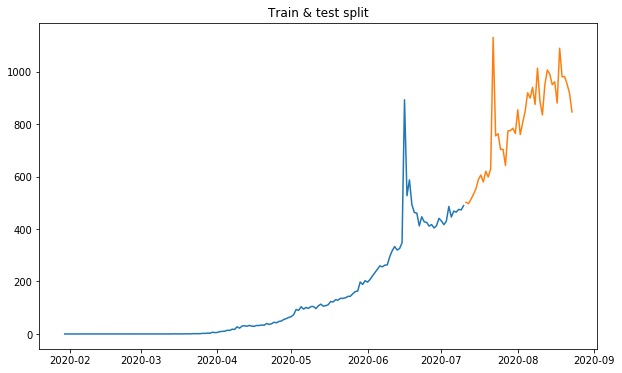

In [128]:
rcParams['figure.figsize'] = 10,6 
plt.plot(train_4)
plt.plot(test_4['Daily Deceased'])
plt.title('Train & test split')
plt.show()

In [129]:
best_aic = np.inf
best_pdq = None
best_seasonal_pdq = None
temp_model = None

In [130]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        
        try:
            temp_model = sm.tsa.statespace.SARIMAX(train_4,
                                             order = param,
                                             seasonal_order = param_seasonal)
            results = temp_model.fit()

            print(f'SARIMAX{param}x{param_seasonal} - AIC:{results.aic}')
            if results.aic < best_aic:
                best_aic = results.aic
                best_pdq = param
                best_seasonal_pdq = param_seasonal
        except:
            print("Unexpected error:", sys.exc_info()[0])
            continue
print(f'Best SARIMAX{best_pdq}x{best_seasonal_pdq} model - AIC:{best_aic}')

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 0, 0)x(0, 0, 0, 7) - AIC:2214.3080508437993
SARIMAX(0, 0, 0)x(0, 0, 1, 7) - AIC:2086.04607472735
SARIMAX(0, 0, 0)x(0, 0, 2, 7) - AIC:2029.166580692376
SARIMAX(0, 0, 0)x(0, 1, 0, 7) - AIC:1805.63526799141
SARIMAX(0, 0, 0)x(0, 1, 1, 7) - AIC:1802.085158216087


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 0, 0)x(0, 1, 2, 7) - AIC:1801.7166085311628
SARIMAX(0, 0, 0)x(0, 2, 0, 7) - AIC:1861.241663019539
SARIMAX(0, 0, 0)x(0, 2, 1, 7) - AIC:1743.9229018534822

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 0, 0)x(0, 2, 2, 7) - AIC:1736.2492586253888
SARIMAX(0, 0, 0)x(1, 0, 0, 7) - AIC:1904.8178515385866
SARIMAX(0, 0, 0)x(1, 0, 1, 7) - AIC:1902.3968164159392

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.




SARIMAX(0, 0, 0)x(1, 0, 2, 7) - AIC:1901.4147080282182
SARIMAX(0, 0, 0)x(1, 1, 0, 7) - AIC:1801.1767603566382


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 0, 0)x(1, 1, 1, 7) - AIC:1803.0791916558926


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 0, 0)x(1, 1, 2, 7) - AIC:1796.4584236026253
SARIMAX(0, 0, 0)x(1, 2, 0, 7) - AIC:1795.15733744237


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 0, 0)x(1, 2, 1, 7) - AIC:1734.457618504889


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 0, 0)x(1, 2, 2, 7) - AIC:1729.5657869301199
SARIMAX(0, 0, 0)x(2, 0, 0, 7) - AIC:1901.4890389703833

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.




SARIMAX(0, 0, 0)x(2, 0, 1, 7) - AIC:1903.3170571547994


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 0, 0)x(2, 0, 2, 7) - AIC:1895.5532916154107
SARIMAX(0, 0, 0)x(2, 1, 0, 7) - AIC:1802.9568713156166

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 0, 0)x(2, 1, 1, 7) - AIC:1799.1922798290198


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 0, 0)x(2, 1, 2, 7) - AIC:1795.8305445295564


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 0, 0)x(2, 2, 0, 7) - AIC:1759.6891465799413


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 0, 0)x(2, 2, 1, 7) - AIC:1734.3427669958132


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 0, 0)x(2, 2, 2, 7) - AIC:1731.5657866137517
SARIMAX(0, 0, 1)x(0, 0, 0, 7) - AIC:2065.9549008200283


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 0, 1)x(0, 0, 1, 7) - AIC:1996.267494409744


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 0, 1)x(0, 0, 2, 7) - AIC:1953.1485240576485
SARIMAX(0, 0, 1)x(0, 1, 0, 7) - AIC:1777.0341347166425


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 0, 1)x(0, 1, 1, 7) - AIC:1765.5233856054078


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 0, 1)x(0, 1, 2, 7) - AIC:1765.8231925616424
SARIMAX(0, 0, 1)x(0, 2, 0, 7) - AIC:1844.2693968522758


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 0, 1)x(0, 2, 1, 7) - AIC:1720.3071178503278


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 0, 1)x(0, 2, 2, 7) - AIC:1705.4367145434094


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 0, 1)x(1, 0, 0, 7) - AIC:1869.6996714891688


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 0, 1)x(1, 0, 1, 7) - AIC:1860.5801367318757


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 0, 1)x(1, 0, 2, 7) - AIC:1860.3595363205263
SARIMAX(0, 0, 1)x(1, 1, 0, 7) - AIC:1764.569560341903


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 0, 1)x(1, 1, 1, 7) - AIC:1766.409179864755


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 0, 1)x(1, 1, 2, 7) - AIC:1762.2793936868488
SARIMAX(0, 0, 1)x(1, 2, 0, 7) - AIC:1772.7583439550322

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 0, 1)x(1, 2, 1, 7) - AIC:1705.9593023258653


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 0, 1)x(1, 2, 2, 7) - AIC:1699.8081465947782
SARIMAX(0, 0, 1)x(2, 0, 0, 7) - AIC:1859.3051527230004


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 0, 1)x(2, 0, 1, 7) - AIC:1873.5601231058245


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 0, 1)x(2, 0, 2, 7) - AIC:1942.583444085354
SARIMAX(0, 0, 1)x(2, 1, 0, 7) - AIC:1766.3382162805979


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 0, 1)x(2, 1, 1, 7) - AIC:1768.2121993120018


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 0, 1)x(2, 1, 2, 7) - AIC:1761.9495187380548


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 0, 1)x(2, 2, 0, 7) - AIC:1734.5462344118728


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 0, 1)x(2, 2, 1, 7) - AIC:1707.0715793770898


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 0, 1)x(2, 2, 2, 7) - AIC:1701.3851482711837
SARIMAX(0, 0, 2)x(0, 0, 0, 7) - AIC:1970.169163617168


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 0, 2)x(0, 0, 1, 7) - AIC:1966.103853032816


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 0, 2)x(0, 0, 2, 7) - AIC:1930.1316961845646
SARIMAX(0, 0, 2)x(0, 1, 0, 7) - AIC:1751.5526501934344


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 0, 2)x(0, 1, 1, 7) - AIC:1730.0694215043823


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 0, 2)x(0, 1, 2, 7) - AIC:1731.1365487270123


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 0, 2)x(0, 2, 0, 7) - AIC:1813.3785645474118


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 0, 2)x(0, 2, 1, 7) - AIC:1699.2460842044416


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 0, 2)x(0, 2, 2, 7) - AIC:1675.6405067186038


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 0, 2)x(1, 0, 0, 7) - AIC:1859.1299485650748


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 0, 2)x(1, 0, 1, 7) - AIC:1829.3581337824949


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 0, 2)x(1, 0, 2, 7) - AIC:1820.2418418420348
SARIMAX(0, 0, 2)x(1, 1, 0, 7) - AIC:1731.5579231465156


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 0, 2)x(1, 1, 1, 7) - AIC:1731.4149243856446


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 0, 2)x(1, 1, 2, 7) - AIC:1728.2232263027454


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 0, 2)x(1, 2, 0, 7) - AIC:1761.1586013031156


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 0, 2)x(1, 2, 1, 7) - AIC:1679.2833772607564


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 0, 2)x(1, 2, 2, 7) - AIC:1677.4402499169082


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



Unexpected error: <class 'numpy.linalg.LinAlgError'>


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



Unexpected error: <class 'numpy.linalg.LinAlgError'>


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 0, 2)x(2, 0, 2, 7) - AIC:1820.5412820636557
SARIMAX(0, 0, 2)x(2, 1, 0, 7) - AIC:1730.9576552336457


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 0, 2)x(2, 1, 1, 7) - AIC:1735.264355074596


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 0, 2)x(2, 1, 2, 7) - AIC:1728.1379917410204


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 0, 2)x(2, 2, 0, 7) - AIC:1709.76200627929


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 0, 2)x(2, 2, 1, 7) - AIC:1677.6889111499272


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 0, 2)x(2, 2, 2, 7) - AIC:1671.9422283804242
SARIMAX(0, 1, 0)x(0, 0, 0, 7) - AIC:1750.7142173055308
SARIMAX(0, 1, 0)x(0, 0, 1, 7) - AIC:1752.4543088483247


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 1, 0)x(0, 0, 2, 7) - AIC:1754.2954069691145
SARIMAX(0, 1, 0)x(0, 1, 0, 7) - AIC:1781.8229016937682
SARIMAX(0, 1, 0)x(0, 1, 1, 7) - AIC:1696.319781645279


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 1, 0)x(0, 1, 2, 7) - AIC:1698.2901919843828
SARIMAX(0, 1, 0)x(0, 2, 0, 7) - AIC:1869.8412319896952


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 1, 0)x(0, 2, 1, 7) - AIC:1731.8298664306963


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 1, 0)x(0, 2, 2, 7) - AIC:1666.94574635064
SARIMAX(0, 1, 0)x(1, 0, 0, 7) - AIC:1752.4385812694482


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 1, 0)x(1, 0, 1, 7) - AIC:1754.2990424074435


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 1, 0)x(1, 0, 2, 7) - AIC:1756.0828443605315
SARIMAX(0, 1, 0)x(1, 1, 0, 7) - AIC:1742.3585123040734


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 1, 0)x(1, 1, 1, 7) - AIC:1698.2925360344277


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 1, 0)x(1, 1, 2, 7) - AIC:1699.9460925316694
SARIMAX(0, 1, 0)x(1, 2, 0, 7) - AIC:1785.9578526032865


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 1, 0)x(1, 2, 1, 7) - AIC:1699.3721741842407


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 1, 0)x(1, 2, 2, 7) - AIC:1667.4447846998564
SARIMAX(0, 1, 0)x(2, 0, 0, 7) - AIC:1754.3062584210393


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 1, 0)x(2, 0, 1, 7) - AIC:1756.0865642187182


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 1, 0)x(2, 0, 2, 7) - AIC:1758.1476831290545
SARIMAX(0, 1, 0)x(2, 1, 0, 7) - AIC:1731.4918166832526


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 1, 0)x(2, 1, 1, 7) - AIC:1700.1162665317456


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 1, 0)x(2, 1, 2, 7) - AIC:1701.9195876859026


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 1, 0)x(2, 2, 0, 7) - AIC:1739.1581494705156


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 1, 0)x(2, 2, 1, 7) - AIC:1692.2644395217512


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 1, 0)x(2, 2, 2, 7) - AIC:1669.2925448261342
SARIMAX(0, 1, 1)x(0, 0, 0, 7) - AIC:1711.1310605920944


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 1, 1)x(0, 0, 1, 7) - AIC:1713.0690735672033


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 1, 1)x(0, 0, 2, 7) - AIC:1714.8827004743432
SARIMAX(0, 1, 1)x(0, 1, 0, 7) - AIC:1747.408964852808


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 1, 1)x(0, 1, 1, 7) - AIC:1657.8593854240019


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 1, 1)x(0, 1, 2, 7) - AIC:1659.545421403694
SARIMAX(0, 1, 1)x(0, 2, 0, 7) - AIC:1838.169457242696


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 1, 1)x(0, 2, 1, 7) - AIC:1699.079576702769


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 1, 1)x(0, 2, 2, 7) - AIC:1628.5370957385014
SARIMAX(0, 1, 1)x(1, 0, 0, 7) - AIC:1713.0647615181047


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 1, 1)x(1, 0, 1, 7) - AIC:1714.4991969036


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 1, 1)x(1, 0, 2, 7) - AIC:1716.4395046867157
SARIMAX(0, 1, 1)x(1, 1, 0, 7) - AIC:1705.3788560184678


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 1, 1)x(1, 1, 1, 7) - AIC:1659.5784702885767


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 1, 1)x(1, 1, 2, 7) - AIC:1661.408742925545


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 1, 1)x(1, 2, 0, 7) - AIC:1752.0979299600942


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 1, 1)x(1, 2, 1, 7) - AIC:1664.3172035062005
SARIMAX(0, 1, 1)x(1, 2, 2, 7) - AIC:1631.8766946084727
SARIMAX(0, 1, 1)x(2, 0, 0, 7) - AIC:1714.8712034650941

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 1, 1)x(2, 0, 1, 7) - AIC:1716.4404844431788


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 1, 1)x(2, 0, 2, 7) - AIC:1718.2913385876063


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 1, 1)x(2, 1, 0, 7) - AIC:1692.301287689898


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 1, 1)x(2, 1, 1, 7) - AIC:1662.5870900921655


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 1, 1)x(2, 1, 2, 7) - AIC:1663.3668274269814


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 1, 1)x(2, 2, 0, 7) - AIC:1703.9113297722583


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 1, 1)x(2, 2, 1, 7) - AIC:1655.432029607889


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 1, 1)x(2, 2, 2, 7) - AIC:1632.3273222925122
SARIMAX(0, 1, 2)x(0, 0, 0, 7) - AIC:1712.4429147086482


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 1, 2)x(0, 0, 1, 7) - AIC:1714.3906700182024


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 1, 2)x(0, 0, 2, 7) - AIC:1716.215626164045
SARIMAX(0, 1, 2)x(0, 1, 0, 7) - AIC:1748.9831488684779


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 1, 2)x(0, 1, 1, 7) - AIC:1659.4819142474676


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 1, 2)x(0, 1, 2, 7) - AIC:1661.1731588284028
SARIMAX(0, 1, 2)x(0, 2, 0, 7) - AIC:1839.768954012819


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 1, 2)x(0, 2, 1, 7) - AIC:1700.660915848478


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 1, 2)x(0, 2, 2, 7) - AIC:1630.547594653587
SARIMAX(0, 1, 2)x(1, 0, 0, 7) - AIC:1714.3871553918482


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 1, 2)x(1, 0, 1, 7) - AIC:1715.9192079261259


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 1, 2)x(1, 0, 2, 7) - AIC:1717.8698263855981


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 1, 2)x(1, 1, 0, 7) - AIC:1706.948695546379


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 1, 2)x(1, 1, 1, 7) - AIC:1662.214449529019


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 1, 2)x(1, 1, 2, 7) - AIC:1663.0316521298514
SARIMAX(0, 1, 2)x(1, 2, 0, 7) - AIC:1753.5133996947093


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 1, 2)x(1, 2, 1, 7) - AIC:1665.8916704439716
SARIMAX(0, 1, 2)x(1, 2, 2, 7) - AIC:1704.6398542269574


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 1, 2)x(2, 0, 0, 7) - AIC:1716.207190513748


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 1, 2)x(2, 0, 1, 7) - AIC:1717.870272592339


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 1, 2)x(2, 0, 2, 7) - AIC:1719.7187330963516


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 1, 2)x(2, 1, 0, 7) - AIC:1694.0492783958143


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 1, 2)x(2, 1, 1, 7) - AIC:1664.1850384947797


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 1, 2)x(2, 1, 2, 7) - AIC:1664.9925366822647


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 1, 2)x(2, 2, 0, 7) - AIC:1705.654936876003


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 1, 2)x(2, 2, 1, 7) - AIC:1657.161671068704


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 1, 2)x(2, 2, 2, 7) - AIC:1634.0486698437721
SARIMAX(0, 2, 0)x(0, 0, 0, 7) - AIC:1914.3759028962131
SARIMAX(0, 2, 0)x(0, 0, 1, 7) - AIC:1915.927737129179


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 2, 0)x(0, 0, 2, 7) - AIC:1917.78657288826
SARIMAX(0, 2, 0)x(0, 1, 0, 7) - AIC:1935.1346002450448
SARIMAX(0, 2, 0)x(0, 1, 1, 7) - AIC:1852.3855158450406

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 2, 0)x(0, 1, 2, 7) - AIC:1854.3847200054984
SARIMAX(0, 2, 0)x(0, 2, 0, 7) - AIC:2013.7215716799697


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 2, 0)x(0, 2, 1, 7) - AIC:1877.3440980746914


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 2, 0)x(0, 2, 2, 7) - AIC:1813.687289870109
SARIMAX(0, 2, 0)x(1, 0, 0, 7) - AIC:1915.903508520546


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 2, 0)x(1, 0, 1, 7) - AIC:1917.9576631869197


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 2, 0)x(1, 0, 2, 7) - AIC:1919.4157191756003
SARIMAX(0, 2, 0)x(1, 1, 0, 7) - AIC:1897.6332496802452


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 2, 0)x(1, 1, 1, 7) - AIC:1854.9731837661507


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 2, 0)x(1, 1, 2, 7) - AIC:1856.0156569848682
SARIMAX(0, 2, 0)x(1, 2, 0, 7) - AIC:1931.5747805213623

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 2, 0)x(1, 2, 1, 7) - AIC:1846.611019943778


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 2, 0)x(1, 2, 2, 7) - AIC:1815.5956556350823
SARIMAX(0, 2, 0)x(2, 0, 0, 7) - AIC:1917.8115121060353


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 2, 0)x(2, 0, 1, 7) - AIC:1919.4434443447053


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 2, 0)x(2, 0, 2, 7) - AIC:1921.3584164280328


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 2, 0)x(2, 1, 0, 7) - AIC:1887.6076839207713


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 2, 0)x(2, 1, 1, 7) - AIC:1856.213976378846


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 2, 0)x(2, 1, 2, 7) - AIC:1858.03983106989


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 2, 0)x(2, 2, 0, 7) - AIC:1886.1374993353138


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 2, 0)x(2, 2, 1, 7) - AIC:1840.1790241525973


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 2, 0)x(2, 2, 2, 7) - AIC:1818.2839177772498
SARIMAX(0, 2, 1)x(0, 0, 0, 7) - AIC:1747.4921410093384


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 2, 1)x(0, 0, 1, 7) - AIC:1749.1887342038917
SARIMAX(0, 2, 1)x(0, 0, 2, 7) - AIC:1750.9979591256201
SARIMAX(0, 2, 1)x(0, 1, 0, 7) - AIC:1778.3659258012333


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 2, 1)x(0, 1, 1, 7) - AIC:1696.766540006713


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 2, 1)x(0, 1, 2, 7) - AIC:1698.7270416703384
SARIMAX(0, 2, 1)x(0, 2, 0, 7) - AIC:1865.1155862623127


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 2, 1)x(0, 2, 1, 7) - AIC:1731.8916848346082


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 2, 1)x(0, 2, 2, 7) - AIC:1668.8584823056171
SARIMAX(0, 2, 1)x(1, 0, 0, 7) - AIC:1749.1722443033407


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 2, 1)x(1, 0, 1, 7) - AIC:1750.8791861763043


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 2, 1)x(1, 0, 2, 7) - AIC:1752.7914708368346


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 2, 1)x(1, 1, 0, 7) - AIC:1739.9160478101217


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 2, 1)x(1, 1, 1, 7) - AIC:1698.7312651982352


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 2, 1)x(1, 1, 2, 7) - AIC:1700.372590114048


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 2, 1)x(1, 2, 0, 7) - AIC:1782.7570512486843


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 2, 1)x(1, 2, 1, 7) - AIC:1700.3288608975772


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 2, 1)x(1, 2, 2, 7) - AIC:1670.8047987129144


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 2, 1)x(2, 0, 0, 7) - AIC:1751.0054356604805


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 2, 1)x(2, 0, 1, 7) - AIC:1752.7913428819938


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 2, 1)x(2, 0, 2, 7) - AIC:1754.714566574956
SARIMAX(0, 2, 1)x(2, 1, 0, 7) - AIC:1729.6018955811137


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 2, 1)x(2, 1, 1, 7) - AIC:1700.52955869803


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 2, 1)x(2, 1, 2, 7) - AIC:1702.4893910626251


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 2, 1)x(2, 2, 0, 7) - AIC:1737.1499974761236


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 2, 1)x(2, 2, 1, 7) - AIC:1693.6658209353222


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 2, 1)x(2, 2, 2, 7) - AIC:2854.268858680949
SARIMAX(0, 2, 2)x(0, 0, 0, 7) - AIC:1707.1304259913236


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 2, 2)x(0, 0, 1, 7) - AIC:1709.1288779886722


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 2, 2)x(0, 0, 2, 7) - AIC:1711.216137394183


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 2, 2)x(0, 1, 0, 7) - AIC:1745.4817110587906


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 2, 2)x(0, 1, 1, 7) - AIC:1658.9055944187985


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 2, 2)x(0, 1, 2, 7) - AIC:1660.6325005390236


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 2, 2)x(0, 2, 0, 7) - AIC:1834.8932859620463


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 2, 2)x(0, 2, 1, 7) - AIC:1700.5936085378798


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 2, 2)x(0, 2, 2, 7) - AIC:1633.4547109873085


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 2, 2)x(1, 0, 0, 7) - AIC:1709.1288144768632


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 2, 2)x(1, 0, 1, 7) - AIC:1711.0008594648357


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 2, 2)x(1, 0, 2, 7) - AIC:1713.0875945021578


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 2, 2)x(1, 1, 0, 7) - AIC:1704.567436614451


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 2, 2)x(1, 1, 1, 7) - AIC:1660.6667949650641


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 2, 2)x(1, 1, 2, 7) - AIC:1662.4451907497064


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 2, 2)x(1, 2, 0, 7) - AIC:1750.3591444489064


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 2, 2)x(1, 2, 1, 7) - AIC:1666.7887855986264


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 2, 2)x(1, 2, 2, 7) - AIC:1635.448405307618
SARIMAX(0, 2, 2)x(2, 0, 0, 7) - AIC:1711.2131549461951


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 2, 2)x(2, 0, 1, 7) - AIC:1713.091937051847


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 2, 2)x(2, 0, 2, 7) - AIC:1714.932066776932


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 2, 2)x(2, 1, 0, 7) - AIC:1692.205234637313


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 2, 2)x(2, 1, 1, 7) - AIC:1662.422342622689


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 2, 2)x(2, 1, 2, 7) - AIC:1664.5090258131677


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 2, 2)x(2, 2, 0, 7) - AIC:1703.477041779686


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 2, 2)x(2, 2, 1, 7) - AIC:1658.3782570192157


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(0, 2, 2)x(2, 2, 2, 7) - AIC:1751.522795197643
SARIMAX(1, 0, 0)x(0, 0, 0, 7) - AIC:1765.1365749010786
SARIMAX(1, 0, 0)x(0, 0, 1, 7) - AIC:1766.6909002215934


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 0, 0)x(0, 0, 2, 7) - AIC:1768.3690909191382
SARIMAX(1, 0, 0)x(0, 1, 0, 7) - AIC:1754.1657320111713


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 0, 0)x(0, 1, 1, 7) - AIC:1704.8227577875832


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 0, 0)x(0, 1, 2, 7) - AIC:1706.7485773677838
SARIMAX(1, 0, 0)x(0, 2, 0, 7) - AIC:1833.4200632783757


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 0, 0)x(0, 2, 1, 7) - AIC:1702.436595008448


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 0, 0)x(0, 2, 2, 7) - AIC:1667.6200163862527
SARIMAX(1, 0, 0)x(1, 0, 0, 7) - AIC:1766.6503723074288


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 0, 0)x(1, 0, 1, 7) - AIC:1768.0161658575748


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 0, 0)x(1, 0, 2, 7) - AIC:1770.0085194855383
SARIMAX(1, 0, 0)x(1, 1, 0, 7) - AIC:1726.0597851200987


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 0, 0)x(1, 1, 1, 7) - AIC:1706.756224839035


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 0, 0)x(1, 1, 2, 7) - AIC:1708.3841607057038
SARIMAX(1, 0, 0)x(1, 2, 0, 7) - AIC:1756.3114598360382


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 0, 0)x(1, 2, 1, 7) - AIC:1678.5303197607277


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 0, 0)x(1, 2, 2, 7) - AIC:1669.611232313685


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 0, 0)x(2, 0, 0, 7) - AIC:1768.359406374926


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 0, 0)x(2, 0, 1, 7) - AIC:1770.008429470378


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 0, 0)x(2, 0, 2, 7) - AIC:1771.8316021348664


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 0, 0)x(2, 1, 0, 7) - AIC:1720.8125800451119


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 0, 0)x(2, 1, 1, 7) - AIC:1708.4793184522691


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 0, 0)x(2, 1, 2, 7) - AIC:1712.8600643973418
SARIMAX(1, 0, 0)x(2, 2, 0, 7) - AIC:1713.1130246697226


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 0, 0)x(2, 2, 1, 7) - AIC:1675.1950100980412


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 0, 0)x(2, 2, 2, 7) - AIC:1665.654851971844
SARIMAX(1, 0, 1)x(0, 0, 0, 7) - AIC:1727.2909270150435


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 0, 1)x(0, 0, 1, 7) - AIC:1729.219461749459


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 0, 1)x(0, 0, 2, 7) - AIC:1731.0194397817463
SARIMAX(1, 0, 1)x(0, 1, 0, 7) - AIC:1746.2583315148531


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 0, 1)x(0, 1, 1, 7) - AIC:1668.813934566157


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 0, 1)x(0, 1, 2, 7) - AIC:1670.5089488913
SARIMAX(1, 0, 1)x(0, 2, 0, 7) - AIC:1830.9395730103624


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 0, 1)x(0, 2, 1, 7) - AIC:1696.2490314907823


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 0, 1)x(0, 2, 2, 7) - AIC:1636.8098014858133
SARIMAX(1, 0, 1)x(1, 0, 0, 7) - AIC:1729.2142822862043


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 0, 1)x(1, 0, 1, 7) - AIC:1730.7524914801813


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 0, 1)x(1, 0, 2, 7) - AIC:1732.687096482152


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 0, 1)x(1, 1, 0, 7) - AIC:1710.0754892509526


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 0, 1)x(1, 1, 1, 7) - AIC:1670.5401656405916


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 0, 1)x(1, 1, 2, 7) - AIC:1672.7222239122311
SARIMAX(1, 0, 1)x(1, 2, 0, 7) - AIC:1750.4375953777933


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 0, 1)x(1, 2, 1, 7) - AIC:1666.186126433152


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 0, 1)x(1, 2, 2, 7) - AIC:1638.4138639803932
SARIMAX(1, 0, 1)x(2, 0, 0, 7) - AIC:1731.0055727758104


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 0, 1)x(2, 0, 1, 7) - AIC:1732.688201910183


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 0, 1)x(2, 0, 2, 7) - AIC:1734.688388379292


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 0, 1)x(2, 1, 0, 7) - AIC:1699.270550336342


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 0, 1)x(2, 1, 1, 7) - AIC:1672.275783279486


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 0, 1)x(2, 1, 2, 7) - AIC:1675.1809511618794
SARIMAX(1, 0, 1)x(2, 2, 0, 7) - AIC:1704.0965290053327


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 0, 1)x(2, 2, 1, 7) - AIC:1659.1388139092126


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 0, 1)x(2, 2, 2, 7) - AIC:1639.819928373909


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 0, 2)x(0, 0, 0, 7) - AIC:1728.550274845943


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 0, 2)x(0, 0, 1, 7) - AIC:1730.4863955685294


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 0, 2)x(0, 0, 2, 7) - AIC:1732.2942153388335


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 0, 2)x(0, 1, 0, 7) - AIC:1745.5004853730793


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 0, 2)x(0, 1, 1, 7) - AIC:1670.4180171853238


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 0, 2)x(0, 1, 2, 7) - AIC:1672.110688836167


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 0, 2)x(0, 2, 0, 7) - AIC:1830.1338588157446


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 0, 2)x(0, 2, 1, 7) - AIC:1695.5825770139515


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 0, 2)x(0, 2, 2, 7) - AIC:1638.0173909354976
SARIMAX(1, 0, 2)x(1, 0, 0, 7) - AIC:1730.481860893824


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 0, 2)x(1, 0, 1, 7) - AIC:1732.087877919801


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 0, 2)x(1, 0, 2, 7) - AIC:1734.0382502034613
SARIMAX(1, 0, 2)x(1, 1, 0, 7) - AIC:1710.066272941654


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 0, 2)x(1, 1, 1, 7) - AIC:1672.1602157223288


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 0, 2)x(1, 1, 2, 7) - AIC:1674.759773514837
SARIMAX(1, 0, 2)x(1, 2, 0, 7) - AIC:1749.1984208558872


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 0, 2)x(1, 2, 1, 7) - AIC:1666.076790355658


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 0, 2)x(1, 2, 2, 7) - AIC:1640.5784622969945


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 0, 2)x(2, 0, 0, 7) - AIC:1732.2833692616346


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 0, 2)x(2, 0, 1, 7) - AIC:1734.03416086484


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 0, 2)x(2, 0, 2, 7) - AIC:1736.0309063855284
SARIMAX(1, 0, 2)x(2, 1, 0, 7) - AIC:1700.2283439036078


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 0, 2)x(2, 1, 1, 7) - AIC:1675.0627573028037


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 0, 2)x(2, 1, 2, 7) - AIC:1676.8092815170635


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 0, 2)x(2, 2, 0, 7) - AIC:1703.3525223976287


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 0, 2)x(2, 2, 1, 7) - AIC:1665.3249642210706


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX(1, 0, 2)x(2, 2, 2, 7) - AIC:1641.4958504310812
SARIMAX(1, 1, 0)x(0, 0, 0, 7) - AIC:1712.73168896849


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 1, 0)x(0, 0, 1, 7) - AIC:1714.6815480021928


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 1, 0)x(0, 0, 2, 7) - AIC:1716.4705762051653
SARIMAX(1, 1, 0)x(0, 1, 0, 7) - AIC:1749.2454370193227


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 1, 0)x(0, 1, 1, 7) - AIC:1659.974040800849


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 1, 0)x(0, 1, 2, 7) - AIC:1661.6662866583592
SARIMAX(1, 1, 0)x(0, 2, 0, 7) - AIC:1840.1474119912862

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.




SARIMAX(1, 1, 0)x(0, 2, 1, 7) - AIC:1700.8233227419933


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 1, 0)x(0, 2, 2, 7) - AIC:1630.6309229224835
SARIMAX(1, 1, 0)x(1, 0, 0, 7) - AIC:1714.6778703993753


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 1, 0)x(1, 0, 1, 7) - AIC:1716.3060939915197


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 1, 0)x(1, 0, 2, 7) - AIC:1718.266786868789
SARIMAX(1, 1, 0)x(1, 1, 0, 7) - AIC:1706.7932232661087


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 1, 0)x(1, 1, 1, 7) - AIC:1661.6948272333227


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 1, 0)x(1, 1, 2, 7) - AIC:1663.5856389242867


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 1, 0)x(1, 2, 0, 7) - AIC:1753.881297065943


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 1, 0)x(1, 2, 1, 7) - AIC:1665.6704444657403


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 1, 0)x(1, 2, 2, 7) - AIC:1633.7435692864155


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 1, 0)x(2, 0, 0, 7) - AIC:1716.4630173931287


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 1, 0)x(2, 0, 1, 7) - AIC:1718.2663463962178


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 1, 0)x(2, 0, 2, 7) - AIC:1720.1606602645734


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 1, 0)x(2, 1, 0, 7) - AIC:1694.068054305712


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 1, 0)x(2, 1, 1, 7) - AIC:1664.7627533053615


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 1, 0)x(2, 1, 2, 7) - AIC:1665.5368460294044


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 1, 0)x(2, 2, 0, 7) - AIC:1705.2063391618256


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 1, 0)x(2, 2, 1, 7) - AIC:1657.04257875546


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 1, 0)x(2, 2, 2, 7) - AIC:1634.5141744059736


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 1, 1)x(0, 0, 0, 7) - AIC:1712.0352279572076
SARIMAX(1, 1, 1)x(0, 0, 1, 7) - AIC:1713.9875010494288


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 1, 1)x(0, 0, 2, 7) - AIC:1715.806078772196
SARIMAX(1, 1, 1)x(0, 1, 0, 7) - AIC:1748.722200887827


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 1, 1)x(0, 1, 1, 7) - AIC:1659.1811837629853


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 1, 1)x(0, 1, 2, 7) - AIC:1660.8707460978203


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 1, 1)x(0, 2, 0, 7) - AIC:1839.584664704998
SARIMAX(1, 1, 1)x(0, 2, 1, 7) - AIC:1700.4116491172829


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 1, 1)x(0, 2, 2, 7) - AIC:1629.9792645946418


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 1, 1)x(1, 0, 0, 7) - AIC:1713.9842350087788


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 1, 1)x(1, 0, 1, 7) - AIC:1715.5392007551463


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 1, 1)x(1, 0, 2, 7) - AIC:1717.489797958694


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 1, 1)x(1, 1, 0, 7) - AIC:1706.5478589797624


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 1, 1)x(1, 1, 1, 7) - AIC:1660.9020154386062


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 1, 1)x(1, 1, 2, 7) - AIC:1662.7370714648573


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 1, 1)x(1, 2, 0, 7) - AIC:1752.111551858329


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 1, 1)x(1, 2, 1, 7) - AIC:1665.5128913846925
SARIMAX(1, 1, 1)x(1, 2, 2, 7) - AIC:1631.9513796906717


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 1, 1)x(2, 0, 0, 7) - AIC:1715.7978445023602


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 1, 1)x(2, 0, 1, 7) - AIC:1717.4900488799187


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 1, 1)x(2, 0, 2, 7) - AIC:1719.346264818866


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 1, 1)x(2, 1, 0, 7) - AIC:1693.7468084207485


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 1, 1)x(2, 1, 1, 7) - AIC:1662.6515637572556


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 1, 1)x(2, 1, 2, 7) - AIC:1664.6967703574664


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 1, 1)x(2, 2, 0, 7) - AIC:1709.9794070859946
SARIMAX(1, 1, 1)x(2, 2, 1, 7) - AIC:1656.8525253039802


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 1, 1)x(2, 2, 2, 7) - AIC:1634.2440436098632
SARIMAX(1, 1, 2)x(0, 0, 0, 7) - AIC:1713.350833880739


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 1, 2)x(0, 0, 1, 7) - AIC:1715.3001111523208


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 1, 2)x(0, 0, 2, 7) - AIC:1717.1253368770597


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 1, 2)x(0, 1, 0, 7) - AIC:1746.858600894555


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 1, 2)x(0, 1, 1, 7) - AIC:1660.9960313058068
SARIMAX(1, 1, 2)x(0, 1, 2, 7) - AIC:1662.8606275797533


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 1, 2)x(0, 2, 0, 7) - AIC:1835.0549653940227


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 1, 2)x(0, 2, 1, 7) - AIC:1699.023442018939


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 1, 2)x(0, 2, 2, 7) - AIC:1632.5419277324127


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 1, 2)x(1, 0, 0, 7) - AIC:1715.2966711229537


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 1, 2)x(1, 0, 1, 7) - AIC:1716.7871751526302


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 1, 2)x(1, 0, 2, 7) - AIC:1718.725431504135


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 1, 2)x(1, 1, 0, 7) - AIC:1707.9175007292595


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 1, 2)x(1, 1, 1, 7) - AIC:1662.8815414120545


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 1, 2)x(1, 1, 2, 7) - AIC:1664.896993535492
SARIMAX(1, 1, 2)x(1, 2, 0, 7) - AIC:1756.082826354727


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 1, 2)x(1, 2, 1, 7) - AIC:1663.0412594506095
SARIMAX(1, 1, 2)x(1, 2, 2, 7) - AIC:1703.1221838834895


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 1, 2)x(2, 0, 0, 7) - AIC:1717.1147140580124


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 1, 2)x(2, 0, 1, 7) - AIC:1718.7264526181402


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 1, 2)x(2, 0, 2, 7) - AIC:1720.6273189260519
SARIMAX(1, 1, 2)x(2, 1, 0, 7) - AIC:1694.845233221156


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 1, 2)x(2, 1, 1, 7) - AIC:1665.874733309944


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 1, 2)x(2, 1, 2, 7) - AIC:1666.8529240193175


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 1, 2)x(2, 2, 0, 7) - AIC:1700.1999395223143


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 1, 2)x(2, 2, 1, 7) - AIC:1656.2410366128984


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 1, 2)x(2, 2, 2, 7) - AIC:1635.1403917335024
SARIMAX(1, 2, 0)x(0, 0, 0, 7) - AIC:1804.9867594246302
SARIMAX(1, 2, 0)x(0, 0, 1, 7) - AIC:1806.8984740955343


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 2, 0)x(0, 0, 2, 7) - AIC:1808.665102793153
SARIMAX(1, 2, 0)x(0, 1, 0, 7) - AIC:1835.473485484004


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 2, 0)x(0, 1, 1, 7) - AIC:1747.672282726683


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 2, 0)x(0, 1, 2, 7) - AIC:1749.3456418072196
SARIMAX(1, 2, 0)x(0, 2, 0, 7) - AIC:1920.77266709267


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 2, 0)x(0, 2, 1, 7) - AIC:1782.4839265031592


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 2, 0)x(0, 2, 2, 7) - AIC:1713.4033225764683
SARIMAX(1, 2, 0)x(1, 0, 0, 7) - AIC:1806.891669476323


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 2, 0)x(1, 0, 1, 7) - AIC:1808.5193017976462


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 2, 0)x(1, 0, 2, 7) - AIC:1810.4834149593576
SARIMAX(1, 2, 0)x(1, 1, 0, 7) - AIC:1793.5502225146686


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 2, 0)x(1, 1, 1, 7) - AIC:1749.3794057271111


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 2, 0)x(1, 1, 2, 7) - AIC:1752.883471364174


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 2, 0)x(1, 2, 0, 7) - AIC:1836.5584382905847


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 2, 0)x(1, 2, 1, 7) - AIC:1747.7544772952156


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 2, 0)x(1, 2, 2, 7) - AIC:1715.4006469398294


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 2, 0)x(2, 0, 0, 7) - AIC:1808.6513188645365


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 2, 0)x(2, 0, 1, 7) - AIC:1810.4826790669879


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 2, 0)x(2, 0, 2, 7) - AIC:1812.4812420623375


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 2, 0)x(2, 1, 0, 7) - AIC:1779.8653219506668


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 2, 0)x(2, 1, 1, 7) - AIC:1751.1035639409452


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 2, 0)x(2, 1, 2, 7) - AIC:1754.8337697738207


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 2, 0)x(2, 2, 0, 7) - AIC:1785.3840084119893


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 2, 0)x(2, 2, 1, 7) - AIC:1738.2774712706505


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 2, 0)x(2, 2, 2, 7) - AIC:1717.6025591237676


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 2, 1)x(0, 0, 0, 7) - AIC:1709.6254224855315


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 2, 1)x(0, 0, 1, 7) - AIC:1711.5855589229666


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 2, 1)x(0, 0, 2, 7) - AIC:1713.3967344606108


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 2, 1)x(0, 1, 0, 7) - AIC:1746.7215733277862


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 2, 1)x(0, 1, 1, 7) - AIC:1661.0186812706381


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 2, 1)x(0, 1, 2, 7) - AIC:1662.7131546793482


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 2, 1)x(0, 2, 0, 7) - AIC:1836.2864773075466


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 2, 1)x(0, 2, 1, 7) - AIC:1701.737304771876


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 2, 1)x(0, 2, 2, 7) - AIC:1634.859899429518


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 2, 1)x(1, 0, 0, 7) - AIC:1711.5833731516636


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 2, 1)x(1, 0, 1, 7) - AIC:1713.2780612553856


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 2, 1)x(1, 0, 2, 7) - AIC:1715.3971670845203


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 2, 1)x(1, 1, 0, 7) - AIC:1705.345273871379


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 2, 1)x(1, 1, 1, 7) - AIC:1662.7424972800072


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 2, 1)x(1, 1, 2, 7) - AIC:1664.6129076308955


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 2, 1)x(1, 2, 0, 7) - AIC:1751.553301178196


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 2, 1)x(1, 2, 1, 7) - AIC:1667.5090376908154


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 2, 1)x(1, 2, 2, 7) - AIC:1636.8747385680533


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 2, 1)x(2, 0, 0, 7) - AIC:1713.3907438976821


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 2, 1)x(2, 0, 1, 7) - AIC:1715.3927572695889


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 2, 1)x(2, 0, 2, 7) - AIC:1717.1195508520216


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 2, 1)x(2, 1, 0, 7) - AIC:1693.2400964783596


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 2, 1)x(2, 1, 1, 7) - AIC:1664.5263050687172


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 2, 1)x(2, 1, 2, 7) - AIC:1666.6418398320725


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 2, 1)x(2, 2, 0, 7) - AIC:1704.0913579226249


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 2, 1)x(2, 2, 1, 7) - AIC:1659.3614461857023


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 2, 1)x(2, 2, 2, 7) - AIC:2454.934466420194
SARIMAX(1, 2, 2)x(0, 0, 0, 7) - AIC:1708.546776037491

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 2, 2)x(0, 0, 1, 7) - AIC:1710.53229843173


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 2, 2)x(0, 0, 2, 7) - AIC:1712.4179692396178


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 2, 2)x(0, 1, 0, 7) - AIC:1746.5908518871256


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 2, 2)x(0, 1, 1, 7) - AIC:1660.2929069650638
SARIMAX(1, 2, 2)x(0, 1, 2, 7) - AIC:1662.014131652487


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 2, 2)x(0, 2, 0, 7) - AIC:1836.113041040328


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 2, 2)x(0, 2, 1, 7) - AIC:1703.7258711311067


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 2, 2)x(0, 2, 2, 7) - AIC:1634.678605588176


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 2, 2)x(1, 0, 0, 7) - AIC:1710.5314136928368


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 2, 2)x(1, 0, 1, 7) - AIC:1712.3397106073357


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 2, 2)x(1, 0, 2, 7) - AIC:1714.3168633880068


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 2, 2)x(1, 1, 0, 7) - AIC:1705.486772147558


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 2, 2)x(1, 1, 1, 7) - AIC:1662.0492836034787


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 2, 2)x(1, 1, 2, 7) - AIC:1663.8381375788413


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 2, 2)x(1, 2, 0, 7) - AIC:1751.2940431862703


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 2, 2)x(1, 2, 1, 7) - AIC:1667.7393016029723


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 2, 2)x(1, 2, 2, 7) - AIC:1652.1621142907027
SARIMAX(1, 2, 2)x(2, 0, 0, 7) - AIC:1712.415605836726


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 2, 2)x(2, 0, 1, 7) - AIC:1714.3170928654947


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 2, 2)x(2, 0, 2, 7) - AIC:1716.3390838689754
SARIMAX(1, 2, 2)x(2, 1, 0, 7) - AIC:1693.397603802492


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 2, 2)x(2, 1, 1, 7) - AIC:1663.8160530246255


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 2, 2)x(2, 1, 2, 7) - AIC:1665.813298620557


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 2, 2)x(2, 2, 0, 7) - AIC:1704.600112700337


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(1, 2, 2)x(2, 2, 1, 7) - AIC:1660.3179953578929


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX(1, 2, 2)x(2, 2, 2, 7) - AIC:1671.3911985474483
SARIMAX(2, 0, 0)x(0, 0, 0, 7) - AIC:1728.5670938274043


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 0, 0)x(0, 0, 1, 7) - AIC:1730.4946275350699


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 0, 0)x(0, 0, 2, 7) - AIC:1732.2426759960542
SARIMAX(2, 0, 0)x(0, 1, 0, 7) - AIC:1743.265883414591


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 0, 0)x(0, 1, 1, 7) - AIC:1670.6938936147694


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 0, 0)x(0, 1, 2, 7) - AIC:1672.3285540011827
SARIMAX(2, 0, 0)x(0, 2, 0, 7) - AIC:1828.4418283640557


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 0, 0)x(0, 2, 1, 7) - AIC:1693.398867982406


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 0, 0)x(0, 2, 2, 7) - AIC:1636.4542954824587


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 0, 0)x(1, 0, 0, 7) - AIC:1730.488739192892


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 0, 0)x(1, 0, 1, 7) - AIC:1732.058737460822


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 0, 0)x(1, 0, 2, 7) - AIC:1734.0025766206177


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 0, 0)x(1, 1, 0, 7) - AIC:1707.3936303559208


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 0, 0)x(1, 1, 1, 7) - AIC:1672.366062703557


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 0, 0)x(1, 1, 2, 7) - AIC:1674.3719925061707
SARIMAX(2, 0, 0)x(1, 2, 0, 7) - AIC:1747.4128427028872


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 0, 0)x(1, 2, 1, 7) - AIC:1663.404086863417


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 0, 0)x(1, 2, 2, 7) - AIC:1640.211509217575
SARIMAX(2, 0, 0)x(2, 0, 0, 7) - AIC:1732.2290744266288


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 0, 0)x(2, 0, 1, 7) - AIC:1734.0023877584915


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 0, 0)x(2, 0, 2, 7) - AIC:1735.9131726407109
SARIMAX(2, 0, 0)x(2, 1, 0, 7) - AIC:1697.496517007629


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 0, 0)x(2, 1, 1, 7) - AIC:1674.2412385550574
SARIMAX(2, 0, 0)x(2, 1, 2, 7) - AIC:1677.5299902374754


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 0, 0)x(2, 2, 0, 7) - AIC:1700.583299638381


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 0, 0)x(2, 2, 1, 7) - AIC:1656.908496383744


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



Unexpected error: <class 'numpy.linalg.LinAlgError'>
SARIMAX(2, 0, 1)x(0, 0, 0, 7) - AIC:1728.1175281911735

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 0, 1)x(0, 0, 1, 7) - AIC:1730.0579504726002


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 0, 1)x(0, 0, 2, 7) - AIC:1731.8559586214742
SARIMAX(2, 0, 1)x(0, 1, 0, 7) - AIC:1745.23014504325

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.




SARIMAX(2, 0, 1)x(0, 1, 1, 7) - AIC:1670.103593010803


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 0, 1)x(0, 1, 2, 7) - AIC:1671.7878397048753


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 0, 1)x(0, 2, 0, 7) - AIC:1825.0401305938317


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 0, 1)x(0, 2, 1, 7) - AIC:1705.7190340495458


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 0, 1)x(0, 2, 2, 7) - AIC:1638.2571985377565


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 0, 1)x(1, 0, 0, 7) - AIC:1730.0536164909338


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 0, 1)x(1, 0, 1, 7) - AIC:1731.6651949033335


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 0, 1)x(1, 0, 2, 7) - AIC:1733.6088599334648
SARIMAX(2, 0, 1)x(1, 1, 0, 7) - AIC:1709.2972455258996


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 0, 1)x(1, 1, 1, 7) - AIC:1671.8196630354587


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 0, 1)x(1, 1, 2, 7) - AIC:1674.1149119866855
SARIMAX(2, 0, 1)x(1, 2, 0, 7) - AIC:1749.3783548079132


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 0, 1)x(1, 2, 1, 7) - AIC:1679.5856901093716


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 0, 1)x(1, 2, 2, 7) - AIC:1640.245859782086
SARIMAX(2, 0, 1)x(2, 0, 0, 7) - AIC:1731.8449652244544


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 0, 1)x(2, 0, 1, 7) - AIC:1733.608991734023


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 0, 1)x(2, 0, 2, 7) - AIC:1735.6090883349991


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 0, 1)x(2, 1, 0, 7) - AIC:1699.237022517283


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 0, 1)x(2, 1, 1, 7) - AIC:1673.876303505507


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 0, 1)x(2, 1, 2, 7) - AIC:1676.4780741446896


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 0, 1)x(2, 2, 0, 7) - AIC:1716.296057249299


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 0, 1)x(2, 2, 1, 7) - AIC:1665.4083121656608


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 0, 1)x(2, 2, 2, 7) - AIC:1674.416849613763
SARIMAX(2, 0, 2)x(0, 0, 0, 7) - AIC:1729.4591951565044


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 0, 2)x(0, 0, 1, 7) - AIC:1731.3978885598217


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 0, 2)x(0, 0, 2, 7) - AIC:1733.20565980325


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 0, 2)x(0, 1, 0, 7) - AIC:1747.2265814630887


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 0, 2)x(0, 1, 1, 7) - AIC:1672.8325659997424


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 0, 2)x(0, 1, 2, 7) - AIC:1674.7989014304378


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 0, 2)x(0, 2, 0, 7) - AIC:1826.1789291670711


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 0, 2)x(0, 2, 1, 7) - AIC:1695.2592755431303


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 0, 2)x(0, 2, 2, 7) - AIC:1639.137602789926
SARIMAX(2, 0, 2)x(1, 0, 0, 7) - AIC:1731.3934970516116


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 0, 2)x(1, 0, 1, 7) - AIC:1732.954273222576


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 0, 2)x(1, 0, 2, 7) - AIC:1734.8838739290397
SARIMAX(2, 0, 2)x(1, 1, 0, 7) - AIC:1711.2715190324839


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 0, 2)x(1, 1, 1, 7) - AIC:1674.7980506352667


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 0, 2)x(1, 1, 2, 7) - AIC:1676.8157920623605
SARIMAX(2, 0, 2)x(1, 2, 0, 7) - AIC:1751.9151672095968


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 0, 2)x(1, 2, 1, 7) - AIC:1670.0574416848376


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 0, 2)x(1, 2, 2, 7) - AIC:1641.8239269503392
SARIMAX(2, 0, 2)x(2, 0, 0, 7) - AIC:1733.1921548056948


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 0, 2)x(2, 0, 1, 7) - AIC:1734.8994671410392


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 0, 2)x(2, 0, 2, 7) - AIC:1736.892551775363
SARIMAX(2, 0, 2)x(2, 1, 0, 7) - AIC:1700.6821856809202


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 0, 2)x(2, 1, 1, 7) - AIC:1676.7952489284198


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 0, 2)x(2, 1, 2, 7) - AIC:1678.806126289141


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 0, 2)x(2, 2, 0, 7) - AIC:1707.0437822882584


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 0, 2)x(2, 2, 1, 7) - AIC:1661.7418637877581


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 0, 2)x(2, 2, 2, 7) - AIC:1642.834381605653
SARIMAX(2, 1, 0)x(0, 0, 0, 7) - AIC:1713.156196432311


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 1, 0)x(0, 0, 1, 7) - AIC:1715.1052108056374
SARIMAX(2, 1, 0)x(0, 0, 2, 7) - AIC:1716.9049456906369
SARIMAX(2, 1, 0)x(0, 1, 0, 7) - AIC:1749.7086672473552


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 1, 0)x(0, 1, 1, 7) - AIC:1661.2836608903017


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 1, 0)x(0, 1, 2, 7) - AIC:1662.2345236846618
SARIMAX(2, 1, 0)x(0, 2, 0, 7) - AIC:1840.5718663611276


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 1, 0)x(0, 2, 1, 7) - AIC:1701.3515208214108


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 1, 0)x(0, 2, 2, 7) - AIC:1631.3264799239437
SARIMAX(2, 1, 0)x(1, 0, 0, 7) - AIC:1715.1015678258577


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 1, 0)x(1, 0, 1, 7) - AIC:1716.7391488734738


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 1, 0)x(1, 0, 2, 7) - AIC:1718.9059437189571


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 1, 0)x(1, 1, 0, 7) - AIC:1707.4218657828978


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 1, 0)x(1, 1, 1, 7) - AIC:1662.2590987960966


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 1, 0)x(1, 1, 2, 7) - AIC:1664.069144917282


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 1, 0)x(1, 2, 0, 7) - AIC:1754.075708400842


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 1, 0)x(1, 2, 1, 7) - AIC:1666.349891542824


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 1, 0)x(1, 2, 2, 7) - AIC:1633.3051813395296


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 1, 0)x(2, 0, 0, 7) - AIC:1716.8991153936317


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 1, 0)x(2, 0, 1, 7) - AIC:1718.898937372368


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 1, 0)x(2, 0, 2, 7) - AIC:1720.5543785509776


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 1, 0)x(2, 1, 0, 7) - AIC:1695.0433036815093


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 1, 0)x(2, 1, 1, 7) - AIC:1665.2279617388438


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 1, 0)x(2, 1, 2, 7) - AIC:1666.0430699663277


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 1, 0)x(2, 2, 0, 7) - AIC:1706.2219982085498


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 1, 0)x(2, 2, 1, 7) - AIC:1658.0207799543664


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 1, 0)x(2, 2, 2, 7) - AIC:1635.2047161740943
SARIMAX(2, 1, 1)x(0, 0, 0, 7) - AIC:1712.7159650196122

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 1, 1)x(0, 0, 1, 7) - AIC:1714.6243393909301


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 1, 1)x(0, 0, 2, 7) - AIC:1716.3687726843555


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 1, 1)x(0, 1, 0, 7) - AIC:1735.8450965193465


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 1, 1)x(0, 1, 1, 7) - AIC:1663.3194257862735


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 1, 1)x(0, 1, 2, 7) - AIC:1660.589783010461
SARIMAX(2, 1, 1)x(0, 2, 0, 7) - AIC:1822.5837660848906


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 1, 1)x(0, 2, 1, 7) - AIC:1690.3168276640363


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 1, 1)x(0, 2, 2, 7) - AIC:1629.3296668865569


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 1, 1)x(1, 0, 0, 7) - AIC:1714.6163998054958


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 1, 1)x(1, 0, 1, 7) - AIC:1715.8524916451634


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 1, 1)x(1, 0, 2, 7) - AIC:1717.7935287466871


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 1, 1)x(1, 1, 0, 7) - AIC:1699.2993276798684


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 1, 1)x(1, 1, 1, 7) - AIC:1665.088657024211


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 1, 1)x(1, 1, 2, 7) - AIC:1662.4757790008416


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 1, 1)x(1, 2, 0, 7) - AIC:1742.6298948338144


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 1, 1)x(1, 2, 1, 7) - AIC:1709.9297469746289


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 1, 1)x(1, 2, 2, 7) - AIC:1631.3045243947558
SARIMAX(2, 1, 1)x(2, 0, 0, 7) - AIC:1716.3467226670912


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 1, 1)x(2, 0, 1, 7) - AIC:1717.794623095272


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 1, 1)x(2, 0, 2, 7) - AIC:1719.701030847143
SARIMAX(2, 1, 1)x(2, 1, 0, 7) - AIC:1689.0921940272574


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 1, 1)x(2, 1, 1, 7) - AIC:1666.9031710568606


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



Unexpected error: <class 'numpy.linalg.LinAlgError'>


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 1, 1)x(2, 2, 0, 7) - AIC:1696.8029509883595


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 1, 1)x(2, 2, 1, 7) - AIC:1653.2582311357828


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 1, 1)x(2, 2, 2, 7) - AIC:1663.7497116467412
SARIMAX(2, 1, 2)x(0, 0, 0, 7) - AIC:1714.598382719489


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 1, 2)x(0, 0, 1, 7) - AIC:1716.5245723145372


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 1, 2)x(0, 0, 2, 7) - AIC:1718.2828860874154


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 1, 2)x(0, 1, 0, 7) - AIC:1739.0620330992015


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 1, 2)x(0, 1, 1, 7) - AIC:1660.7254830598852


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 1, 2)x(0, 1, 2, 7) - AIC:1662.4860920376586


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 1, 2)x(0, 2, 0, 7) - AIC:1819.434916086212


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 1, 2)x(0, 2, 1, 7) - AIC:1693.3629436761535
SARIMAX(2, 1, 2)x(0, 2, 2, 7) - AIC:1635.9049378849


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 1, 2)x(1, 0, 0, 7) - AIC:1716.5184241666348


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 1, 2)x(1, 0, 1, 7) - AIC:1717.7618037247767


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 1, 2)x(1, 0, 2, 7) - AIC:1719.684002357657
SARIMAX(2, 1, 2)x(1, 1, 0, 7) - AIC:1701.6778598120745


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 1, 2)x(1, 1, 1, 7) - AIC:1662.5131757329611


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 1, 2)x(1, 1, 2, 7) - AIC:1664.419859346563
SARIMAX(2, 1, 2)x(1, 2, 0, 7) - AIC:1756.4092587235054


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 1, 2)x(1, 2, 1, 7) - AIC:1661.972259436452


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 1, 2)x(1, 2, 2, 7) - AIC:1633.317859619408
SARIMAX(2, 1, 2)x(2, 0, 0, 7) - AIC:1718.2615936650898


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 1, 2)x(2, 0, 1, 7) - AIC:1719.6858797315208


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 1, 2)x(2, 0, 2, 7) - AIC:1721.6153188418398
SARIMAX(2, 1, 2)x(2, 1, 0, 7) - AIC:1691.0921877517983


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 1, 2)x(2, 1, 1, 7) - AIC:1664.4734960347805
SARIMAX(2, 1, 2)x(2, 1, 2, 7) - AIC:1666.3799462672969


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 1, 2)x(2, 2, 0, 7) - AIC:1698.7645167371663
SARIMAX(2, 1, 2)x(2, 2, 1, 7) - AIC:1655.2580875517745


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 1, 2)x(2, 2, 2, 7) - AIC:1638.3736548627553
SARIMAX(2, 2, 0)x(0, 0, 0, 7) - AIC:1775.367132340052
SARIMAX(2, 2, 0)x(0, 0, 1, 7) - AIC:1777.3249801248303

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.




SARIMAX(2, 2, 0)x(0, 0, 2, 7) - AIC:1778.8460679749332
SARIMAX(2, 2, 0)x(0, 1, 0, 7) - AIC:1808.2651912935955


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 2, 0)x(0, 1, 1, 7) - AIC:1721.1884954450607


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 2, 0)x(0, 1, 2, 7) - AIC:1722.0008750193567
SARIMAX(2, 2, 0)x(0, 2, 0, 7) - AIC:1895.818034501458


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 2, 0)x(0, 2, 1, 7) - AIC:1756.5329491797506


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 2, 0)x(0, 2, 2, 7) - AIC:1688.9472192635644
SARIMAX(2, 2, 0)x(1, 0, 0, 7) - AIC:1777.3203964559539


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 2, 0)x(1, 0, 1, 7) - AIC:1779.1446025470996


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 2, 0)x(1, 0, 2, 7) - AIC:1780.770883332576


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 2, 0)x(1, 1, 0, 7) - AIC:1764.0731462609508


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 2, 0)x(1, 1, 1, 7) - AIC:1723.1847146418243


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 2, 0)x(1, 1, 2, 7) - AIC:1723.6045914166305
SARIMAX(2, 2, 0)x(1, 2, 0, 7) - AIC:1807.1323975488422


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 2, 0)x(1, 2, 1, 7) - AIC:1719.7344851499074


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 2, 0)x(1, 2, 2, 7) - AIC:1689.8052481399154
SARIMAX(2, 2, 0)x(2, 0, 0, 7) - AIC:1778.8570764103813


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 2, 0)x(2, 0, 1, 7) - AIC:1780.7698948163318


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 2, 0)x(2, 0, 2, 7) - AIC:1782.7666806209681


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 2, 0)x(2, 1, 0, 7) - AIC:1753.4678350800025


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 2, 0)x(2, 1, 1, 7) - AIC:1724.8733447430966


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 2, 0)x(2, 1, 2, 7) - AIC:1725.602561648967


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 2, 0)x(2, 2, 0, 7) - AIC:1759.2845939282636


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 2, 0)x(2, 2, 1, 7) - AIC:1712.7552126422718


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



Unexpected error: <class 'numpy.linalg.LinAlgError'>
SARIMAX(2, 2, 1)x(0, 0, 0, 7) - AIC:1709.9397948244282


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 2, 1)x(0, 0, 1, 7) - AIC:1711.9072147522563


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 2, 1)x(0, 0, 2, 7) - AIC:1713.7453375067291


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 2, 1)x(0, 1, 0, 7) - AIC:1747.3767304538492


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 2, 1)x(0, 1, 1, 7) - AIC:1661.6085690927953


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 2, 1)x(0, 1, 2, 7) - AIC:1663.3445225500636


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 2, 1)x(0, 2, 0, 7) - AIC:1836.9033355272295


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 2, 1)x(0, 2, 1, 7) - AIC:1702.453733371084


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 2, 1)x(0, 2, 2, 7) - AIC:1635.8032118863043
SARIMAX(2, 2, 1)x(1, 0, 0, 7) - AIC:1711.905290642865


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 2, 1)x(1, 0, 1, 7) - AIC:1713.6706588409988


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 2, 1)x(1, 0, 2, 7) - AIC:1715.670333665465


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 2, 1)x(1, 1, 0, 7) - AIC:1706.151646201104


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 2, 1)x(1, 1, 1, 7) - AIC:1663.3688842157853


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 2, 1)x(1, 1, 2, 7) - AIC:1665.1548281901391


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 2, 1)x(1, 2, 0, 7) - AIC:1751.9547359386056


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 2, 1)x(1, 2, 1, 7) - AIC:1668.3682863281165


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 2, 1)x(1, 2, 2, 7) - AIC:1638.0179040188082
SARIMAX(2, 2, 1)x(2, 0, 0, 7) - AIC:1713.7433272219318


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 2, 1)x(2, 0, 1, 7) - AIC:1715.6670426373798


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 2, 1)x(2, 0, 2, 7) - AIC:1717.4830222374426


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 2, 1)x(2, 1, 0, 7) - AIC:1694.3662454587793


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 2, 1)x(2, 1, 1, 7) - AIC:1665.1773313251924


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 2, 1)x(2, 1, 2, 7) - AIC:1667.2274285295691


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 2, 1)x(2, 2, 0, 7) - AIC:1705.2609771033724


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 2, 1)x(2, 2, 1, 7) - AIC:1660.4705003723225


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 2, 1)x(2, 2, 2, 7) - AIC:1640.0657079315365


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 2, 2)x(0, 0, 0, 7) - AIC:1708.0302874577378


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 2, 2)x(0, 0, 1, 7) - AIC:1714.041970767887


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 2, 2)x(0, 0, 2, 7) - AIC:1716.5916254511935
SARIMAX(2, 2, 2)x(0, 1, 0, 7) - AIC:1749.0005600737245


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 2, 2)x(0, 1, 1, 7) - AIC:1664.917539813839


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 2, 2)x(0, 1, 2, 7) - AIC:1666.6564823564563


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 2, 2)x(0, 2, 0, 7) - AIC:1836.4244383620812


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 2, 2)x(0, 2, 1, 7) - AIC:1704.263044628793


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 2, 2)x(0, 2, 2, 7) - AIC:1638.7779697988444


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 2, 2)x(1, 0, 0, 7) - AIC:1709.960705137893


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 2, 2)x(1, 0, 1, 7) - AIC:1712.9967751064032


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 2, 2)x(1, 0, 2, 7) - AIC:1718.5348207734305
SARIMAX(2, 2, 2)x(1, 1, 0, 7) - AIC:1709.3262086744464


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 2, 2)x(1, 1, 1, 7) - AIC:1666.6838652729703


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 2, 2)x(1, 1, 2, 7) - AIC:1668.611525570074
SARIMAX(2, 2, 2)x(1, 2, 0, 7) - AIC:1755.5628294361854


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 2, 2)x(1, 2, 1, 7) - AIC:1671.5018136294461


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 2, 2)x(1, 2, 2, 7) - AIC:1641.4105300449742
SARIMAX(2, 2, 2)x(2, 0, 0, 7) - AIC:1717.390639039842


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 2, 2)x(2, 0, 1, 7) - AIC:1715.2320688736966


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 2, 2)x(2, 0, 2, 7) - AIC:1720.497898280643
SARIMAX(2, 2, 2)x(2, 1, 0, 7) - AIC:1697.0636844731432


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 2, 2)x(2, 1, 1, 7) - AIC:1668.4149994504482


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 2, 2)x(2, 1, 2, 7) - AIC:1670.5818752353268


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 2, 2)x(2, 2, 0, 7) - AIC:1708.0959671026742


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX(2, 2, 2)x(2, 2, 1, 7) - AIC:1663.3410620807138


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMAX(2, 2, 2)x(2, 2, 2, 7) - AIC:1642.8300747178491
Best SARIMAX(0, 1, 1)x(0, 2, 2, 7) model - AIC:1628.5370957385014


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



In [131]:
bestmodel_4 = sm.tsa.statespace.SARIMAX(train_4,order=(0, 1, 1),seasonal_order=(0, 2, 2, 7))
results_4 = bestmodel_4.fit()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



In [132]:
results_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                
=========================================================================================
Dep. Variable:                    Daily Deceased   No. Observations:                  163
Model:             SARIMAX(0, 1, 1)x(0, 2, 2, 7)   Log Likelihood                -810.269
Date:                           Mon, 24 Aug 2020   AIC                           1628.537
Time:                                   18:37:12   BIC                           1640.526
Sample:                               01-30-2020   HQIC                          1633.408
                                    - 07-10-2020                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.5251      0.047    -11.124      0.000      -0.618      -0.433
ma.S.L7       -1.9754      0.046    -42.965      0.000      -2.066      -1.885
ma.S.L14       1.0000      0.084     11.958      0.000       0.836       1.164
sigma2      2219.6562   5.79e-05   3.83e+07      0.000    2219.656    2219.656
===================================================================================
Ljung-Box (Q):                       16.59   Jarque-Bera (JB):             57501.21
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):           17831.38   Skew:                             8.65
Prob(H) (two-sided):                  0.00   Kurtosis:                        98.00
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.63e+22. Standard errors may be unstable.
"""

In [133]:
predict_4= results_4.get_forecast(steps=44, alpha=0.1)

In [134]:
test_4 = pd.DataFrame(test_4)
test_4.head()

Daily Deceased
Date                      
2020-07-11      501.637251
2020-07-12      496.942269
2020-07-13      513.193173
2020-07-14      532.378481
2020-07-15      553.190551

In [135]:
test_4['forecast'] = predict_4.predicted_mean
test_4.head()

Daily Deceased    forecast
Date                                  
2020-07-11      501.637251  484.735173
2020-07-12      496.942269  486.049405
2020-07-13      513.193173  484.641245
2020-07-14      532.378481  577.372667
2020-07-15      553.190551  529.993083

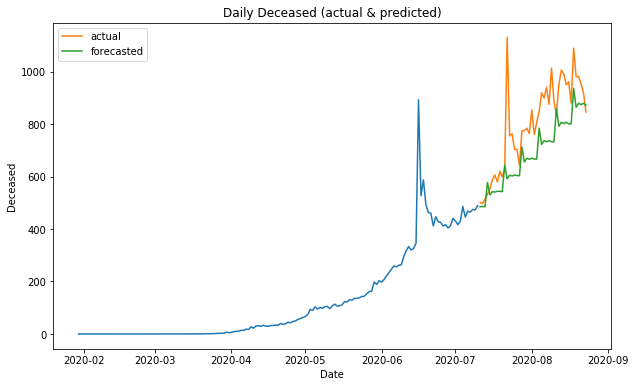

In [136]:
rcParams['figure.figsize'] = 10, 6
plt.plot(train_4)
plt.plot(test_4['Daily Deceased'],label ='actual')
plt.plot(test_4['forecast'],label ='forecasted')
plt.title('Daily Deceased (actual & predicted)')
plt.xlabel('Date')
plt.ylabel('Deceased')
plt.legend(loc='best')
plt.show()

In [137]:
residuals_4 = test_4['Daily Deceased'] - test_4['forecast']

In [138]:
test_4.isnull().sum()

Daily Deceased    0
forecast          0
dtype: int64

In [139]:
sqrt(mean_squared_error(test_4['Daily Deceased'],test_4['forecast']))

145.06702149569318

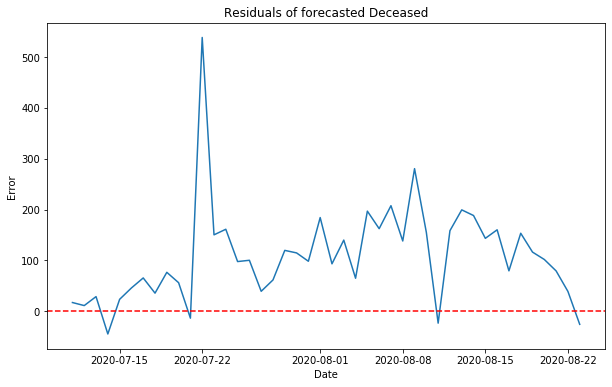

In [140]:
plt.plot(residuals_4)
plt.title('Residuals of forecasted Deceased')
plt.ylabel('Error')
plt.xlabel('Date')
plt.axhline(0, color='r', linestyle='--')

In [141]:
bestmodel_5 = sm.tsa.statespace.SARIMAX(df_dec,order=(0, 1, 1),seasonal_order=(0, 2, 2, 7))
results_5 = bestmodel_5.fit()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



In [142]:
results_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                
=========================================================================================
Dep. Variable:                    Daily Deceased   No. Observations:                  207
Model:             SARIMAX(0, 1, 1)x(0, 2, 2, 7)   Log Likelihood               -1094.865
Date:                           Mon, 24 Aug 2020   AIC                           2197.730
Time:                                   18:40:42   BIC                           2210.760
Sample:                               01-30-2020   HQIC                          2203.007
                                    - 08-23-2020                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.6236      0.066     -9.394      0.000      -0.754      -0.493
ma.S.L7       -1.9932      0.046    -43.229      0.000      -2.084      -1.903
ma.S.L14       0.9934      0.053     18.622      0.000       0.889       1.098
sigma2      3536.5422    2.8e-05   1.26e+08      0.000    3536.542    3536.542
===================================================================================
Ljung-Box (Q):                       65.07   Jarque-Bera (JB):             15899.24
Prob(Q):                              0.01   Prob(JB):                         0.00
Heteroskedasticity (H):            1921.30   Skew:                             5.33
Prob(H) (two-sided):                  0.00   Kurtosis:                        46.29
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 6.23e+23. Standard errors may be unstable.
"""

In [143]:
predict_5= results_5.get_prediction(start=int((df_dec.shape[0]) * 0.7), end=int((df_dec.shape[0]) * 1.1), alpha=0.1)

In [144]:
forecasted_results_5 = predict_5.conf_int(alpha=0.05)
forecasted_results_5['mean'] = predict_5.predicted_mean
forecasted_results_5.head()

lower Daily Deceased  upper Daily Deceased        mean
2020-06-22            375.492882            631.575749  503.534315
2020-06-23            458.136280            714.207307  586.171794
2020-06-24            341.638606            597.702846  469.670726
2020-06-25            346.180319            601.845439  474.012879
2020-06-26            320.398879            575.591832  447.995356

In [145]:
fr_5 =forecasted_results_5.iloc[50:,:]

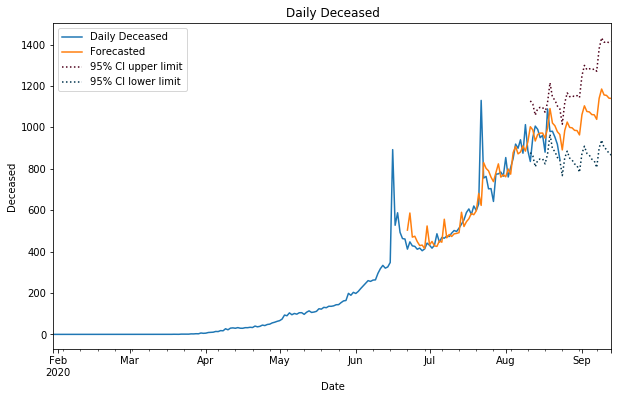

In [146]:
axis = df_dec.plot(label='Current Deceased', figsize=(10, 6))
forecasted_results_5['mean'].plot(ax=axis, label='Forecasted')
fr_5['upper Daily Deceased'].plot(ax=axis, label='95% CI upper limit',color=(0.3,0,0.1),linestyle='dotted')
fr_5['lower Daily Deceased'].plot(ax=axis, label='95% CI lower limit',color=(0.0,0.2,0.3),linestyle='dotted')
axis.set_xlabel('Date')
axis.set_ylabel('Deceased')
plt.title('Daily Deceased')
plt.legend(loc='best')
plt.show()

### Cumulative Deceased

In [367]:
df.tail()

Daily Confirmed  Total Confirmed  Daily Recovered  \
Date                                                            
2020-07-17            34820          1040462            17476   
2020-07-18            37411          1077873            23583   
2020-07-19            40235          1118108            22730   
2020-07-20            36806          1154914            24303   
2020-07-21            39172          1194086            27589   

            Total Recovered  Daily Deceased  Total Deceased  
Date                                                         
2020-07-17           654079             676           26287  
2020-07-18           677662             543           26830  
2020-07-19           700392             675           27505  
2020-07-20           724695             596           28101  
2020-07-21           752284             671           28772

In [147]:
fr_5.head()

lower Daily Deceased  upper Daily Deceased         mean
2020-08-11            878.018892           1127.748897  1002.883895
2020-08-12            862.802601           1112.529055   987.665828
2020-08-13            809.196553           1058.702905   933.949729
2020-08-14            841.060693           1090.307780   965.684236
2020-08-15            847.427754           1096.574269   972.001012

In [159]:
fr_5['cd'] = fr_5['mean']+45368

for i in range(1,fr_5.shape[0]):
    fr_5.iloc[i,3] = fr_5.iloc[i-1,3] + fr_5.iloc[i,2]

In [160]:
fr_5['up_cd'] = fr_5['upper Daily Deceased']+45368

for i in range(1,fr_3.shape[0]):
    fr_5.iloc[i,4] = fr_5.iloc[i-1,4] + fr_5.iloc[i,1]

In [161]:
fr_5['lw_cd'] = fr_5['lower Daily Deceased']+45368

for i in range(1,fr_5.shape[0]):
    fr_5.iloc[i,5] = fr_5.iloc[i-1,5] + fr_5.iloc[i,0]

In [162]:
fr_5.tail()

lower Daily Deceased  upper Daily Deceased         mean  \
2020-09-09            937.894599           1432.059740  1184.977170   
2020-09-10            902.171044           1410.508862  1156.339953   
2020-09-11            893.300910           1414.943181  1154.122045   
2020-09-12            873.426826           1408.042296  1140.734561   
2020-09-13            865.811621           1413.093542  1139.452581   

                      cd         up_cd         lw_cd  
2020-09-09  75842.037919  80625.200396  71058.875442  
2020-09-10  76998.377872  82035.709258  71961.046486  
2020-09-11  78152.499917  83450.652438  72854.347395  
2020-09-12  79293.234478  84858.694734  73727.774222  
2020-09-13  80432.687059  86271.788276  74593.585843

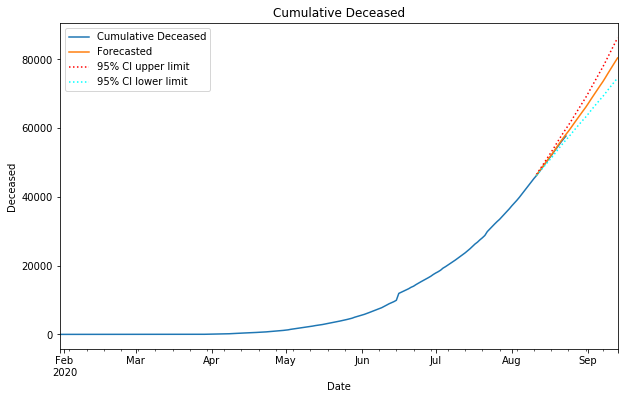

In [163]:
axis = df['Total Deceased'].plot(label='Cumulative Deceased', figsize=(10, 6))
fr_5['cd'].plot(ax=axis, label='Forecasted')
fr_5['up_cd'].plot(ax=axis, label='95% CI upper limit',color='red',linestyle='dotted')
fr_5['lw_cd'].plot(ax=axis, label='95% CI lower limit',color='cyan',linestyle='dotted')
axis.set_xlabel('Date')
axis.set_ylabel('Deceased')
plt.title('Cumulative Deceased')
plt.legend(loc='best')
plt.show()

In [164]:
fr.tail(10)

lower Daily Confirmed  upper Daily Confirmed          mean  \
2020-09-04           54264.787329           74400.830163  64332.808746   
2020-09-05           52647.832463           74431.512519  63539.672491   
2020-09-06           40551.116333           64012.552135  52281.834234   
2020-09-07           29608.668041           56559.889383  43084.278712   
2020-09-08           41451.056942           71236.447257  56343.752099   
2020-09-09           44939.894227           77097.209253  61018.551740   
2020-09-10           39360.187401           74233.115567  56796.651484   
2020-09-11           37676.995336           75351.326850  56514.161093   
2020-09-12           34889.587805           75250.640803  55070.114304   
2020-09-13           20314.986702           63407.974927  41861.480815   

                      cm         up_cm         lw_cm  
2020-09-04  3.864772e+06  3.968934e+06  3.760619e+06  
2020-09-05  3.928312e+06  4.043365e+06  3.813267e+06  
2020-09-06  3.980593e+06  4.107378e+06  3.853818e+06  
2020-09-07  4.023678e+06  4.163938e+06  3.883427e+06  
2020-09-08  4.080021e+06  4.235174e+06  3.924878e+06  
2020-09-09  4.141040e+06  4.312271e+06  3.969818e+06  
2020-09-10  4.197837e+06  4.386504e+06  4.009178e+06  
2020-09-11  4.254351e+06  4.461856e+06  4.046855e+06  
2020-09-12  4.309421e+06  4.537106e+06  4.081744e+06  
2020-09-13  4.351282e+06  4.600514e+06  4.102059e+06

In [165]:
fr_3.tail(10)

lower Daily Recovered  upper Daily Recovered          mean  \
2020-09-04           50317.235007           80576.070085  65446.652546   
2020-09-05           45104.165310           77388.427193  61246.296251   
2020-09-06           43193.065742           77467.896872  60330.481307   
2020-09-07           41922.656157           81073.846399  61498.251278   
2020-09-08           43398.253978           85505.153889  64451.703933   
2020-09-09           41606.814106           87235.815653  64421.314879   
2020-09-10           40947.377076           89593.165487  65270.271282   
2020-09-11           40854.074300           92573.138341  66713.606321   
2020-09-12           35021.929098           89634.549498  62328.239298   
2020-09-13           32810.208123           90276.985243  61543.596683   

                      cr         up_cr         lw_cr  
2020-09-04  3.091703e+06  3.257619e+06  2.925787e+06  
2020-09-05  3.152950e+06  3.335008e+06  2.970891e+06  
2020-09-06  3.213280e+06  3.412476e+06  3.014084e+06  
2020-09-07  3.274778e+06  3.493550e+06  3.056007e+06  
2020-09-08  3.339230e+06  3.579055e+06  3.099405e+06  
2020-09-09  3.403651e+06  3.666291e+06  3.141012e+06  
2020-09-10  3.468922e+06  3.755884e+06  3.181960e+06  
2020-09-11  3.535635e+06  3.848457e+06  3.222814e+06  
2020-09-12  3.597963e+06  3.938091e+06  3.257836e+06  
2020-09-13  3.659507e+06  4.028368e+06  3.290646e+06

In [166]:
fr_5.tail(10)

lower Daily Deceased  upper Daily Deceased         mean  \
2020-09-04            865.437945           1283.370276  1074.404110   
2020-09-05            846.171894           1277.112419  1061.642157   
2020-09-06            838.710477           1282.278580  1060.494528   
2020-09-07            805.948312           1271.015539  1038.481925   
2020-09-08            900.444418           1380.280948  1140.362683   
2020-09-09            937.894599           1432.059740  1184.977170   
2020-09-10            902.171044           1410.508862  1156.339953   
2020-09-11            893.300910           1414.943181  1154.122045   
2020-09-12            873.426826           1408.042296  1140.734561   
2020-09-13            865.811621           1413.093542  1139.452581   

                      cd         up_cd         lw_cd  
2020-09-04  70356.079456  73982.453170  66729.705742  
2020-09-05  71417.721613  75259.565589  67575.877636  
2020-09-06  72478.216141  76541.844169  68414.588113  
2020-09-07  73516.698066  77812.859708  69220.536425  
2020-09-08  74657.060749  79193.140655  70120.980843  
2020-09-09  75842.037919  80625.200396  71058.875442  
2020-09-10  76998.377872  82035.709258  71961.046486  
2020-09-11  78152.499917  83450.652438  72854.347395  
2020-09-12  79293.234478  84858.694734  73727.774222  
2020-09-13  80432.687059  86271.788276  74593.585843

### Situation by 13th September

In [167]:
active4 = fr.iloc[-1,3] -(fr_3.iloc[-1,3]+fr_5.iloc[-1,3])

In [168]:
pie_labels4=['Total Active','Total Recovered','Total Deceased']
values4=[active4,fr_3.iloc[-1,3],fr_5.iloc[-1,3]]

In [170]:
fig = px.pie(names=pie_labels4,values=values4,title='COIVD-19 Cases by end 13th September',color_discrete_sequence=["green", "blue", "red"],width=500,height=500)
fig.show()

In [171]:
pie_labels5=['Total Recovered','Total Deceased']
values5=[fr_3.iloc[-1,3],fr_5.iloc[-1,3]]

In [172]:
fig = px.pie(names=pie_labels5,values=values5,title='Cases with outcome by 13th September',width=500,height=500)
fig.show()